#  Reinforcement Learning part 1: the fundamentals

Reinforcement Learning is a general framework for building computational agents which can, if trained properly, act intelligently in a well-defined but dynamic environment.  Interesting applications of this paradigm include game AI (e.g., AlphaGo and self-playing Atari and Nintendo games), as well as various challenging problems in mechanical control and robotics.

In this notebook we introduce the fundamentals of Reinforcement Learning - including the nomenclature, modeling tools, and problem types.  The notebooks that follow will contain more advanced concepts including features, integrating function approximators and deep reinforcement learning, as well as further algorithms.

>The content of this notebook is supplementary material for Chapter 2 of the textbook Machine Learning Refined (Cambridge University Press, 2016). Visit http://www.mlrefined.com for free chapter downloads and tutorials, and [our Amazon site here](https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&qid=1474491657&sr=8-1&keywords=machine+learning+refined) for details regarding a hard copy of the text.

# 1.  Reinforcement Learning: introduction

Understanding the full blown modern use of Reinforcement Learning can be challenging due to the shear number of complex ideas involved. Further complicating matters, Reinforcement Learning almost always requires the use of advanced ideas from machine learning (e.g., features, mathematical optimization, deep neural networks) in order to use effeciently.  These factors make Reinforcement Learning a rather tough subject to learn for the first time. 

In this notebook we introduce Reinforcement Learning by pulling apart the entire process, and by introducing each concept as it is needed.  By focusing our attention on just one piece of the system at-a-time we can gain a fuller understanding of how each component works, and why it is needed.  Moreover we will also see that by doing this we also gain some extremely important - but suprisingly uncommon - intuition about how the individual components of Reinforcement define the strengths and limitations of the process in general.

The purpose of this Section is three-fold.  First we flush out some big-picture principles about how Reinforcement Learning (RL) works and the sort of problems it can be usefully applied too.  Afterwards we describe common applications of RL, from simple toys to sophisticated problems.  

## 1.1  Principles of Reinforcement Learning 

Given sufficient data is collected and care is taken in implementation, machine learning algorithms allow us automate an array of useful tasks.  Regression automates the sort of trend analysis and prediction making once done by hand and automatically generate insight about a vast range of scenarios like e.g., an individual's predisposition to certain genetic disease, or a commodity / stock price.  Classification gives us the power to automate tasks typically performed by human beings, enabling e.g., the automatic detection of credit card fraud, objects in digital images, and words based based on raw speech signals.   

Reinforcement Learning - if sufficient data is collected and care is taken in implementing RL algorithms - helps automate different sorts of tasks.  Reinforcement Learning is used to automate narrowly focused goal-driven tasks.  The challenge RL poses compared to traditional supervised learning is summarized nicely in this quote from [[0]](#bib_cell).

“Reinforcement learning is a difficult problem because the learning system may perform an action and not be told whether that action was good or bad. For example, a learning auto-pilot program might be given control of a simulator and told not to crash. It will have to make many decisions each second and then, after acting on thousands of decisions, the aircraft might crash. What should the system learn from this experience? Which of its many actions were responsible for the crash? Assigning blame to individual actions is the problem that makes reinforcement learning difficult.”

>**Principle 1: Reinforcement Learning automates narrowly focused goal-driven tasks.**  

### Narrowly-focused $\neq$ simple

Note, many "narrowly focused goal-driven tasks" have very complicated solutions.  

For example, the autopilot mode on an airplane is the product of a narrowly focused goal: keep the plane flying safely torwards a pre-defined destination.  Trying to code up a list of if-then rules 'by hand' to solve this problem would be extremely complicated.  First off standard planes have a huge array of sensors taking in information about a plane's velocity, altitude, ambient air pressure, stress on various parts of the vehicle, distance various objects, etc.,  Additionally there are a myrad of enviromental factors to deal with - wind velocity and currents, air density, etc., - that can vary wildly from flight to flight.  Complicating matters, it is not the individual second-to-second problem of steering the plane correctly that we need to get absolutely right - its the entire sequence of actions taken together that we want to lead successfully to accomplishing the goal.  So making small mistakes along the way is acceptable if they nonetheless lead to achieving the goal.  

How could you possibly compile enough if-then conditions to conquer such a narrowly defined goal-driven task?

### The Reinforcement Approach

The Reinforcement approach ditches the notion of producing a long list of hand-made conditionals to solve such a problem, and instead trains a computational agent to accomplish the desired goal.  Because of this the first crucial component to the RL approach is the ability to experiment in the space of a given problem. Tbis most commonly takes the form of a reaslistic simulation of the problem enviroment.

> **Principle 2:  Experimentation in the space of a problem - commonly a realistic simulation of a problem's enviroment -  is crucial to training a Reinforcement Learning agent.**

How does an agent learn as it interacts with a problem enviroment or simulator?  The same way humans do when we are thrown into a new enviroment - i.e., one in which we have no theory or principles to stand on - by repeated trial and error interactions.  

>**Principle 3: A Reinforcement Learning agent learns by repeated trial-and-error interactions with a problem enviroment or simulator.**

For example in the case of an autopilot, we would train an RL agent by giving it control of an airplane in a simulated enviroment.  We would then run many simulations of the airplane traveling in various conditions, in each simulation giving the agent full control over steering the airplane.  At first the agent makes random steering actions - likely crashing the plane and ending the simulation.  After many rounds of this type the agent slowly starts learning how to steer correctly to achieve the goal of reaching a pre-defined destination point.

How do we communicate the desired goal to the agent, so it can learn through many simulations the correct sorts of actions to take?  These goals - like the one for our autopilot "reach destination safely" - are abstract.  In the RL framework we translate the 'narrowly-defined goal'  into a series of numerical values called *rewards*.  

>**Principle 4: Numerical rewards are used to communicate the desired goal to the Reinforcement Learning agent.**

These reward values provide feedback to the agent at each step of a simulation run.  Essentially they tell the agent how well it is accomplishing the desired goal, helping the agent eventually learn the correct sequence of actions necessary to achieve it.

##  1.2  Applications of Reinforcement Learning

Where do we find problems that are narrowly-defined goal-driven tasks?  In this Section we discuss examples from three main application areas in which RL is commonly used: robotics, automatic control, and game AI.
We will return to these examples repeatedly as we develop Reinforcement concepts.

### Example: Shortest-path planning for robotics

Grid world is a simplified version of what is called the shortest path problem - a problem often solved in in robot path planning, as well as video games, and mapping services.  For many robots (like e.g., a cleaning bot) path planning is essential for effecient operation.  In a video game the AI uses path planning to find you in a level.  With a digital mapping service, path planning is used to effeciently route you from point A to point B [[1]](#bib_cell).     

We will look at a toy version of this problem throughout the notebook - called *gridworld*.  We illustrate a simple example of gridworld - a small maze - in the next Python cells.  Each square tile is a location in the world.  Here the blue square denotes the robot's location and the green square the desired destination. The actions available to our agent / robot are to move one unit left, right, up, or down and it can move to any free square (here colored grey).  The agent can pass through the orange hazard squares, but is heavily penalized for doing so - these hazard squares simulate e.g., a slippery or obstructed part of the floor.

The goal here is to learn the shortest path to the goal square - beginning at any valid square in the world (even the hazards).  Here we show the agent starting at a specific position far way from its goal.

<img src="demo_images/RL_images/maze.gif",width=300,height=300>

Gridworlds come in many shapes and sizes - for example here's one where we have arranged the hazards to form a narrow passage of non-hazard squares separating one half of the world from another.  If the starts on the wrong side of the world - as shown below - then it must cross a narrow bridge of non-hazard squares to reach the goal effeciently.

<img src="demo_images/RL_images/moat.gif",width=280,height=280>

Another example!  A gridworld with randomly placed hazards!  In the starting position shown below the agent must navigate a random hazard-free path to reach the goal effectively.

<img src="demo_images/RL_images/random.gif",width=280,height=280>

###  Example 2:  Game playing agents

Another common application of RL to train game AI agents to win matches / levels / etc.  In the game of chess this means training an RL agent to consistently check-mate its opponent [[2]](#bib_cell).

<img src="demo_images/RL_images/chess.png",width=250,height=250>

RL can also be used to train an agent to win (simple) video games - like those from the Atari 2600 collection [[3]](#bib_cell).  In Pacman for example - RL can be used to train an agent to beat individual levels of the game [[4]](#bib_cell).

<img src="demo_images/RL_images/looping_pacman.gif",width=400,height=400>

### Example 3:   Control problems

Control problems - like the autopilot example given in the Section above - involve teaching an agent how to control a particular mechanical / electrical system.

For example a classic toy control problem - a simplified version of the autopilot problem - is to teach an agent how to balance a pole on a moving cart.  The pole is free to rotate about an axis on the cart, with the cart on a track so that it may be moved left and right - affecting the location of the pole.  The pole feels the force of Earth's gravity, and so if unbalanced will fall to the ground [[6]](#bib_cell)

<img src="demo_images/RL_images/cartpole.gif",width=400,height=400>

Another toy control problem is the so-called 'lunar lander'.  Here we simulate a real lunar lander and train an RL agent to correctly land a space craft in a pre-defined landing zone [[6]](#bib_cell).

<img src="demo_images/RL_images/lunar_lander.gif",width=400,height=400>

# 2.  The fundamental components of an RL problem

Now that we have discussed some principles and common applications of Reinforcement Learning, we can dive deeper and introduce necessary  conceptual jargon for discussing the formal RL framework.  In this section we introduce the components of Reinforcement and see how they fit together.  This will set us up nicely to begin formal modeling discussions in the Section following this one.

## 2.1  The basic components of Reinforcement

Here we define the modeling components of a standard Reinforcement Learning problem.  For illustrative purposes we use the example applications described earlier to provide specific instances of each component.  

> **The three basic components of the Reinforcement Learning paradigm are states, actions and rewards.**

These components are - at a high level:

1\.    A **state** is a specific configuration of all objects in a problem's environment.  A **state space** is the collection of all possible states this environment is capable of producing.  The state space is defined by the problem we aim to solve.

- In *grid world* any state consists of one piece of information: the current location of the player (the blue square).  The state space is all possible locations on the board where the player can go.


- In the chess problem a state is any (legal) configuration of the white and black pieces on the board (and some pieces may be missing).  The state space is the set of all possible configurations of chess pieces on the board. 


- In the cart-pole problem a state is a complete set of information about the cart and pole's position.  This includes: the cart position, the cart velocity, the angle of the pole measured as its deviation from the vertical position, and the angular velocity of the pole.  While these are technically continuous values, in practice they are finely discretized.  The state does **not** include technical / physical information about the environment e.g., the fact that gravity exists, its precise force, etc.


2\.  The agent can then take an **action** - the set of actions is either determined by us or by the problem environment.  The **action space** is the total set of such available actions.  


- For grid world, a toy problem, we can choose a set of actions.  For example we could decide that the agent can only move the blue square adjacently one unit up, down, left or right.  Alternatively, we could allow the agent to move the blue square diagonally as well.


- In the chess problem an action is a legal move of any of its current pieces on the board.


- In the cart pole problem - as in robotics applications as well - the range of actions is completely defined by the available range of motions of the machine being directly controlled.  In cart pole the agent directly controls the cart, which can only move left or right along the horizontal axis.


3\.  Once an action is taken the agent receives a **reward** - or a signal that the agent has performed a good or bad action based on our desired goal.  We (humans) decide on the reward structure (in order to induce our agent to accomplish our desired goal).  We want a reward for a given action to be **larger** for those actions that get us closer to accomplishing our goal (and less for those actions which do not).  To reiterate: this is the (only) way we communicate our desired goal to the agent.

- For grid world we can assign a negative value like -1 to all actions (one unit movement) which leads to a non-goal and non-hazard state, a larger negative number like -100 for those actions leading to a hazard state, and a nonnegative positive number like 0 to actions leading to the **goal state** itself.   These exact numbers are arbitrary, so long as a negative reward is given to actions not directly leading to the goal and hazards are more severly penalized.
 
 
- For the chess problem one reward structure to induce our agent to learn how to win could be as follows: any move made that does not lead to the **goal state** (checkmating the opponent) receives -1 reward, a move that successfully check mates the opponent receives a reward of 10000.


- For the cart-pole problem one common choice of reward structure - at every state at which the angle between the pole and the horizontal axis is above a certain threshold the reward is 1, otherwise it is 0.


These three components connect together to create a feedback system that - when properly engineered - allow us to train an RL agent to accomplish a desired goal via maximization of the surrogate rewards.  In order to derive the RL algorithms that allow for this we need to first represent each of the components algebraically.

##  2.2  Notation for each of the basic RL components

For now suppose for a given problem that there are only $N$ possible states and $M$ available actions.  

- In the grid world problem the number of states is finite and equal to the number of places the player can travel. In the example discussed above there are only four actions available: move the player one unit up, down, left, or right. 


- In the chess problem the number of states is equal to the total number of possible configurations of the board, while the number of actions is equal to the number of legal moves available to the pieces on the board.


- In the cart pole problem the number of states is equal to the number of configurations of the 4 discretized environmental descriptors, and there are only three actions: move the cart left, right, or keep it still.


For a given problem we will denote the state- and action-spaces as follows

- Denote by $S=\left\{ \sigma_{1},\sigma_{2},...,\sigma_{N}\right\}$ the set of all states


- Denote by $A=\left\{ \alpha_{1},\alpha_{2},...,\alpha_{M}\right\}$ the set of all actions


Notice that if we ourselves were to solve any of the examples given so far we would do so sequentially, in discrete steps.  This is precisely how the agent solves these problems as well.  

- In grid world we / the agent move the player one square at a time.  Beginning at a state (location) an action is taken to move the player to a new state.  For taking this action and moving to the new state the agent receives a reward.

- In chess we / the agent moves one piece at a time.  Beginning at a state (a specific configuration of the board) an action is taken and a piece on the board is moved, a new state of the system.  For taking this action and moving to the new state the agent receives a reward. 

- In cart pole we / the agent keep the cart still or move it with a fixed force left or right.  Beginning at a state (a specific configuration of the 4 system descriptors) an action is taken and the cart is moved, a new state of the system arises.  For taking this action and moving to the new state the agent receives a reward. 


Some notation to describe what occurs at the $k^{th}$ step in solving a problem: at this step an agent begins at a state $s_{k-1} \in S$, takes an action $a_k \in A$ that moves the system to a state $s_k \in S$.

A note about this notation: be careful not to confuse the $s$'s with the $\sigma$'s, and the $a$'s with the $\alpha$'s.  The notation $s_{k-1}$ is a *variable* denoting the state at which the $k^{th}$ step of the procedure begins, and so can be any of the possible realized states in $S=\left\{ \sigma_{1},\sigma_{2},...,\sigma_{N}\right\}$.  Likewise the notation $a_k$ is a variable denoting the action taken at the $k^{th}$ step, which can be any of the possible actions from $A=\left\{ \alpha_{1},\alpha_{2},...,\alpha_{M}\right\}$.

Notice too a key part of each of these descriptions when it comes to an agent solving a given problem: the mechanism by which an agent learns the best action to take in a given state is the reward it receives.  This reward is positive or negative based on how each action helps or hinders its accomplishment of the goal.

We need notation for the reward an agent receives at the $k^{th}$ step as well: call this $r_k$.  This is a function of the initial state at this step the action taken - i.e., $r_k = r_k(s_{k-1},a_k)$  

### A brief note about stochastic problems

Not all problems are 'deterministic' in nature, such as those considered here, where one realized action $a_k$ at a given state $s_{k-1}$ always leads to the same next state $s_k$.  In *stochastic* problems a given action at a state may lead to different conclusions.  For example robotics RL-based problems are often stochastic in nature - e.g., a robot may perform a given action - like accelerate forward one unit of thrust - at the a state and reach different outcomes due to things like inconsistencies in the application of this action, sensor issues, or friction.

Almost the same modeling we used above captures this variability for such stochastic problems, with the main difference being that the reward function must also necessarily be a function of the state $s_k$ in addition to $a_k$ and $s_{k-1}$.  We will deal this generality in a future notebook once we flush out all the details of the deterministic scenario.

## 2.3  Fitting the components together

So in solving a problem an agent goes through a sequence of events at each step.  These are: start at a state, take an action, move to a new state, and receive a corresponding reward.  The first three steps look like

**step 1:**<br>
start at an initial state (denoted by $s_0$)<br>
take an action (denoted by $a_1$)<br>
this takes you to a new state (denoted by $s_1$) and you receive your first reward $r_1$<br>

**step 2:**<br>
start at state $s_1$<br>
take an action (denoted by $a_2$)<br>
this takes you to a new state (denoted by $s_2$) and you receive your second reward $r_2$<br>

**step 3:**<br>
start at state $s_2$<br>
take an action (denoted by $a_3$)<br>
this takes you to a new state (denoted by $s_3$) and you receive your third reward $r_3$<br>

**step 4:**<br>
...<br>

or in short the first three steps look like

($s_0$, $a_1$, $r_1$), ($s_1$, $a_2$, $r_2$), ($s_2$, $a_3$, $r_3$), ($s_3$,...

Taken together a sequence of such steps - ending either when a goal state is reached (as in the grid world or chess examples) or after a maximum number of iterations is completed (as in the cart pole example) - is referred to in RL jargon as an **episode**.  

What do we want the perfect episode of steps to look like when performed by a trained agent?  We want the agent to choose actions in order to maximize its long term reward - that is the sum of rewards over all the steps in the episode.

## 2.4  The fundamental and recursive RL cost function

How do we do this - train the agent to take the proper actions at each state to maximize its total reward?  First - as with all machine learning problems - we need to form a cost function.  However unlike other machine learning problems like e.g., linear or logistic regression, we cannot directly work out an exact parameterized form of the cost function here.  Instead what we can do is formalize a certain atribute we *want* this function to ideally have and - working backwards - we can arrive at a method for computing it.

------
Let's take an arbitrary episode of steps beginning at state $s_0$ where we take action $a_1$

($s_0$, $a_1$, $r_1$), ($s_1$, $a_2$, $r_2$), ($s_2$, $a_3$, $r_3$), ($s_3$,...

After $a_1$ is taken we want to determine the best sequence of remaining actions so that the sum of the rewards for these actions is as large as possible.

So denote by $Q(s_0,a_1)$ the *maximum total reward possible* if we begin at a state $s_0$, take the action $a_1$ bringing us to some state $s_1$, and then continue taking steps until goal is reached or a maximum number of steps is taken.  By definition this quantity is the sum of the realized reward $r_1$ (we receive for taking action $a_1$ at state $s_0$) plus the largest possible rewards from all the proceeding steps.  

The only thing that is not 'maximal' about this $Q$ function is the first reward $r_1$ - since there could be another action that provides a larger first one.  So then the maximum possible value of $Q$ at the state $s_0$ is achieved when we choose this best action at state $s_0$ 

$\underset{i=1...M}{\text{maximum}}\,\,Q\left(s_{0},\,\alpha_{i}\right)$

With the above the $Q$ function can be defined *recursively* in terms of itself.  This is because as stated the quantity $Q(s_0,a_1)$ must be the sum of $r_1$ - the reward for taking the action $a_1$ at $s_0$ - plus the *maximum possible sum of rewards for all subsequent steps* $\underset{i=1...M}{\text{maximum}}\,\,Q\left(s_{1},\,\alpha_{i}\right)$.

Writing this out algebraically we have

$Q\left(s_{0},\,a_{1}\right)=r_{1}+\underset{i=1...M}{\text{maximum}}\,\,Q\left(s_{1},\,\alpha_{i}\right)$

And in fact this definition holds regardless of what state and action we begin with.  That is, at the ${k-1}^{th}$ step, by definition we begin at the state $s_{k-1}$ and take an action (denoted by $a_k$), resulting in the ${k}^{th}$ reward $r_k$, and the following relationship

$Q\left(s_{k-1},\,a_{k}\right)=r_{k}+\underset{i=1...M}{\text{maximum}}\,\,Q\left(s_{k},\,\alpha_{i}\right)$

This recursive definition of the $Q$ cost function is typically referred to as **Bellman's equation**.

# 3.  Q-Learning

So far we have described the fundamental RL problem, defined its various components and introduced notation for each, discussed how these components interact in each step of a problem solving process, and motivated / formulated the agent's need to maximize its total rewards.  We have all the pieces we need in order to discuss the basic RL algorithm - Q learning. 

In this Section we introduce the basic Q learning algorithm, as well as an important adjustment that makes it far more effecient.  We use a variety of grid world setups to help illustrate the algorithms presented.  While the power of Q learning is illuminated through this range of examples, they also allow us to illuminate a fundamental limitation of the RL framework in general. 

## 3.1  Whats the use of a recursive definition of $Q$ if we don't know what $Q$ is to begin with?

At first glance the recursive definition above seems to aid little in helping us determine the optimal $Q$ function - if we don't know $Q$ to begin with, and $Q$ is on both sides of the recursive definition above, how does this help?

The answer: by running a large number of episodes and updating $Q$ via the recursive definition as we go along.  Akin to supervised / unsupervised learning, this constitutes the training phase of RL.

By running through an episode of simulation 

($s_0$, $a_1$, $r_1$), ($s_1$, $a_2$, $r_2$), ($s_2$, $a_3$, $r_3$), ($s_3$,...

we *generate data* that can be used to resolve the optimal $Q$ function step-by-step via the recursive definition.  We initialize $Q$ to some value (like all zeros) and then update it sequentially 

$Q\left(s_{0},\,a_{1}\right)=r_{1}+\underset{i=1...M}{\text{maximum}}\,\,Q\left(s_{1},\,\alpha_{i}\right)$

$Q\left(s_{1},\,a_{2}\right)=r_{2}+\underset{i=1...M}{\text{maximum}}\,\,Q\left(s_{2},\,\alpha_{i}\right)$

$Q\left(s_{2},\,a_{3}\right)=r_{3}+\underset{i=1...M}{\text{maximum}}\,\,Q\left(s_{3},\,\alpha_{i}\right)$

$\vdots$

$Q\left(s_{k-1},\,a_{k}\right)=r_{k}+\underset{i=1...M}{\text{maximum}}\,\,Q\left(s_{k},\,\alpha_{i}\right)$

$\vdots$


until a goal state is reached and we end the episode.  Then we begin a new episode start updating $Q$ again.

Performing enough *training episodes*  - and subsequent updates to $Q$ - our $Q$ function eventually becomes optimal since by construction it will satisfy the desired recursive definition for all state/action pairs.  You can see that in order for $Q$ to be optimal for all state/action pairs we will need to visit every such pair at least once.  In practice one must typically cycle through each pair multiple times in order for $Q$ to be trained appropriately (or - as we will see later - employ function approximators to generalize from a small subset of state/action pairs to the entire space) [[5]](#bib_cell).

>By running through a large number of episodes - and so through as many state/action pairs as many times as possible and updating $Q$ at each step using the recursive definition, **we learn $Q$ by trial-and-error interactions with the environment.**  How well our computations converge to the true $Q$ function depend on how well we sample the state / action spaces through our trial-and-error interactions.


## 3.2  The basic Q-Learning algorithm

In the most basic approach we run each episode by taking a random initial state, a **random** action, and repeat taking steps until a goal state is reached or maximum number of steps is taken.  At the $k^{th}$ step we are at a state $s_{k-1}$ and take a **random** action $a_k$ and update $Q(s_{k-1},a_k)$ using the recursive formula.


---------
### Q -learning pseudo-code
Initialize $Q$, choose value for $\gamma \in [0,1]$

**for** e = 1...E (the maximum number of episodes)
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Select a random initial state $s_0$ and set $k=1$
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **while** end state not reached AND maximum iteration count not met

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;select the action $a_k$ at random and record the resulting state $s_k$ and corresponding reward $r_k$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;update $Q$ as 
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Q\left(s_{k-1},\,a_{k}\right)=r_{k}+\gamma\cdot\underset{i=1...M}{\text{maximum}}\,\,Q\left(s_{k},\,\alpha_{i}\right)$
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \longleftarrow k+1$

-----

This algorithm is a basic version of what is called **Q-Learning**.

### Example:  Applying Q-learning to the gridworld maze

Lets use Q-Learning to train an agent for the small maze gridworld we first saw in the previous section.

In [1]:
# import gridworld library - make sure this is executed prior to running any gridworld cell
import sys
sys.path.append('demo_python_backend_files')
%matplotlib inline

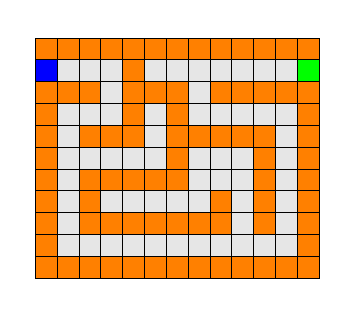

In [2]:
# import custom gridworld simulator 
from gridworld_lib import gridworld_enviro

# generate instance of gridworld
small_maze = gridworld_enviro.environment(world_size = 'small', world_type = 'maze')

# show the grid
small_maze.color_gridworld()

Our goal is to train the agent (here shown in blue) to effeciently reach the goal square (shown in green) starting from *any* square on the grid.  The agent can only move up, down, left, and right one square at a time.

For this example we preset reward values for the agent at each location on the grid as 

$r_{k}=\begin{cases}
-1 & \text{if on standard square}\\
-200 & \text{if on hazard square}\\
0 & \text{if at goal}
\end{cases}$

and gamma = 0.8.  You can see these values by exposing the following functionality in the Python cells below.

In [4]:
# show preset rewards and gamma value
print 'the standard square reward is preset to ' + str(small_maze.standard_reward)
print 'the hazard reward is preset to ' + str(small_maze.hazard_reward)
print 'the goal reward is preset to ' + str(small_maze.goal_reward)
print 'the gamma value is preset too ' + str(small_maze.gamma)

the standard square reward is preset to -1
the hazard reward is preset to -200
the goal reward is preset to 0
the gamma value is preset too 0.8


In the next Python cell we train an agent for this gridworld via the basic Q-Learning algorithm.

In [3]:
# import q-learning module
from gridworld_lib import gridworld_qlearn

# create an instance of the q-learner
qlearner = gridworld_qlearn.learner(gridworld = small_maze,action_method = 'random')

# run q-learning
qlearner.train(verbose = True)

training episode 50 of 500 complete
training episode 100 of 500 complete
training episode 150 of 500 complete
training episode 200 of 500 complete
training episode 250 of 500 complete
training episode 300 of 500 complete
training episode 350 of 500 complete
training episode 400 of 500 complete
training episode 450 of 500 complete
training episode 500 of 500 complete
q-learning algorithm complete


To examine this Q-Learning function enter

**qlearner.train??**

into a Python cell and activate.  This function contains a few containers and switches used to capture output and control variables, but the heart of the function mirrors the pseudo-code given above.  In the next cell we show the stripped down code at the heart of the function (note this will not run, access the entire function to see

In [ ]:
### start main Q-learning loop ###
for n in range(self.training_episodes): 
    # pick this episode's starting position
    grid.agent = self.training_start_schedule[n]

    # update Q matrix while loc != goal
    episode_history = []      # container for storing this episode's journey
    total_episode_reward = 0
    for step in range(self.max_steps):   
        # update episode history container
        episode_history.append(grid.agent)

        ### if you reach the goal end current episode immediately
        if grid.agent == grid.goal:
            break

        # translate current agent location tuple into index
        s_k_1 = grid.state_tuple_to_index(grid.agent)

        # get action
        a_k = grid.get_action(method = self.action_method,Q = Q,exploit_param = self.exploit_param)

        # move based on this action
        s_k = grid.get_movin(action = a_k)

        # get reward     
        r_k = grid.get_reward(state_index = s_k)          

        # update Q
        Q[s_k_1,a_k] = r_k + gamma*max(Q[s_k,:])

        # update current location of agent 
        grid.agent = grid.state_index_to_tuple(state_index = s_k)

What does each episode of training look like, where each action is taken randomly to update the Q function?  In the next Python cell we animate 3 of the training episodes - as you can see in each case the agent randomly moves around the world!

Note for sake of animation-rendering speed only the first 50 steps are shown in each episode, so they may not conclude (i.e., reach the goal).


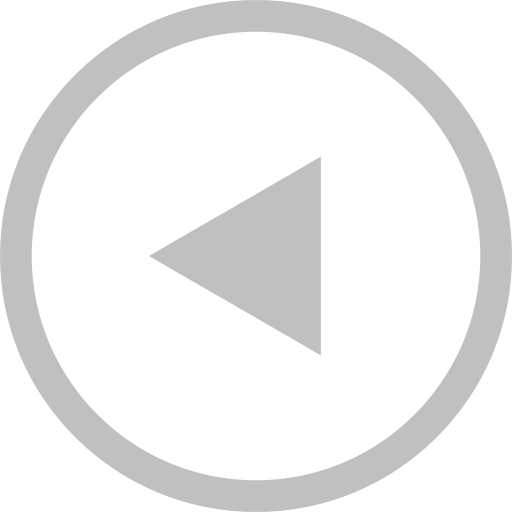
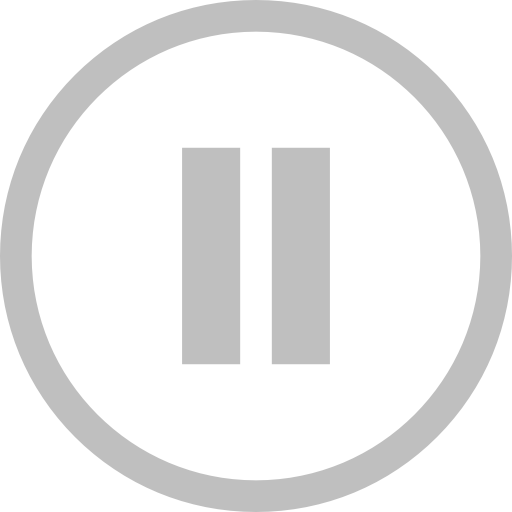
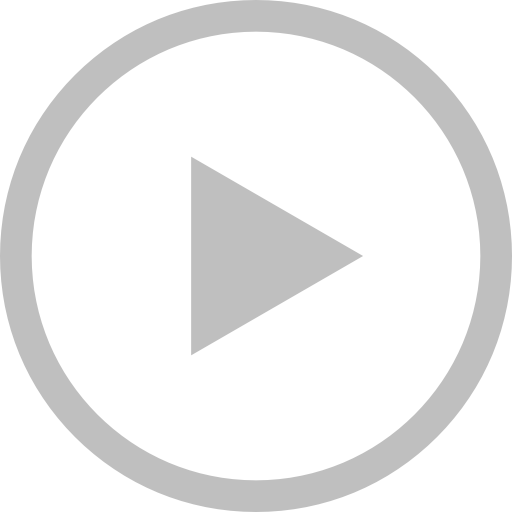
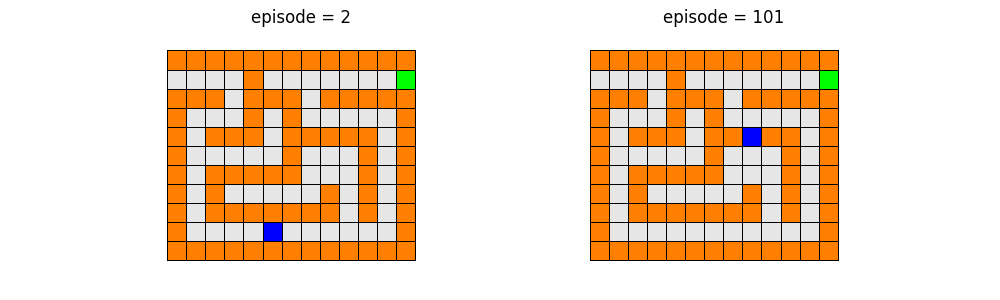
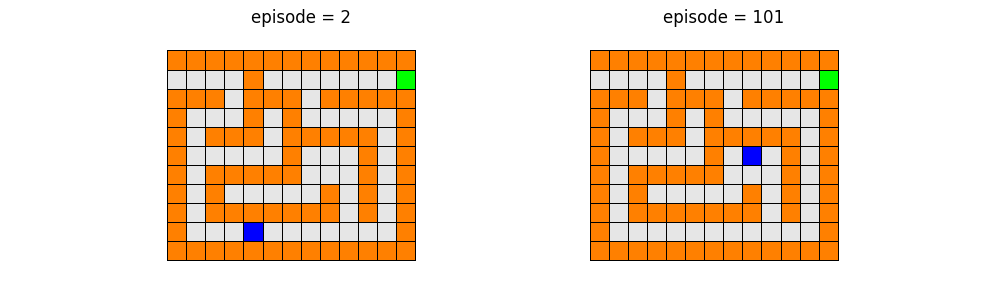
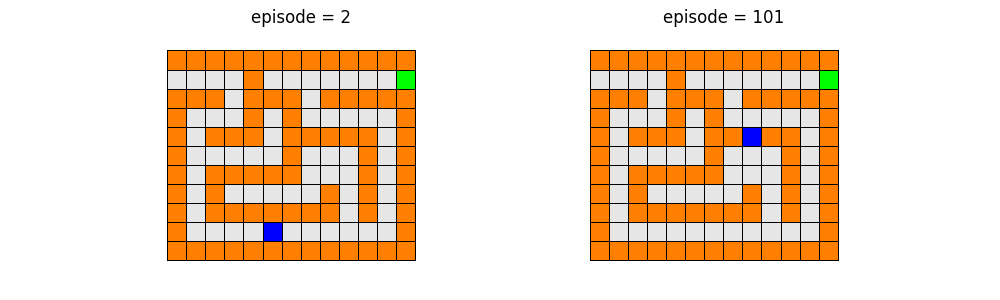
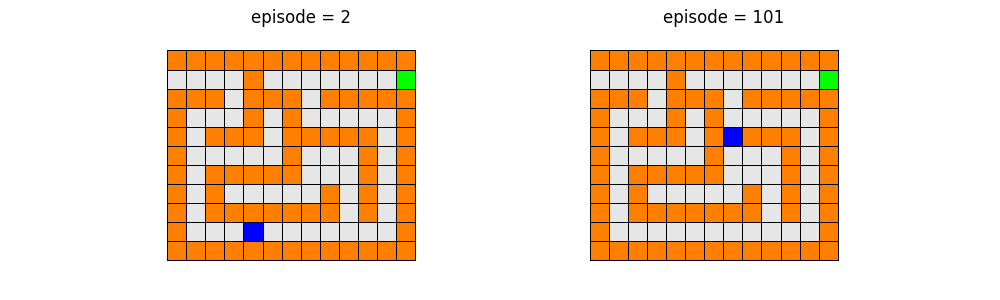
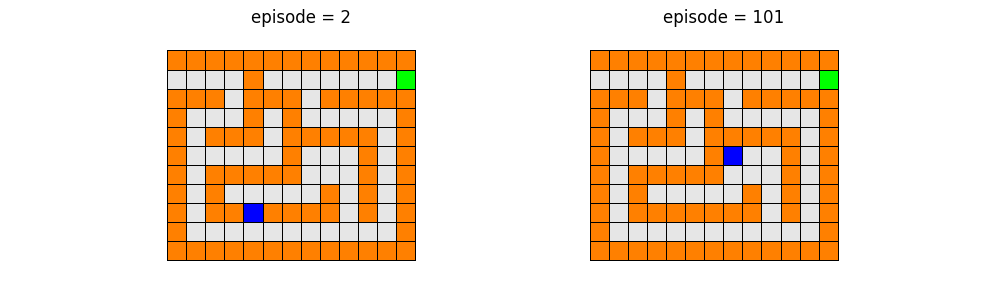
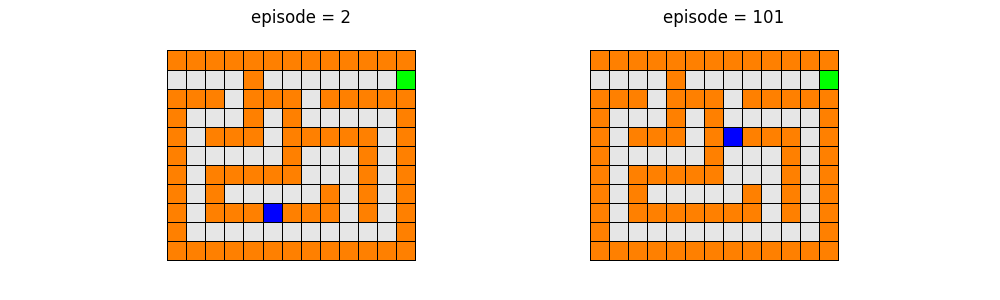
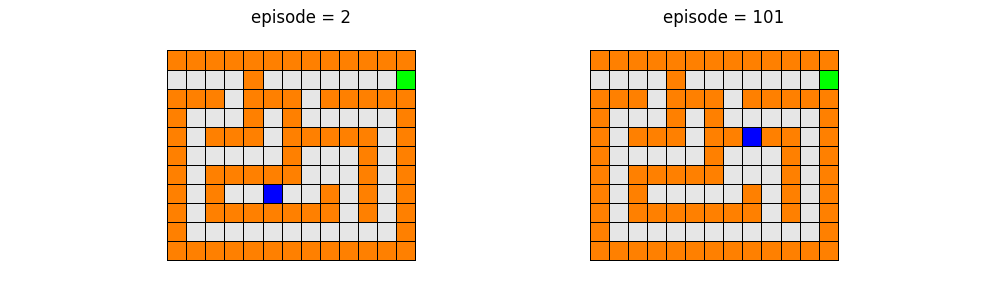
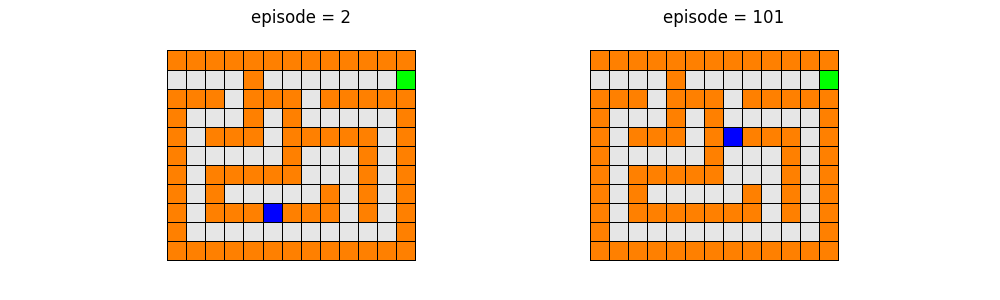
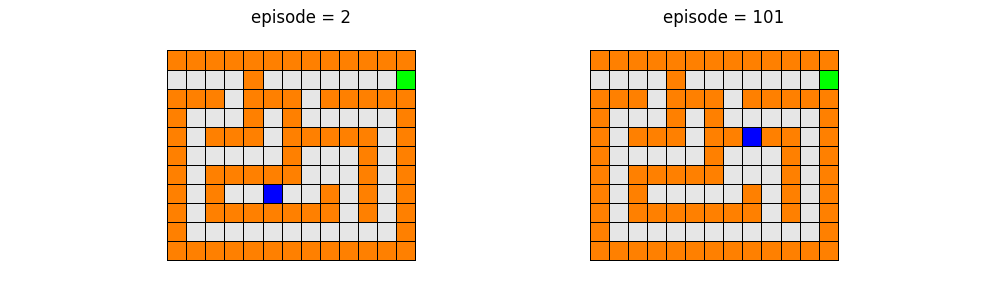
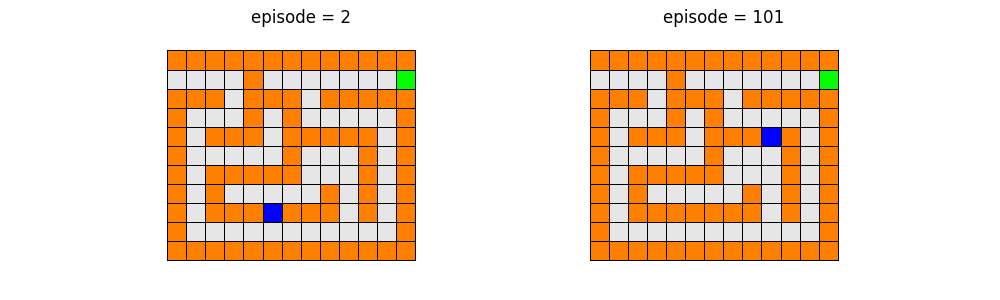
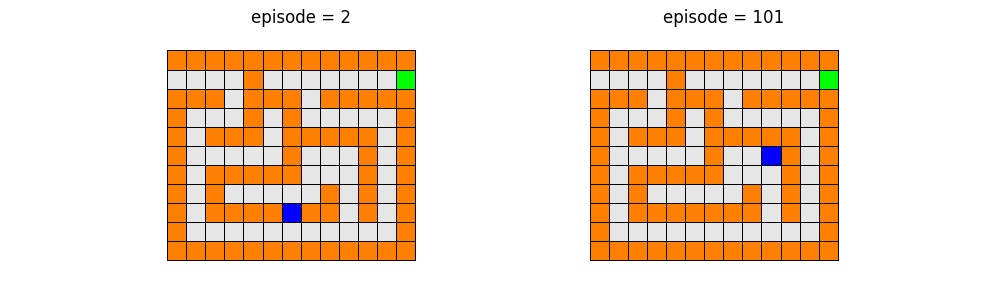
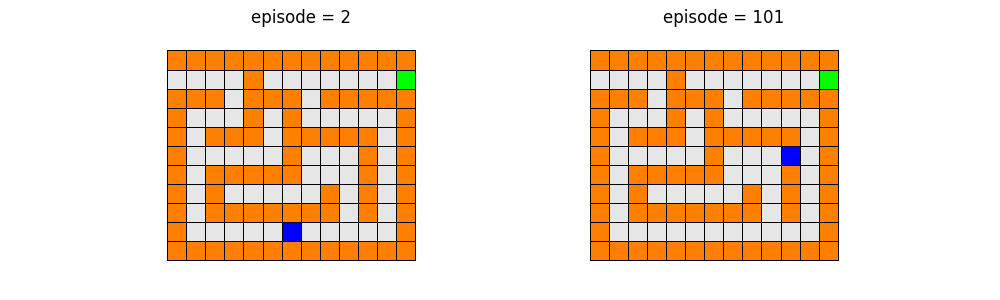
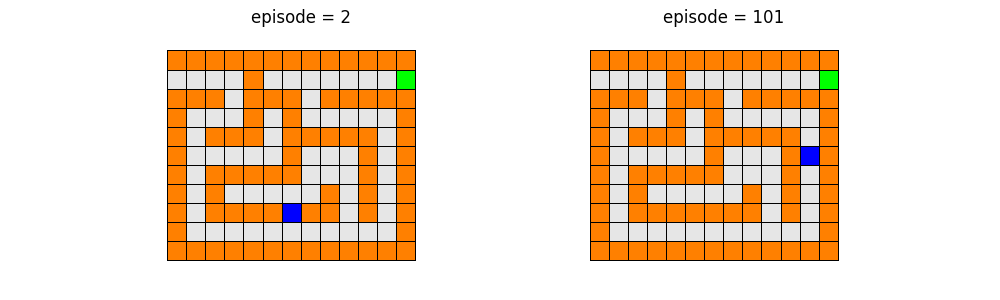
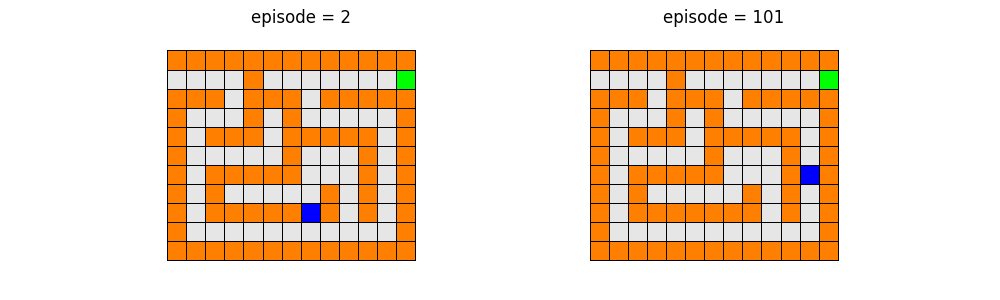
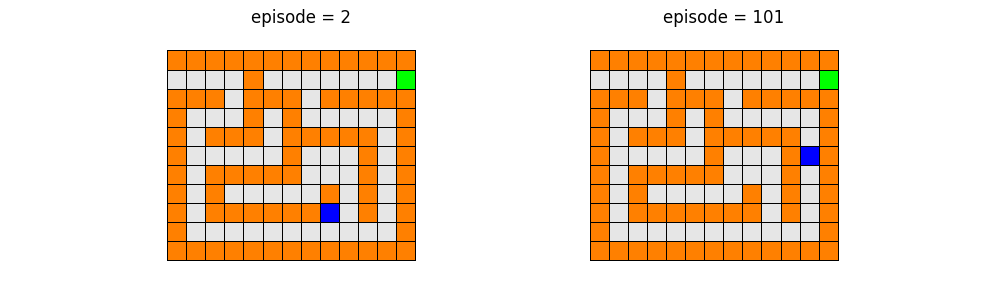
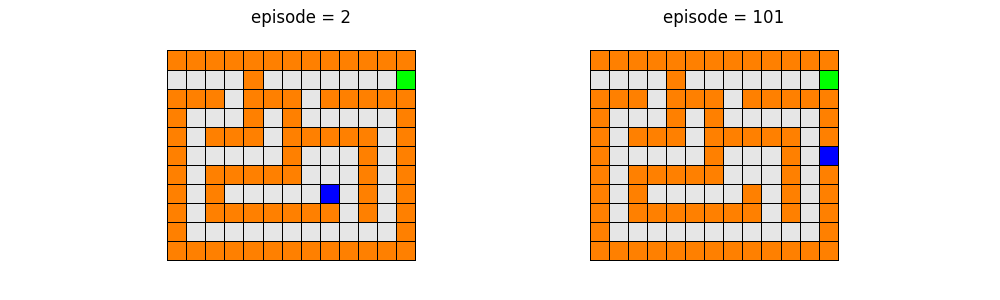
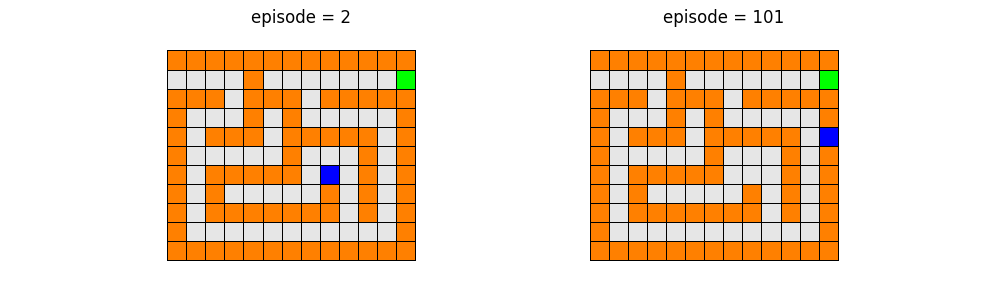
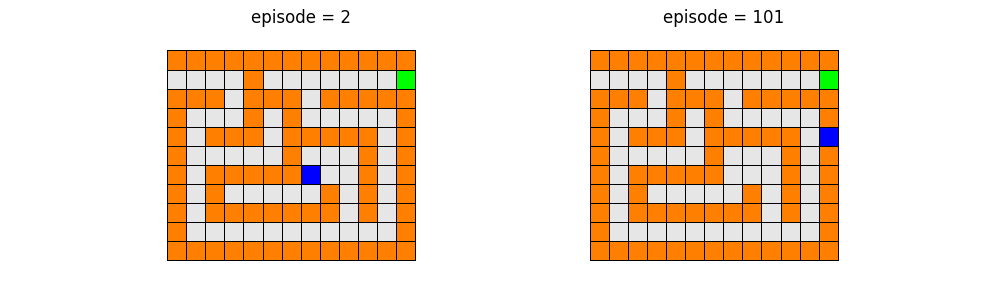
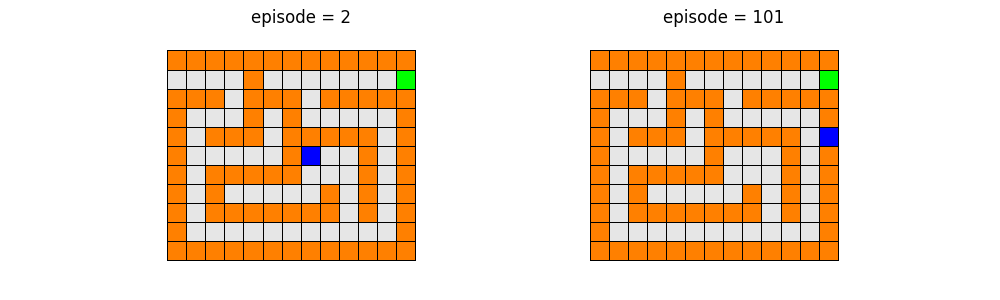
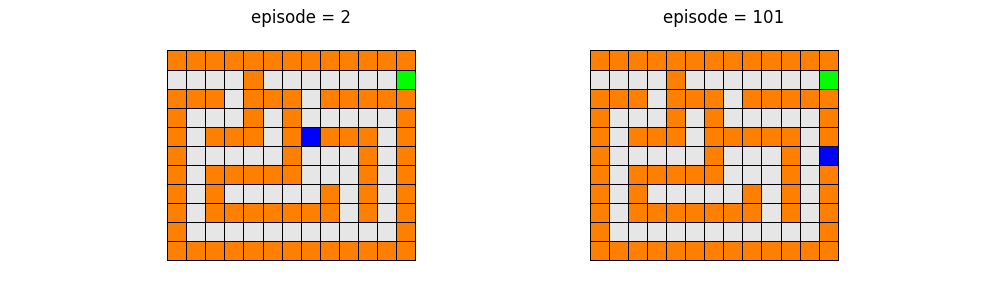
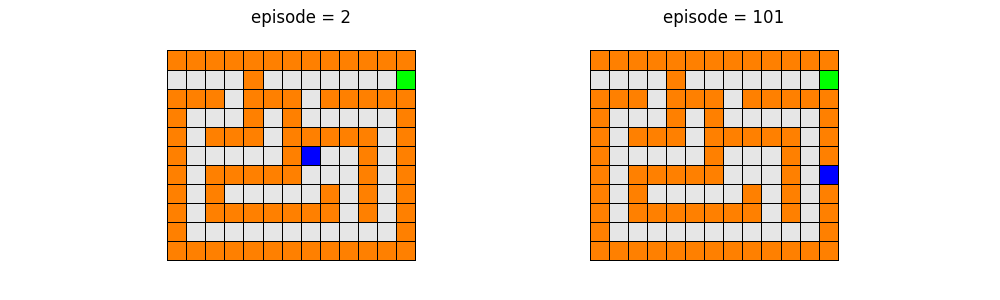
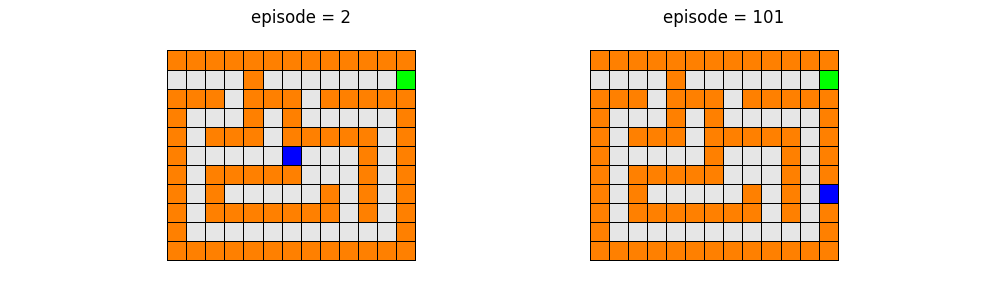
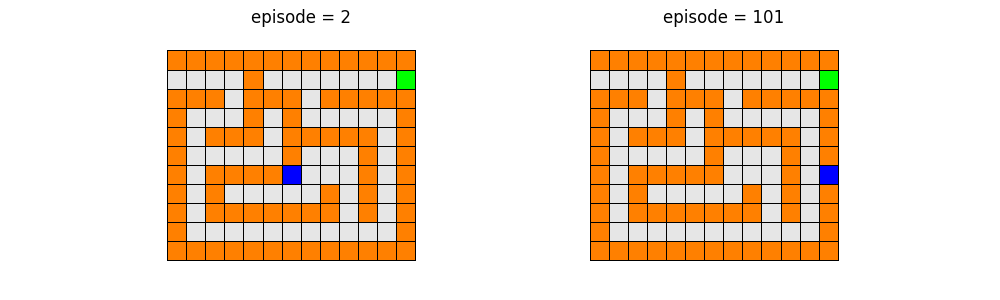
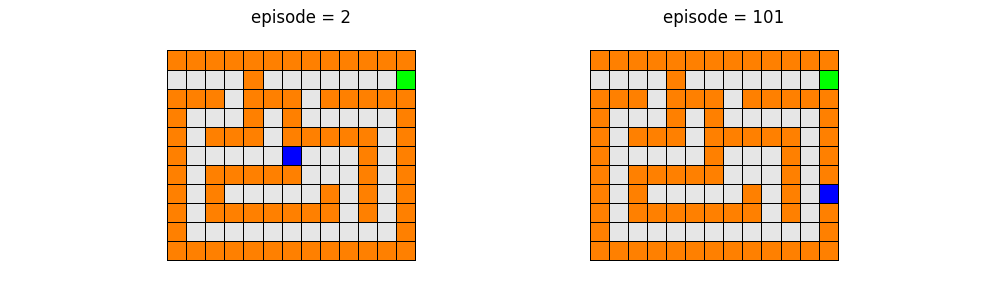
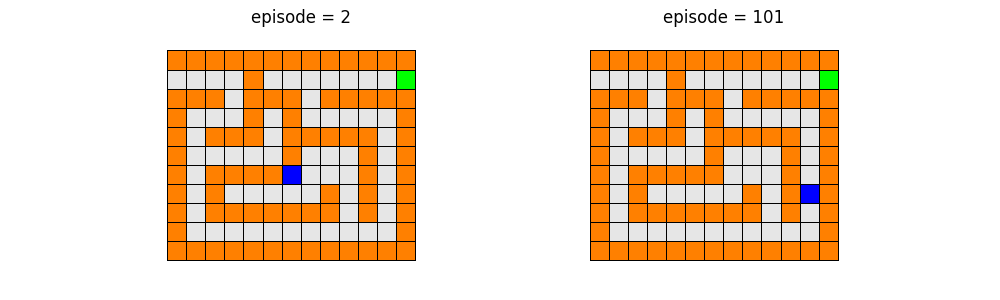
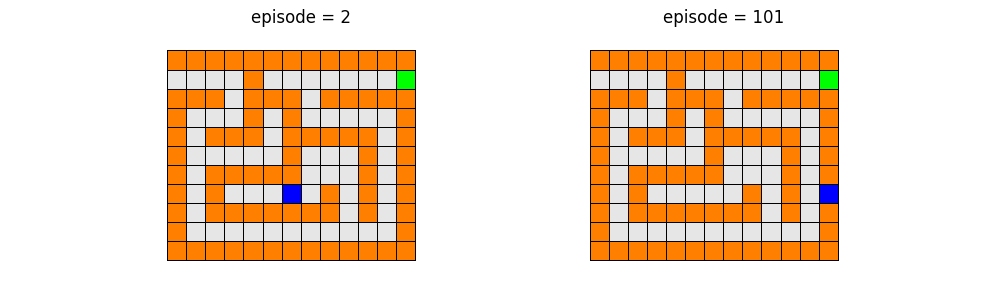
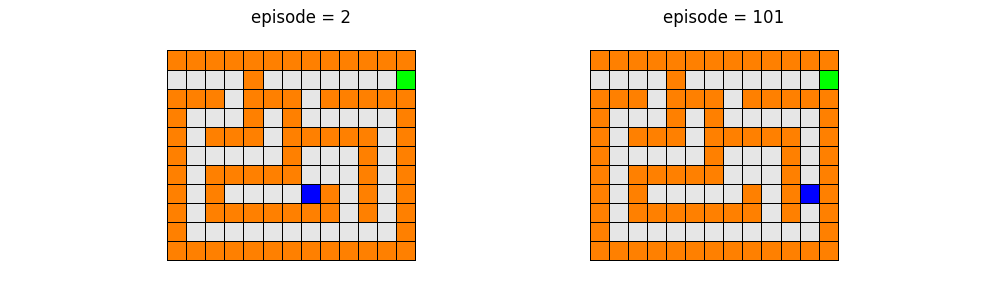
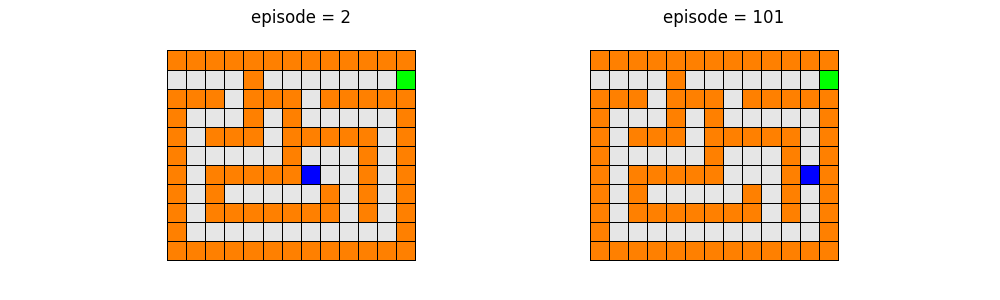
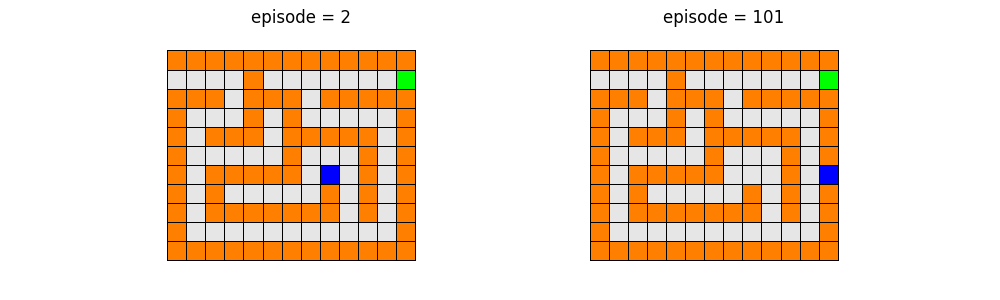
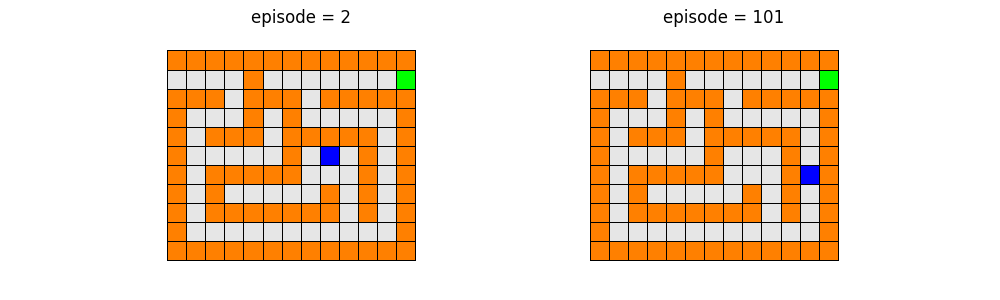
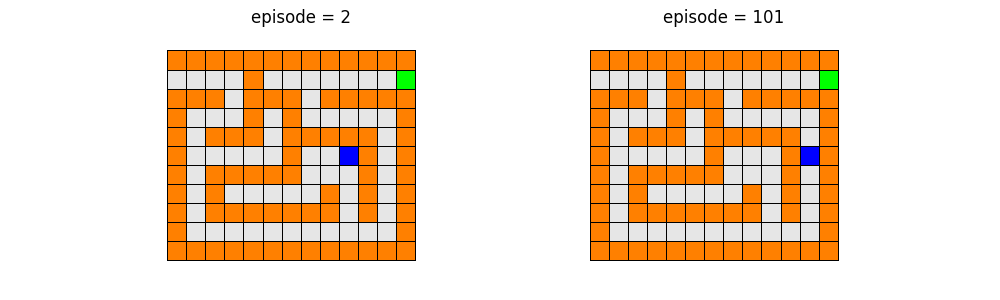
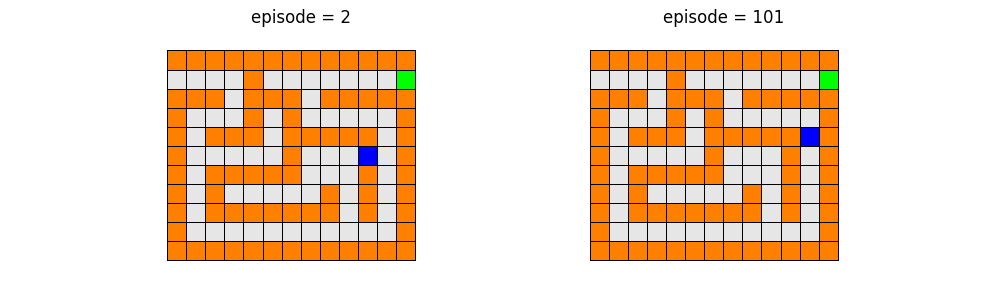
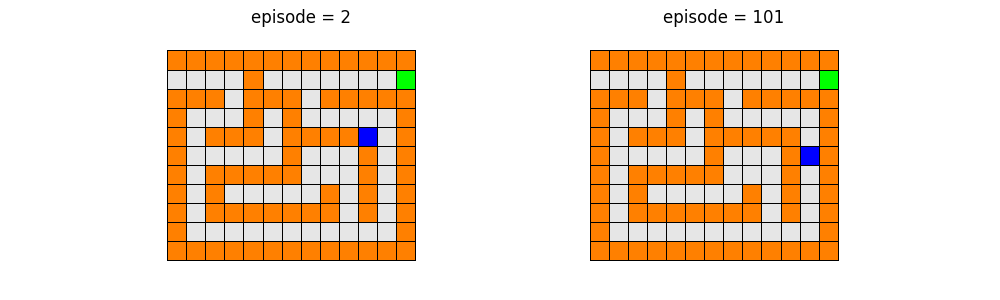
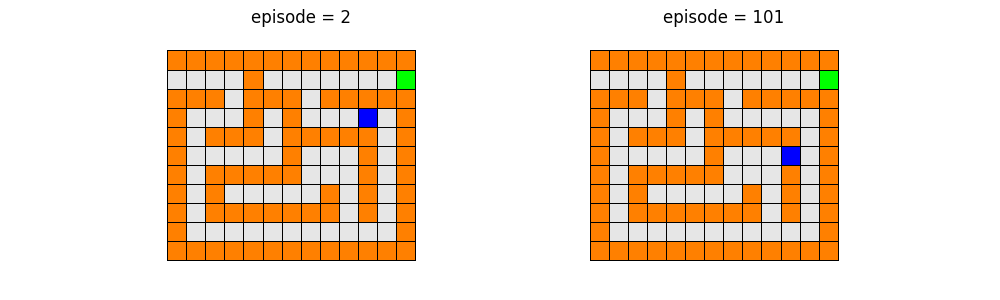
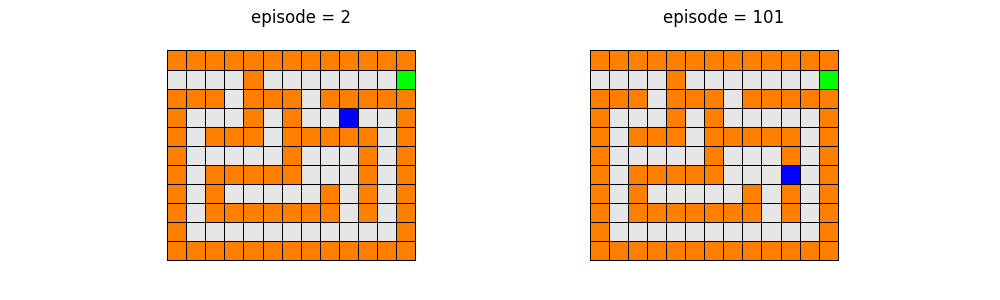
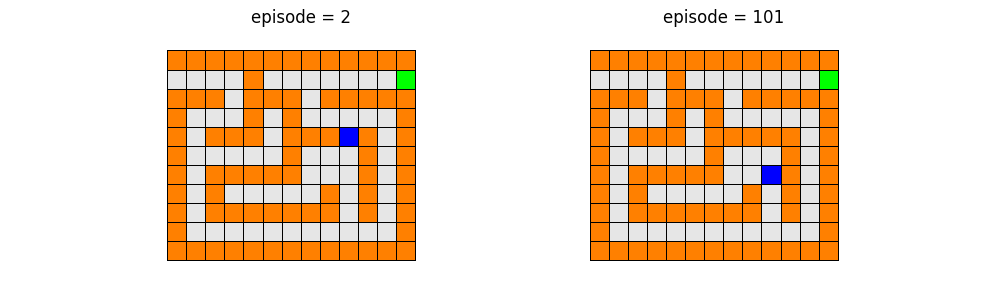
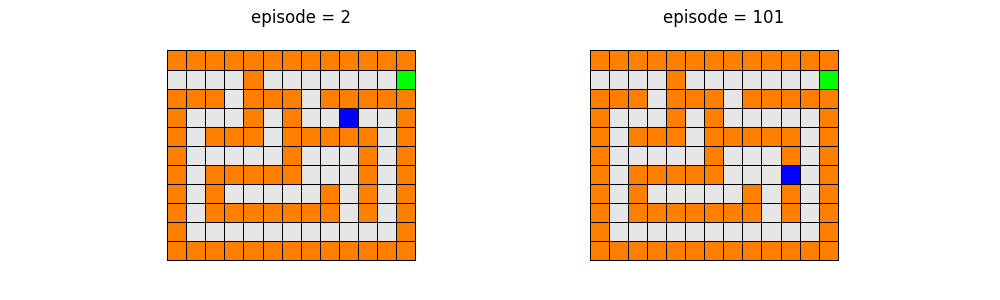
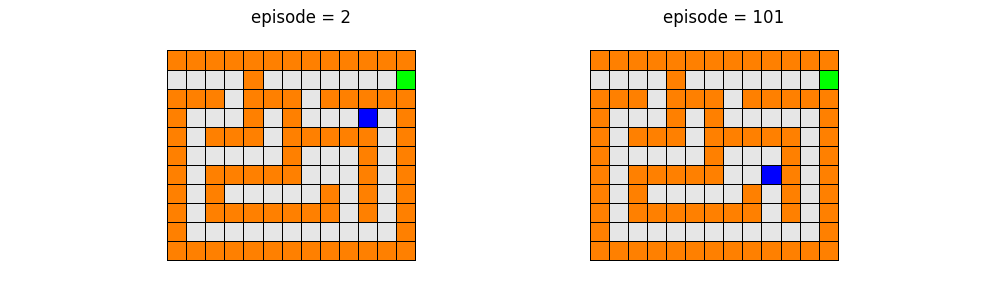
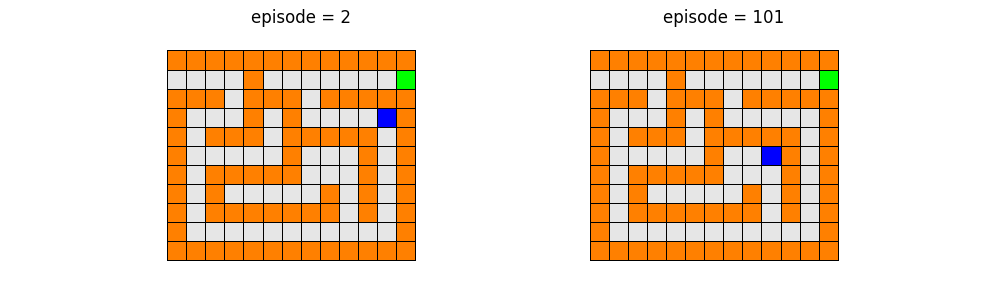
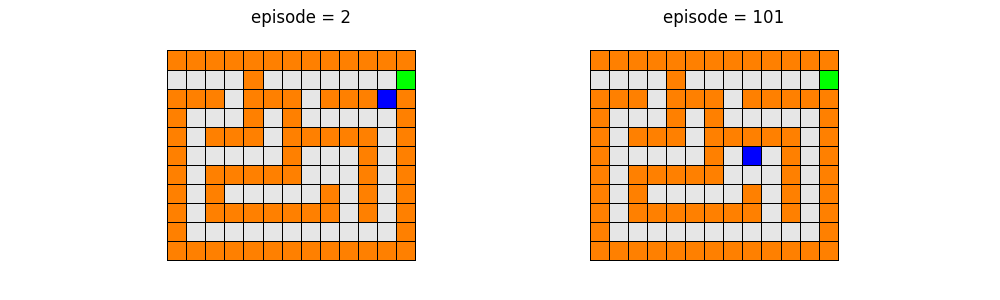
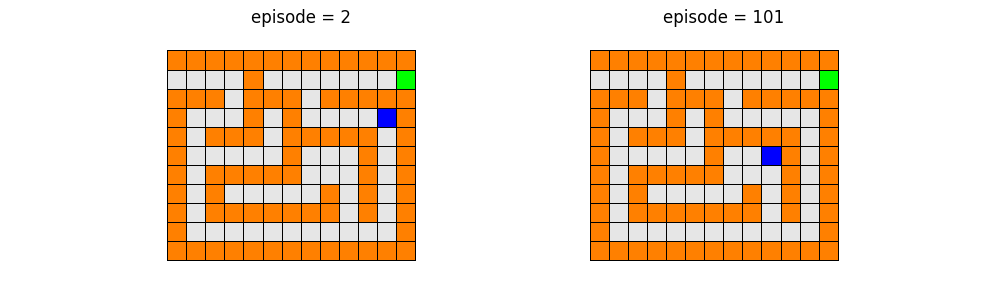
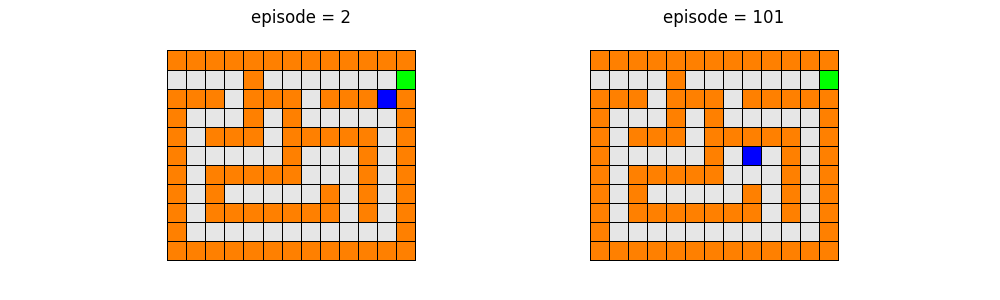
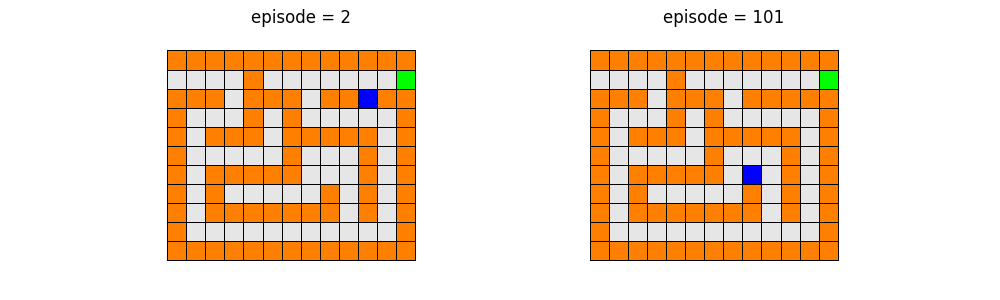
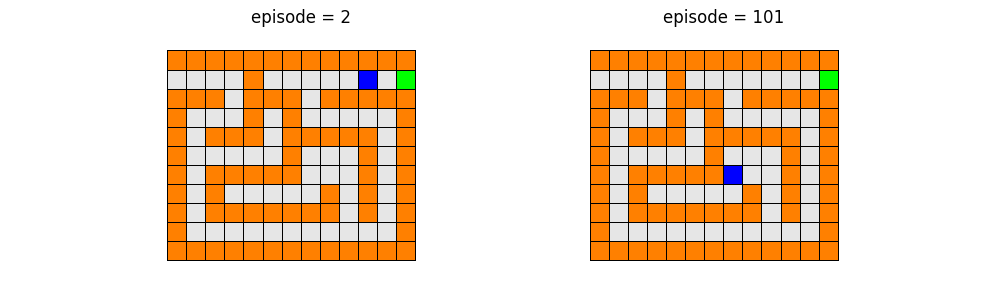
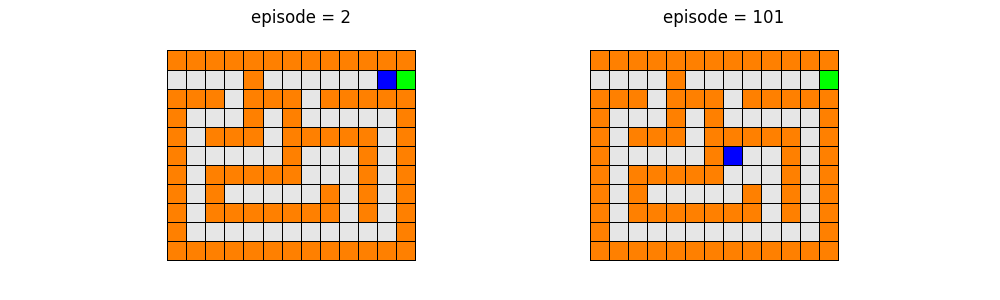
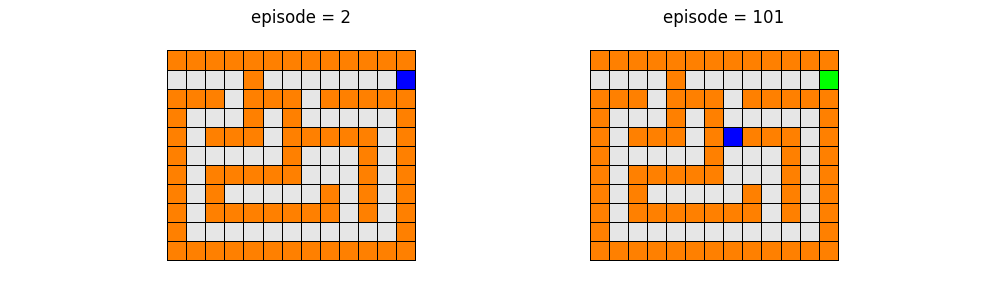
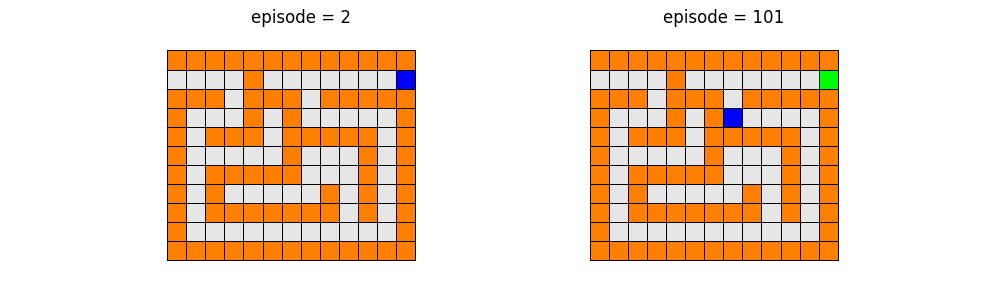
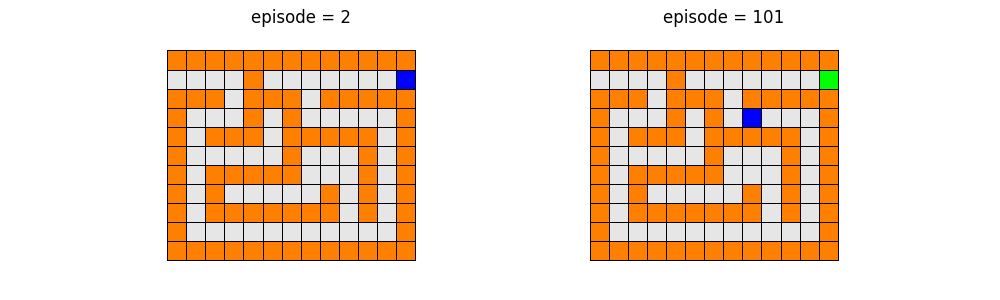
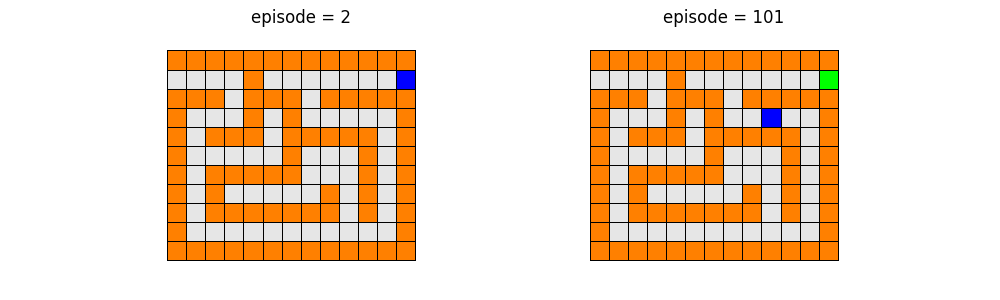
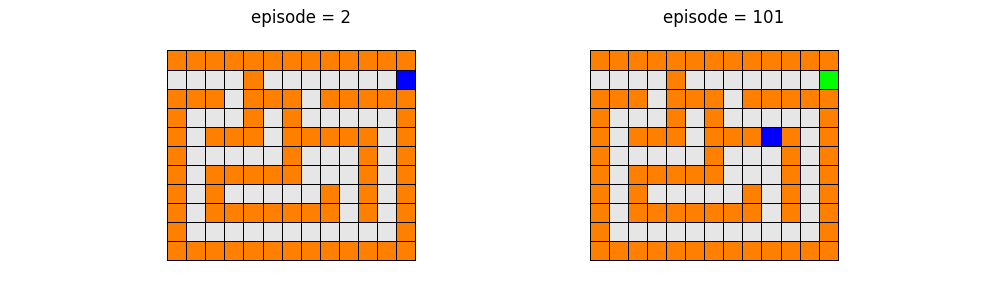
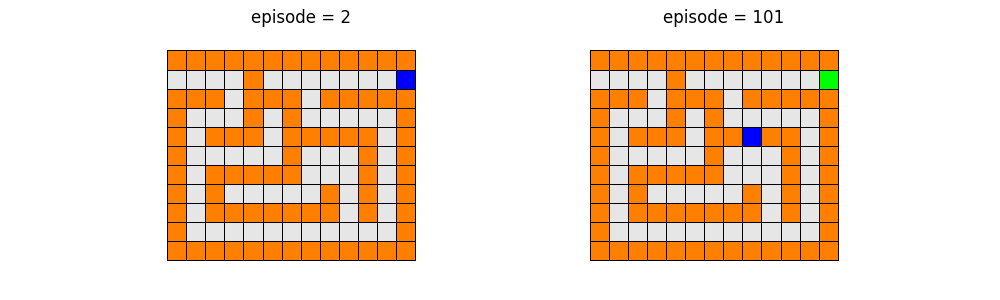
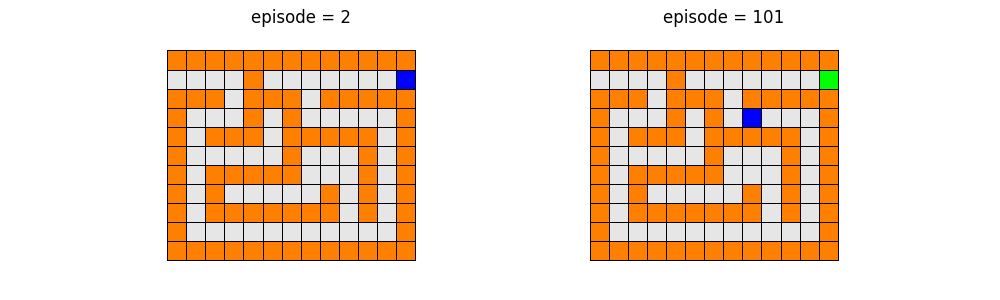
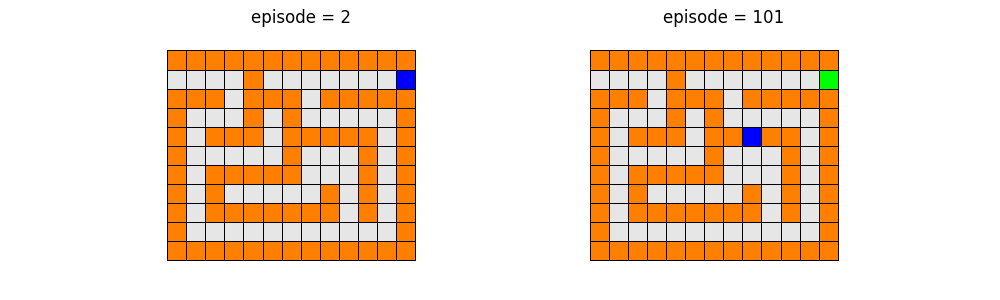
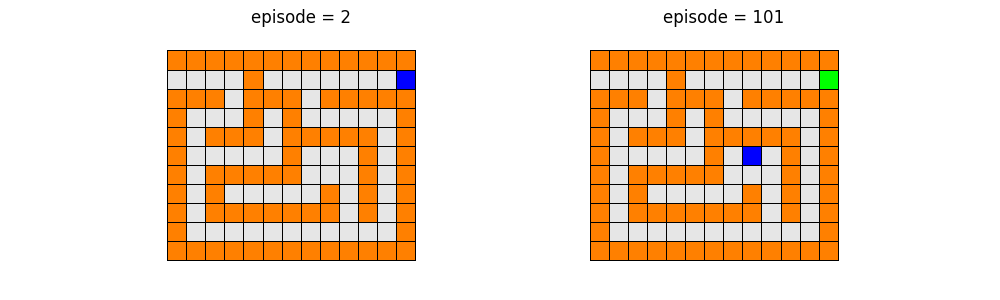
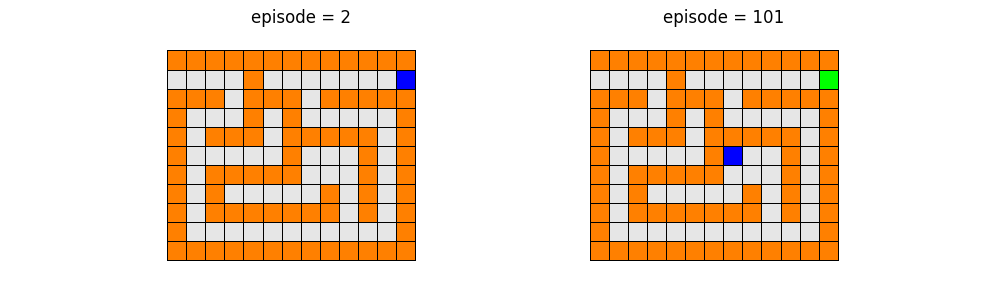
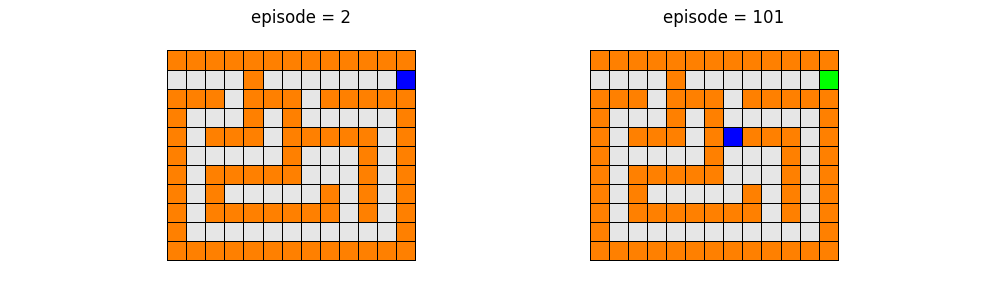
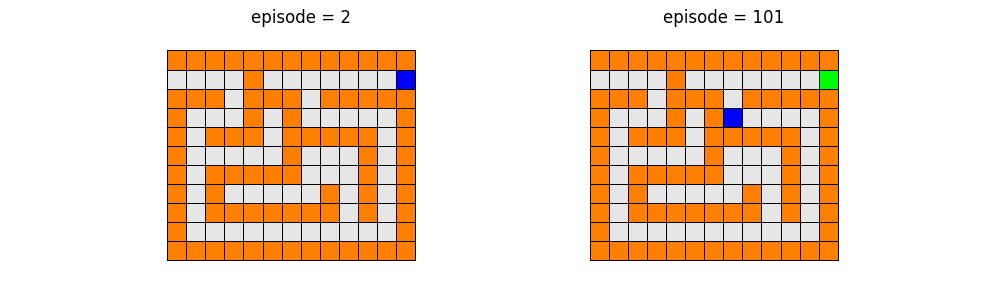
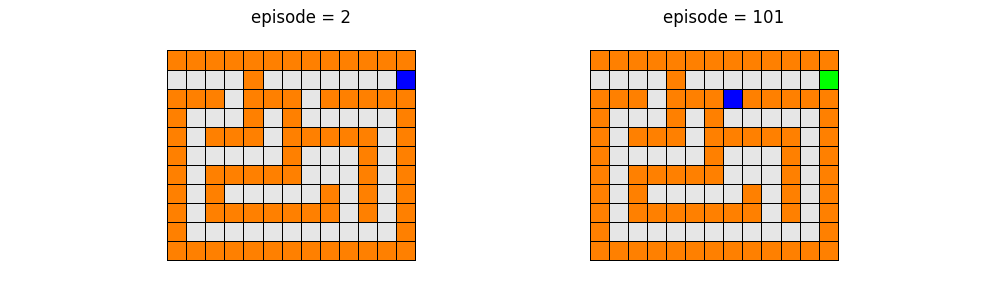
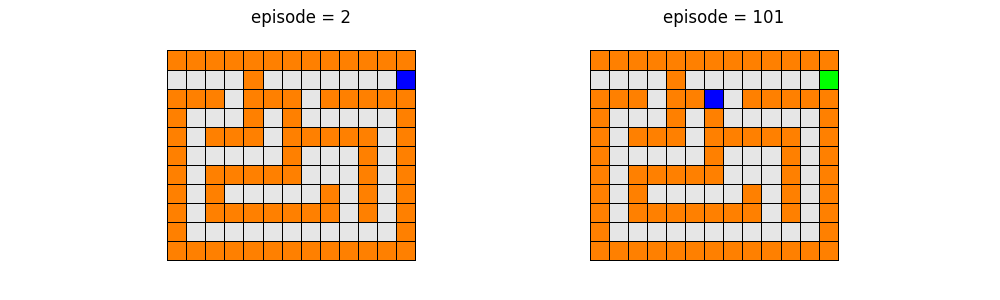
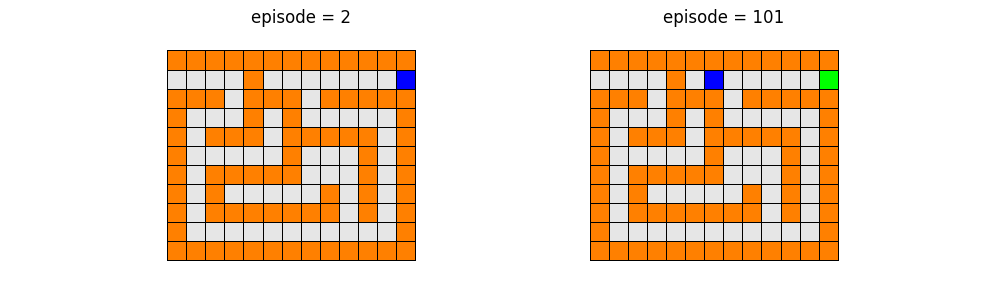
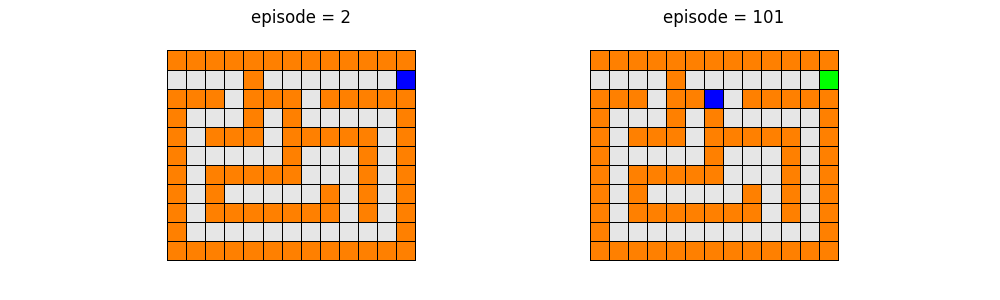
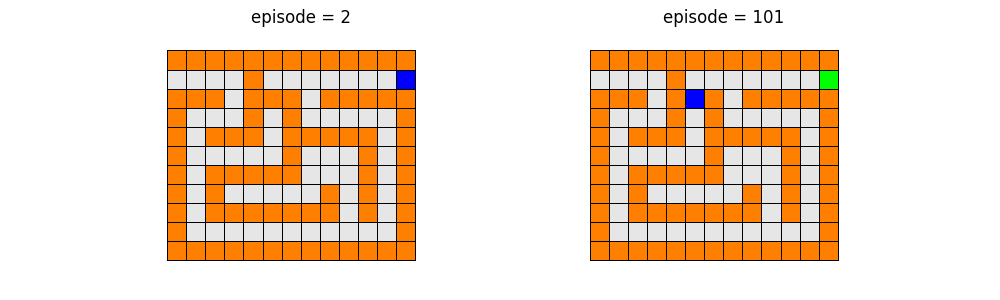
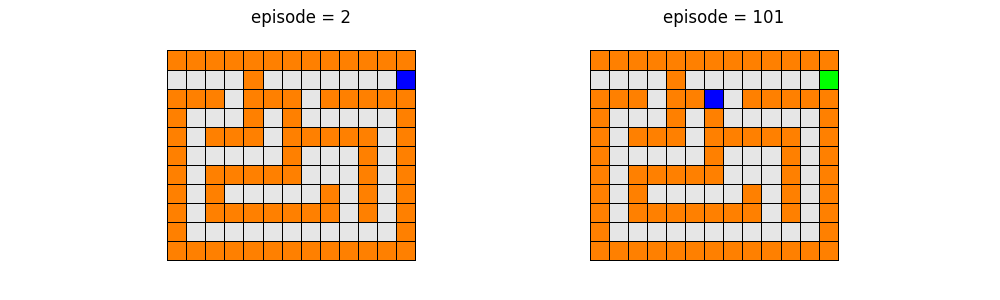
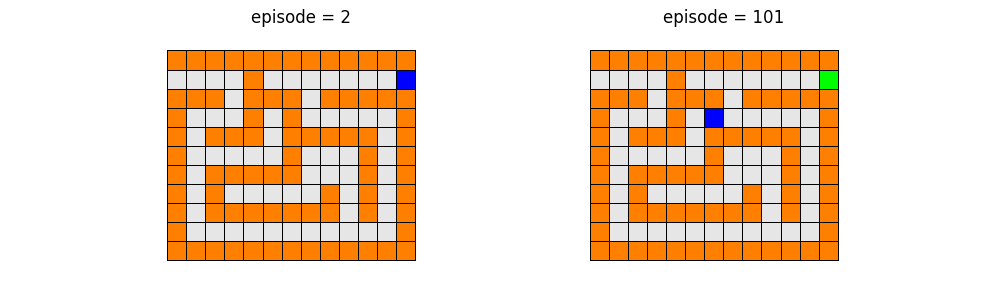
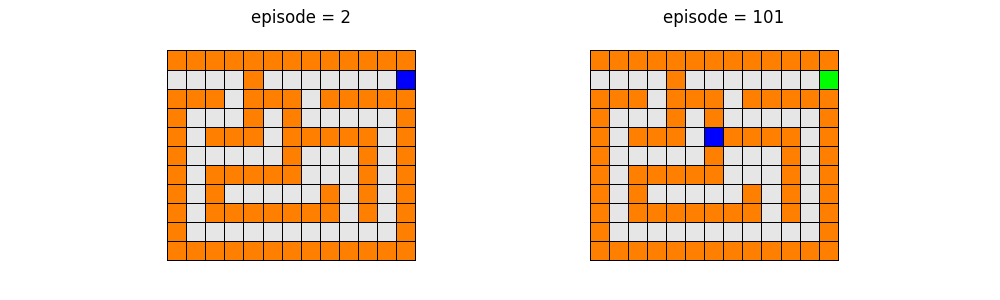
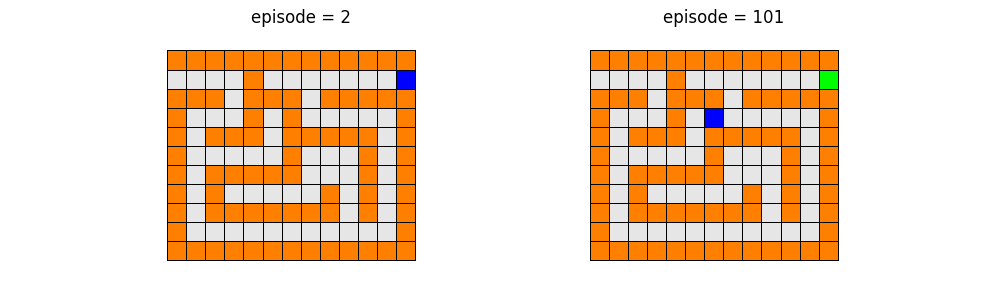
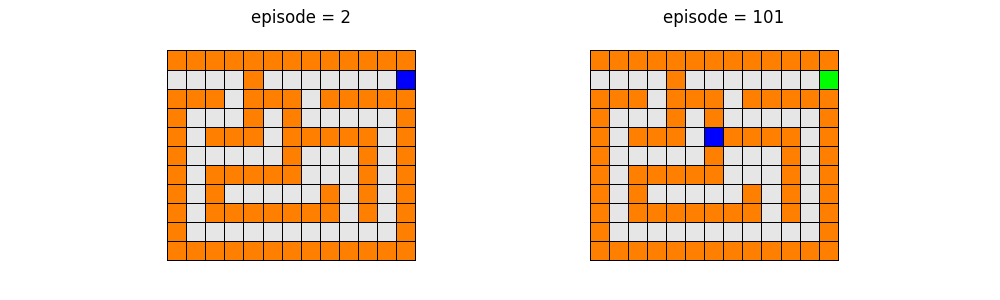
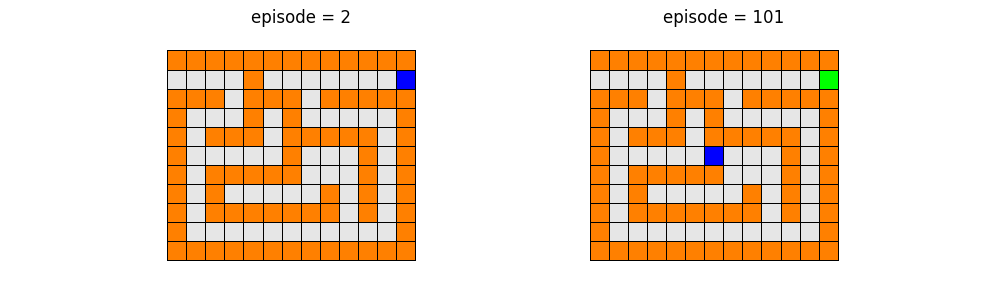
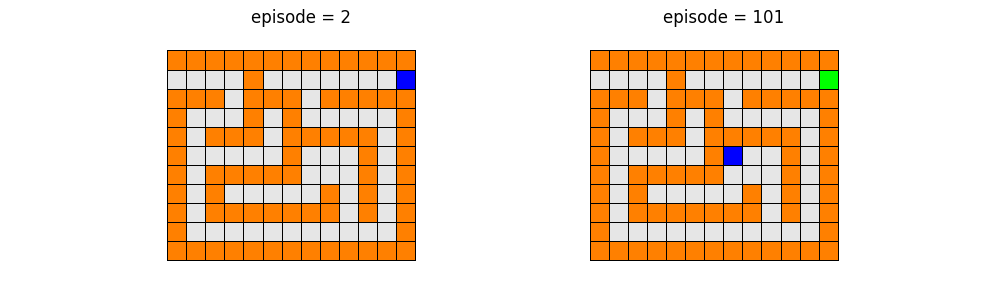
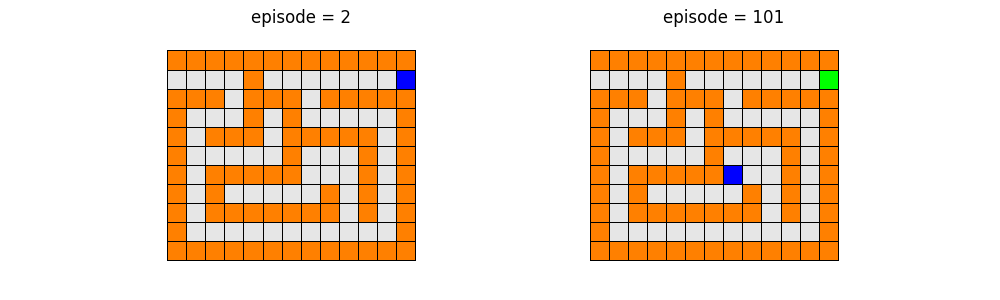
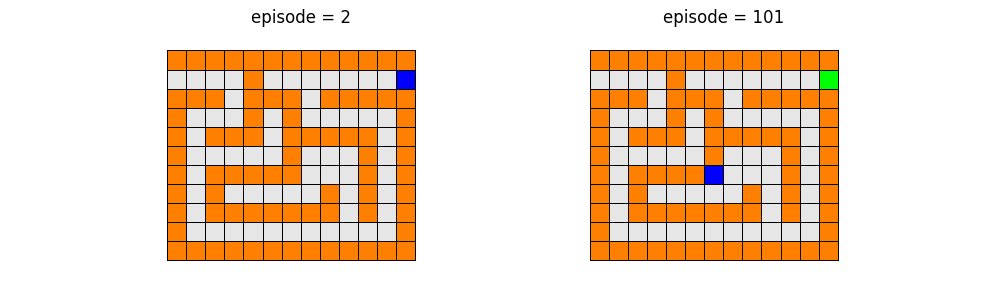
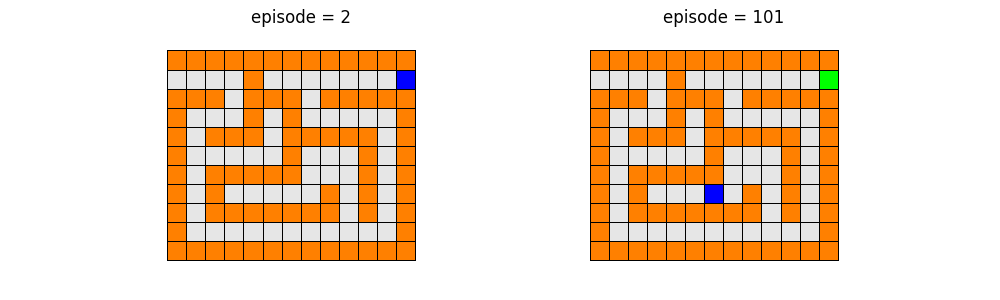
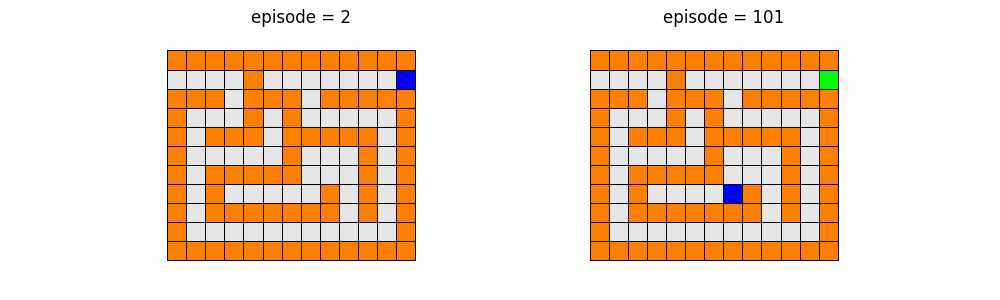
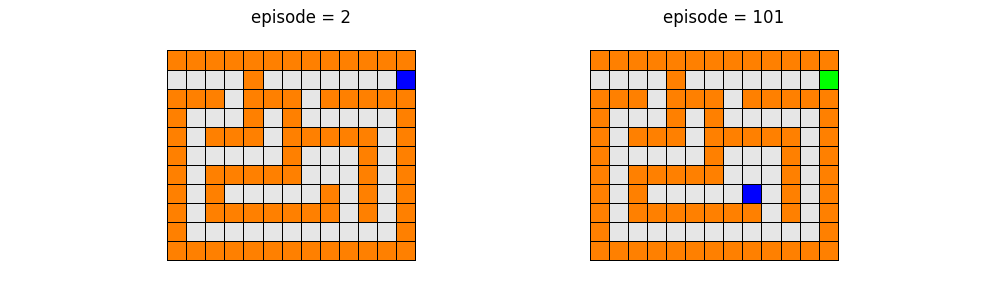
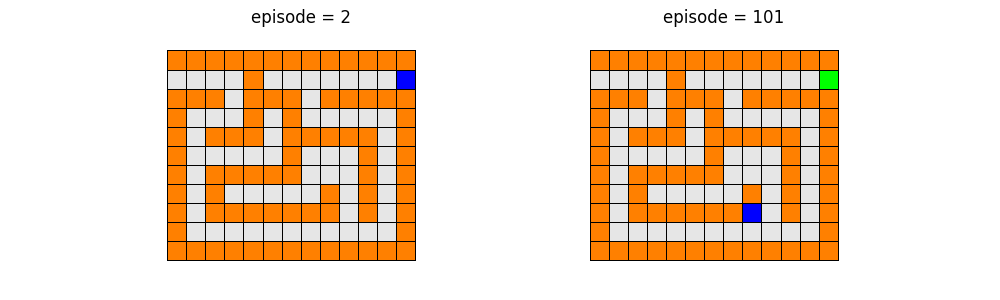
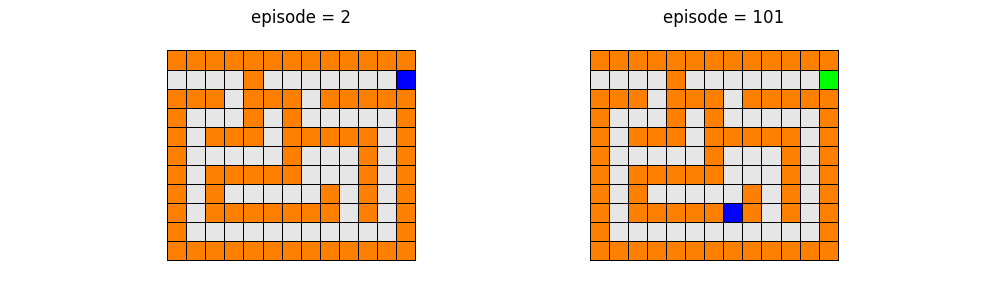
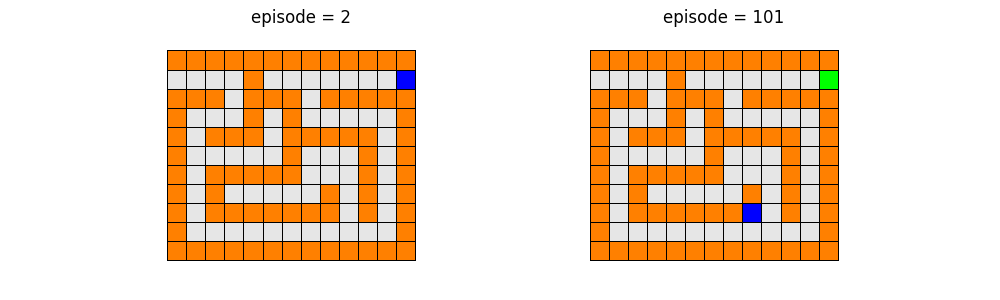
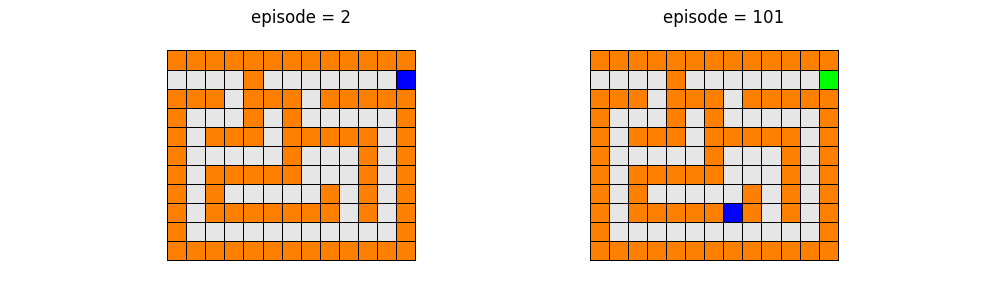
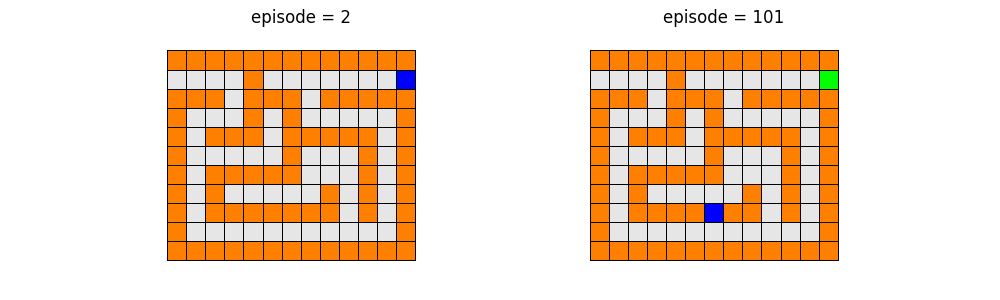
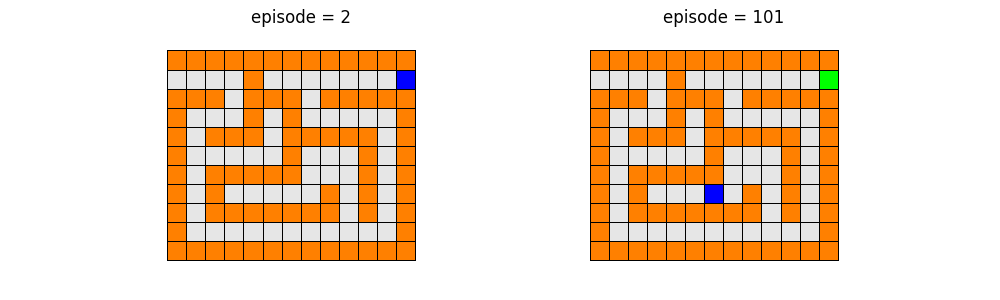
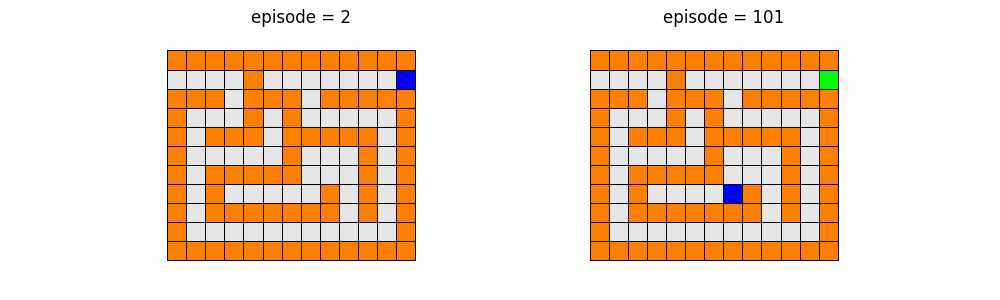
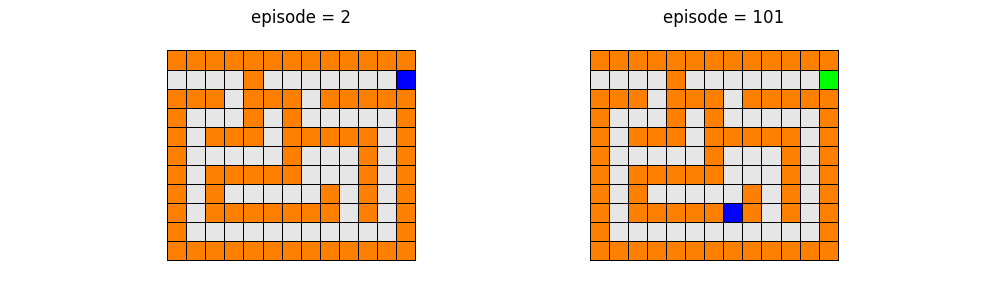
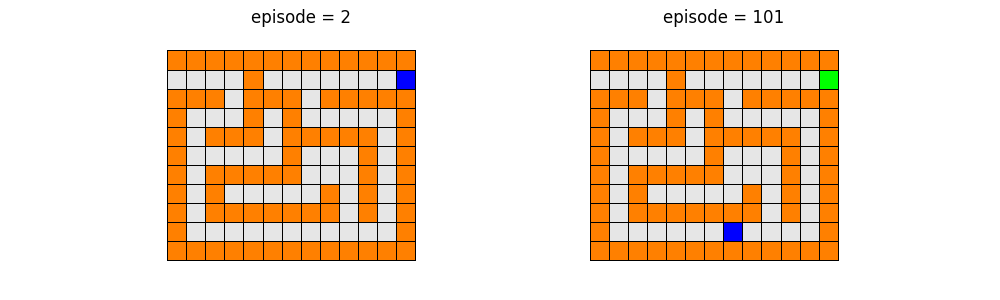
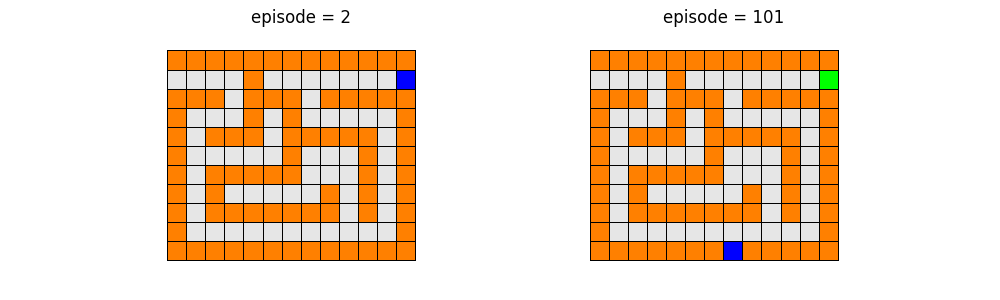
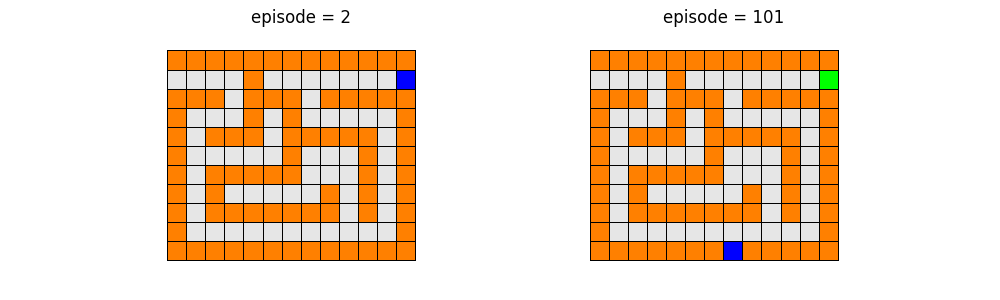
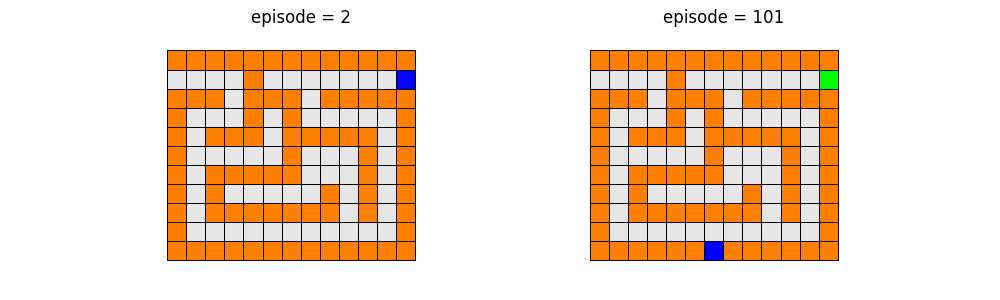
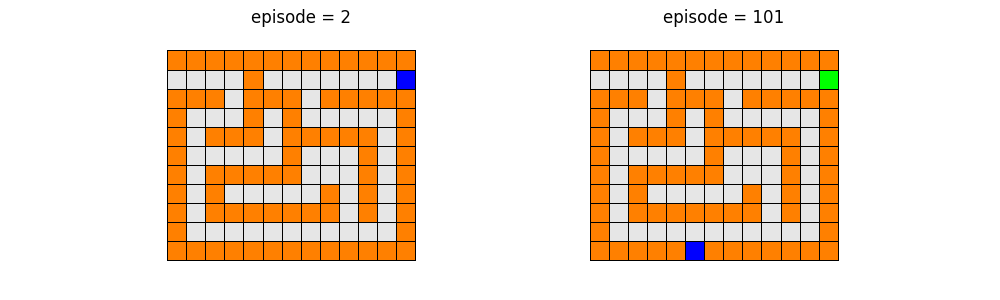
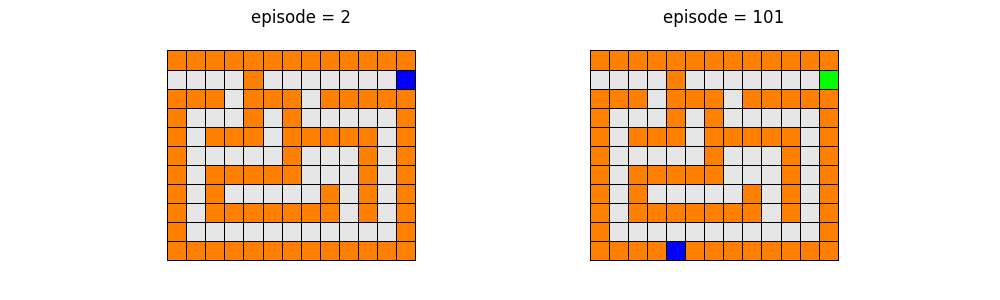
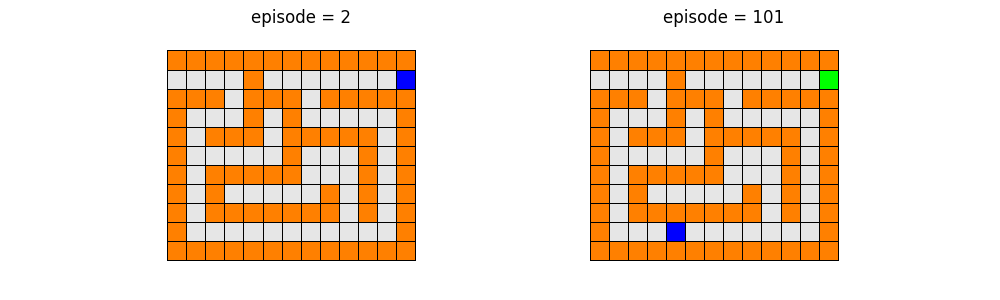
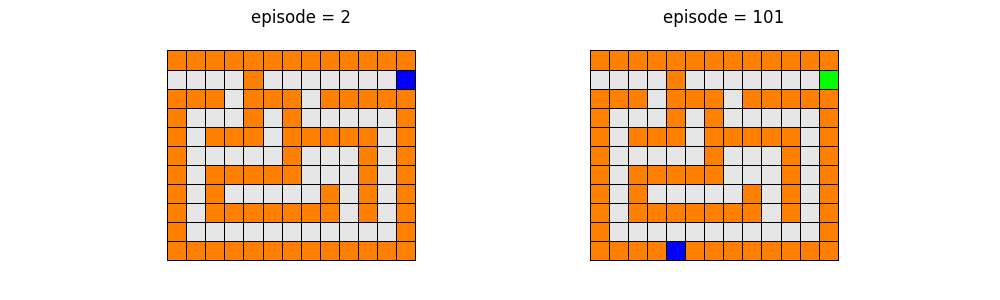
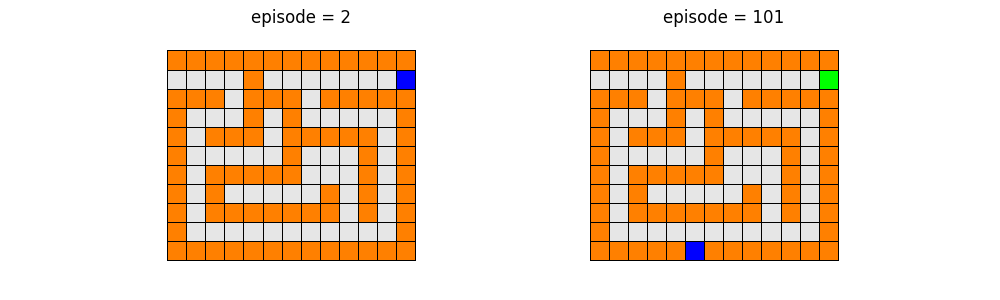
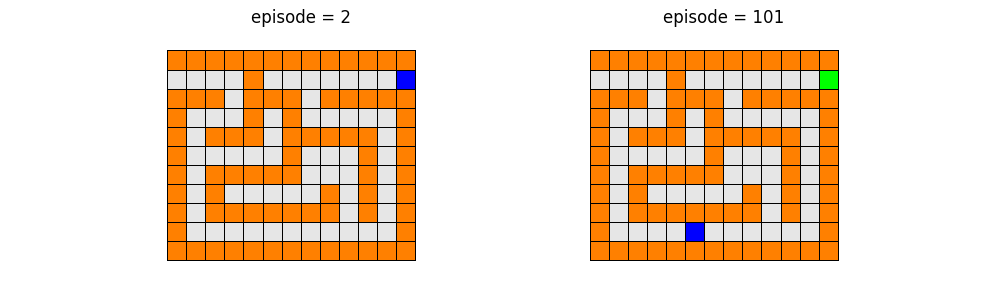
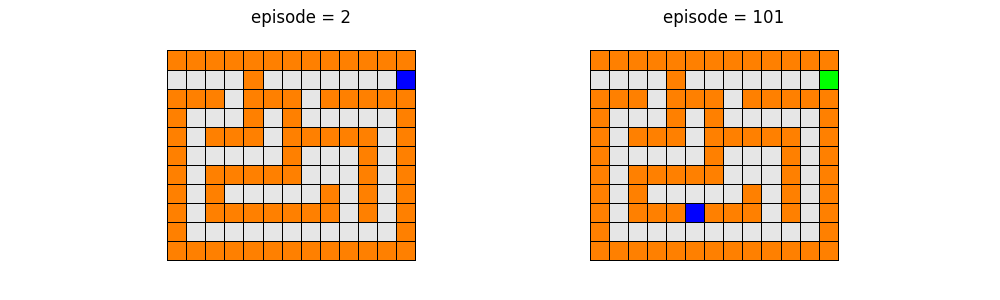
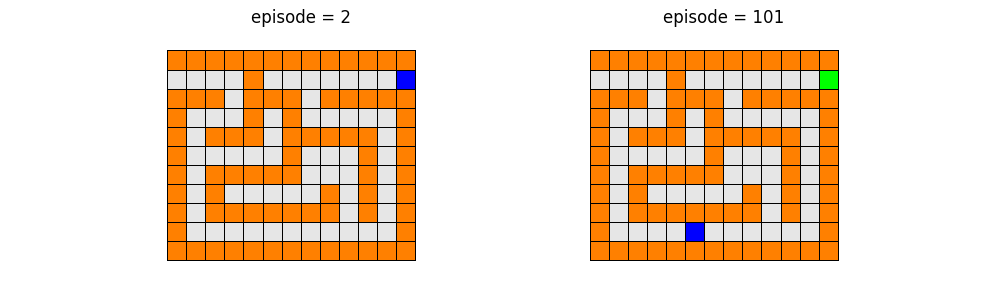
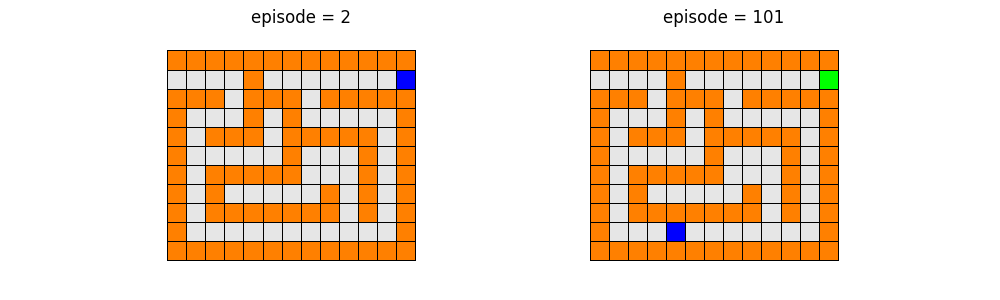
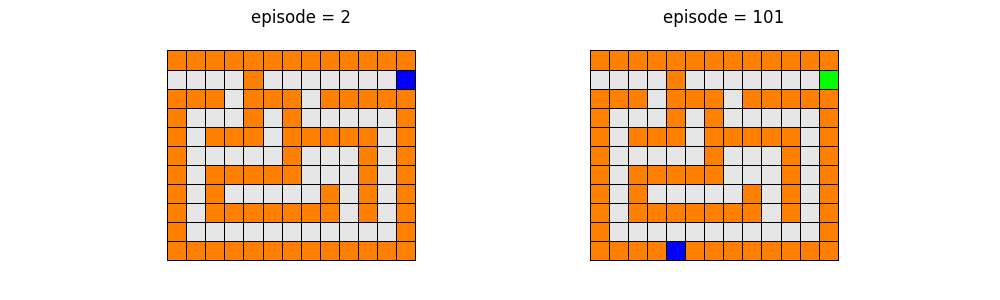
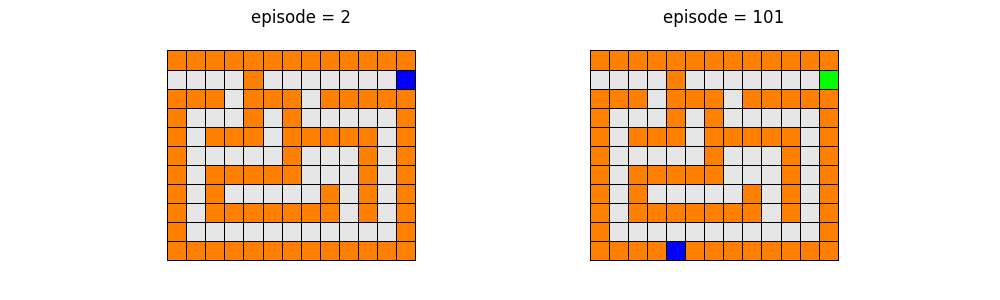
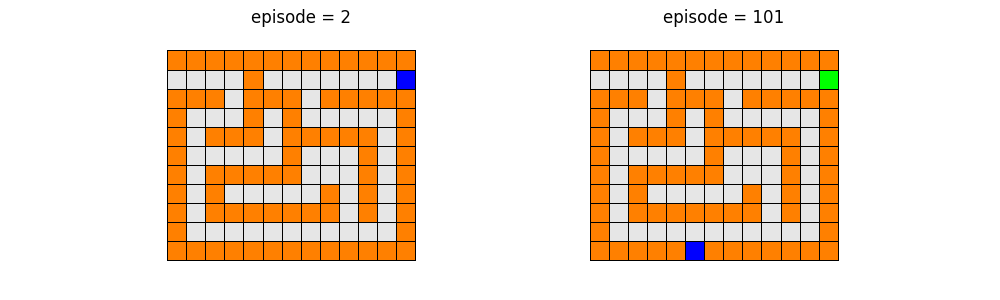
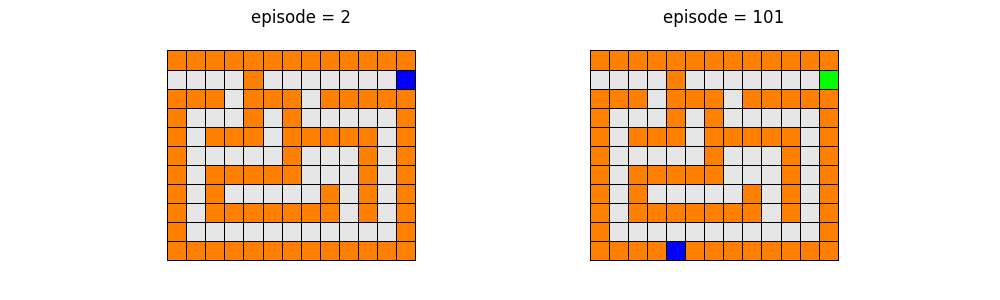
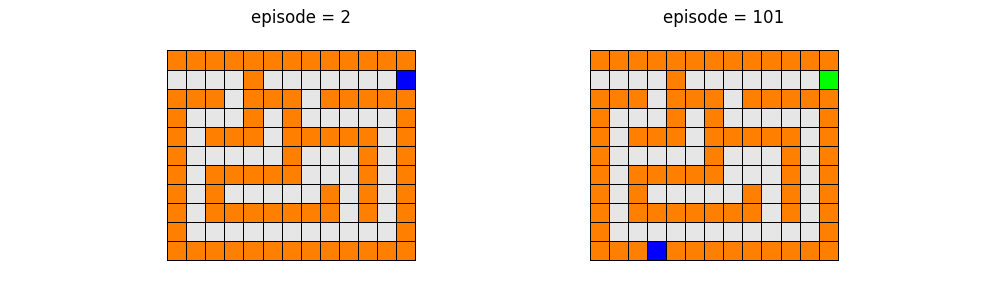

In [6]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

### animate training runs of one algorithm ###
animator.animate_training_runs(gridworld = small_maze, learner = qlearner,episodes = [1,100])

Remember, to see the entire Q-Learning function for this gridworld problem, enter

**animator.animate_training_runs??**

into a Python cell and activate. 

## 3.2  Once trained, how do we use our trained agent?

Given our agent - and more specifically the $Q$ function -is learned properly, how should the agent optimally move at each state?  This is implicit in the recursive definition of $Q$ itself.

Recall that $Q(s_{k-1},a_{k})$ is the maximum total reward possible if we begin at $s_{k-1}$ and take the action $a_{k}$. So to maximize the overall reward we should choose the action $a_{k}$ such that $Q(s_{k-1},a_{k})$ has the largest possible value, or equivalently

$a_{k}=\alpha_{i^{\star}}$ 

where

$i^{\star}=\underset{i=1...M}{\text{argmax}}\,\,Q\left(s_{k},\,\alpha_{i}\right)$

(A note on jargon: this is often referred to as an **optimal policy** function.)  

So in sum - after learning $Q$ properly we can start at any initial state $s_0$ and use the optimal policy function to take actions that allow us to travel in a reward maximizing path of states until we reach the goal (or a maximum number of steps are taken).

>  After learning $Q$ properly we can start at any initial state $s_0$ and use the optimal policy function to take actions that allow us to travel in a reward maximizing path of states until we reach the goal (or a maximum number of steps are taken).

### Example: back to the gridworld maze - using the optimal policy of a trained agent

In the next Python cell we illustrate how to use the optimal policy function with the grid world example (where we have already learned the proper $Q$ matrix in a previous Python cell).  You can initialize the agent at any square on the board (except hazard locations in orange), and activating the cell will animate its path (using the optimal policy function).


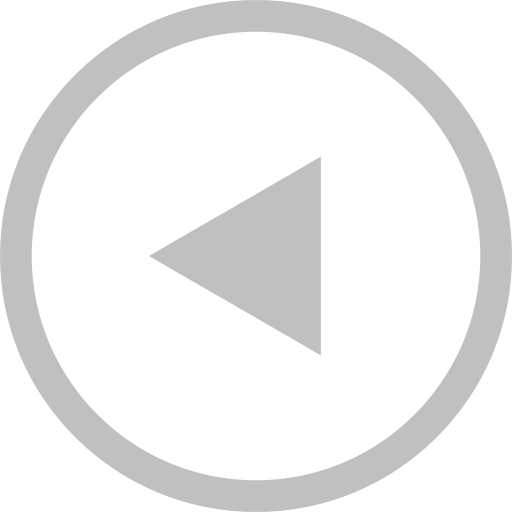
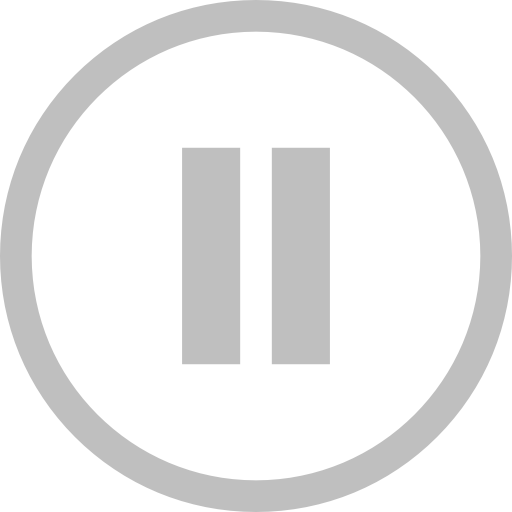
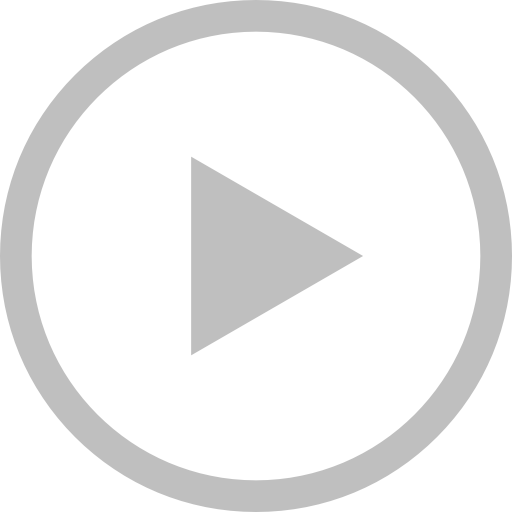
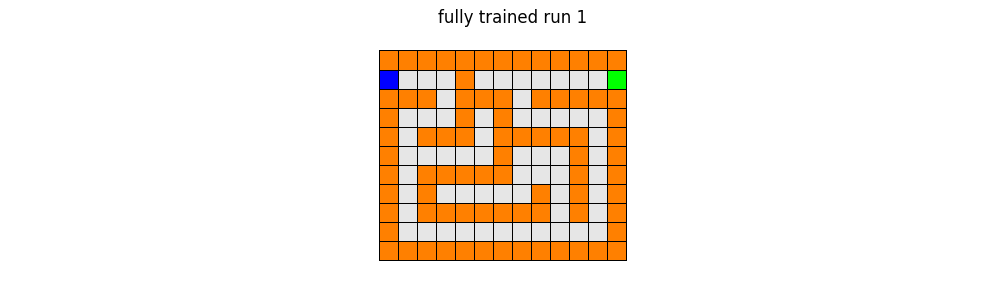
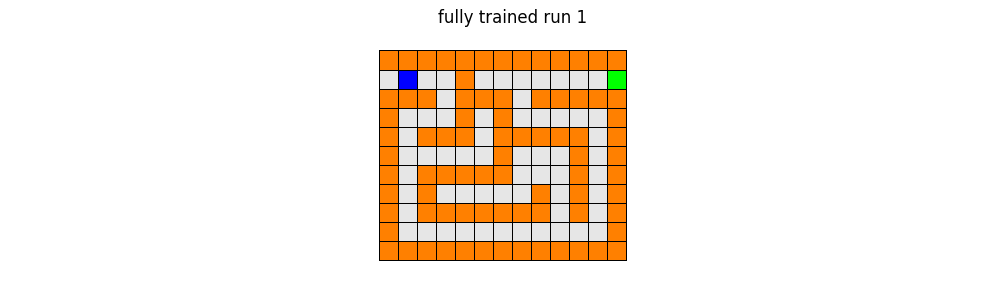
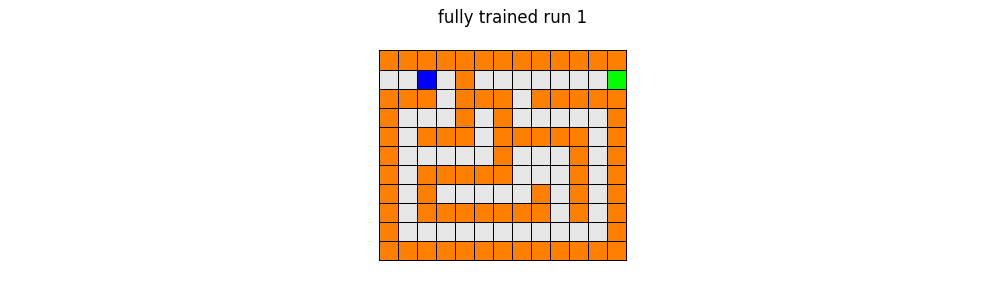
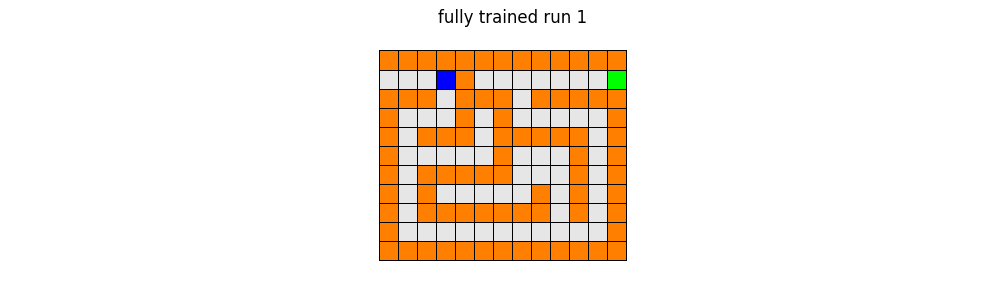
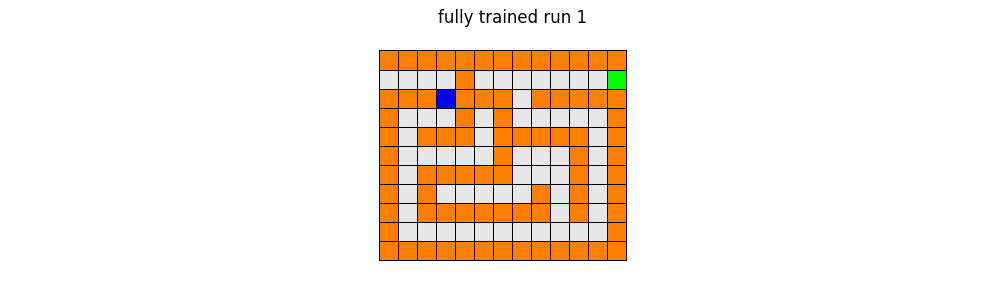
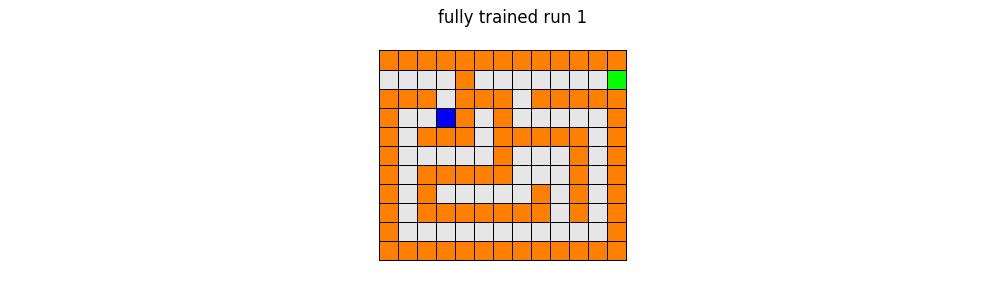
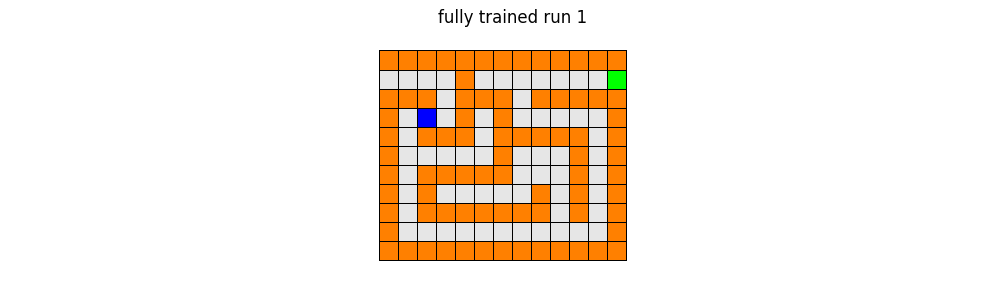
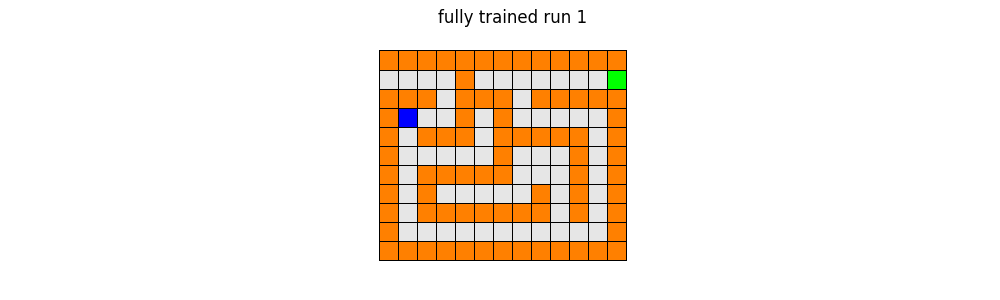
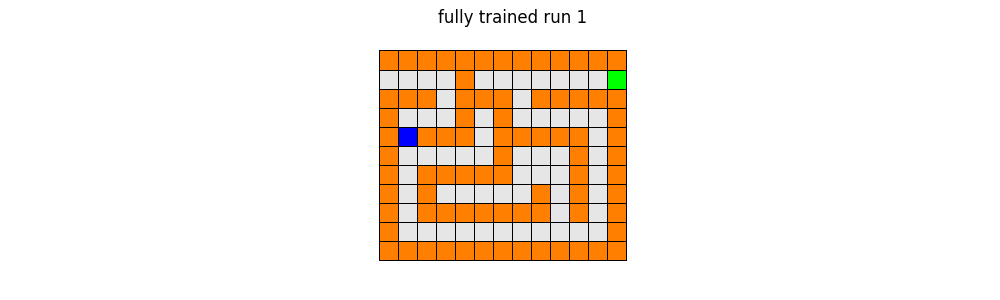
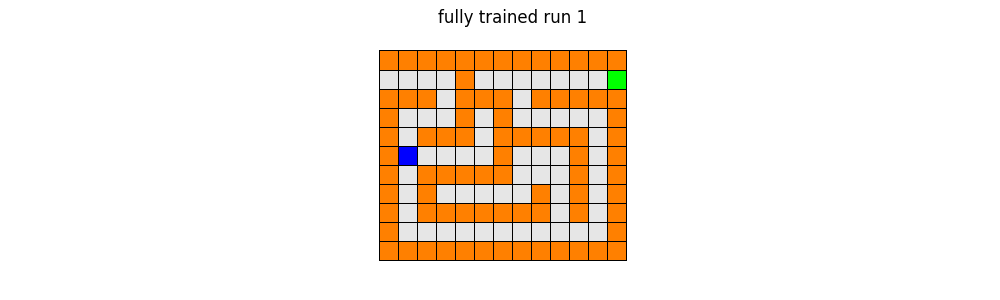
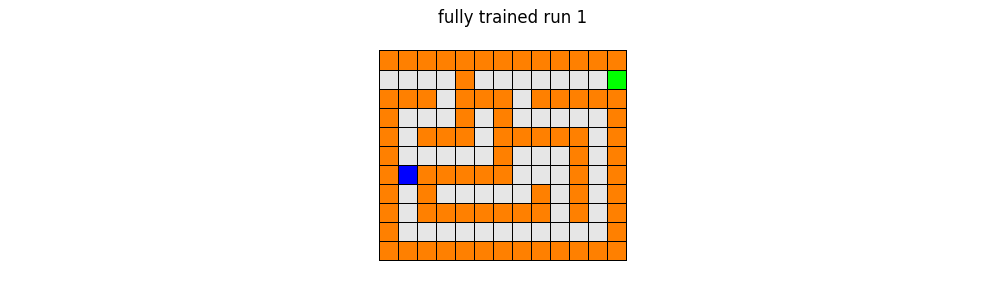
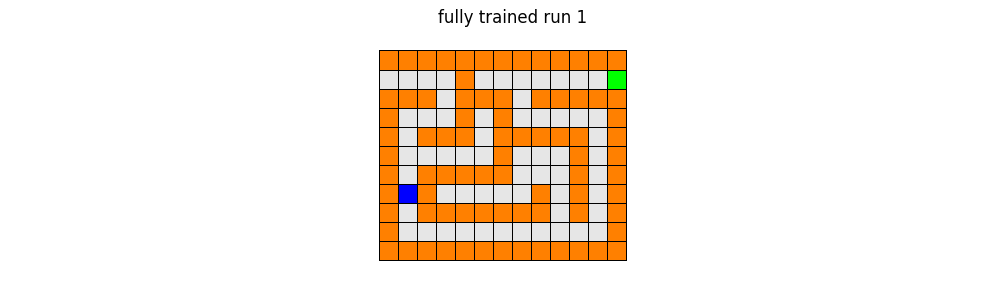
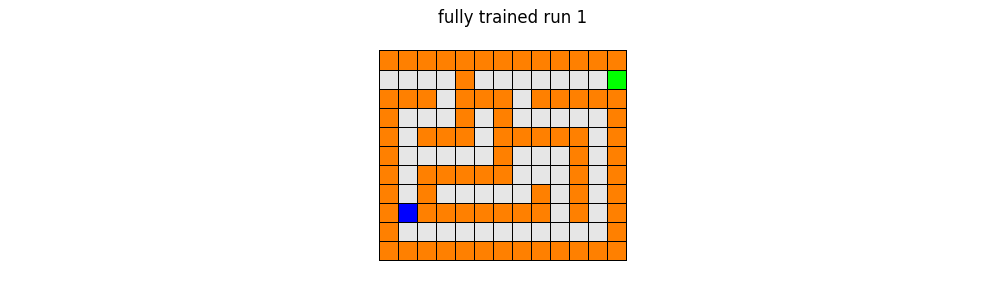
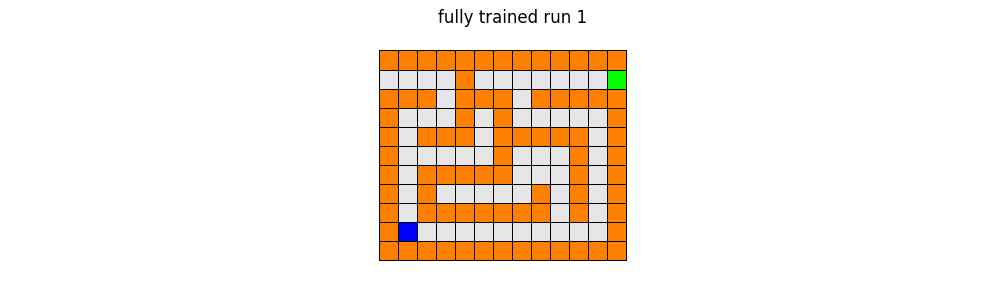
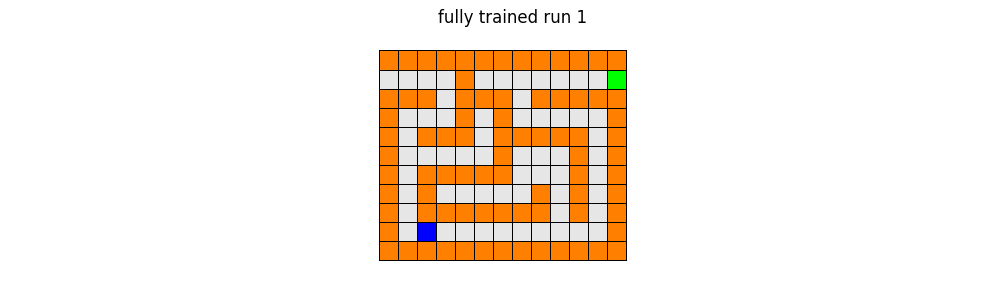
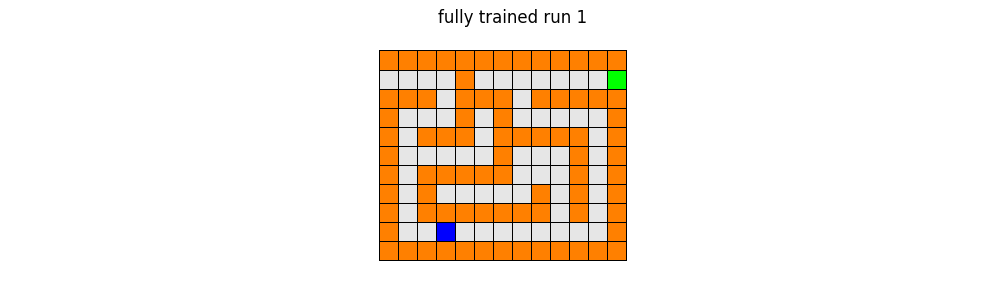
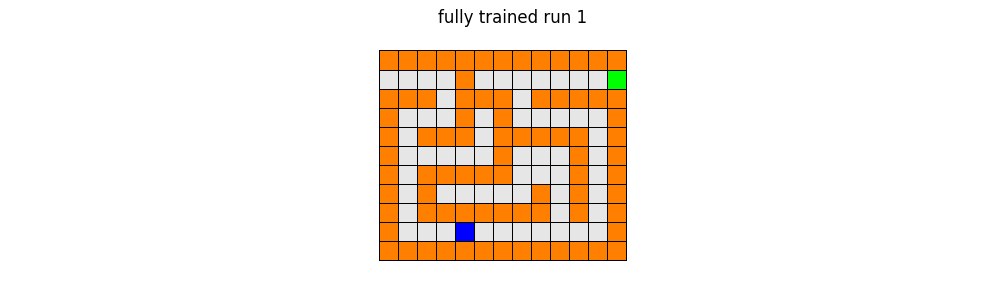
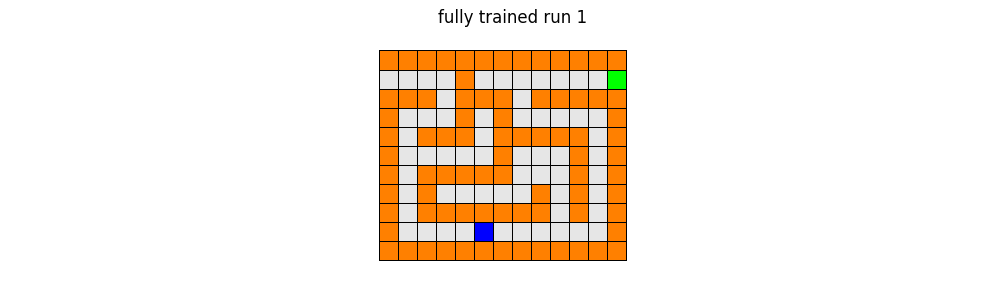
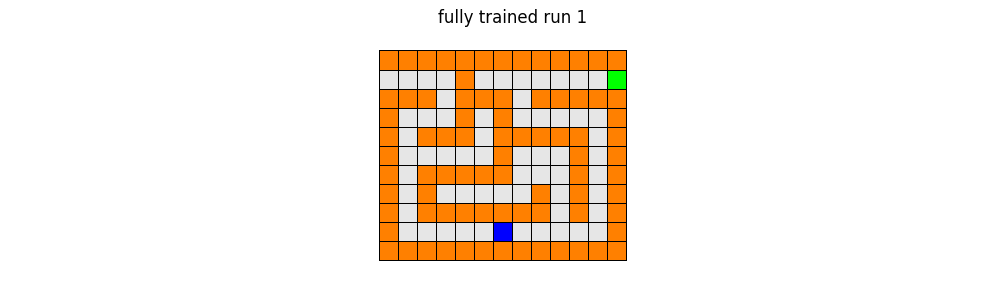
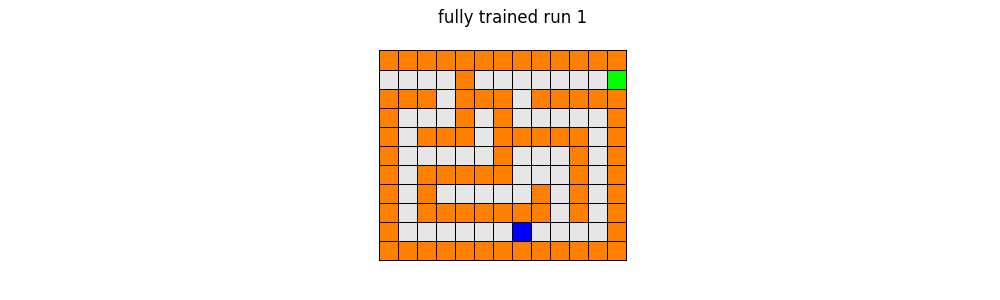
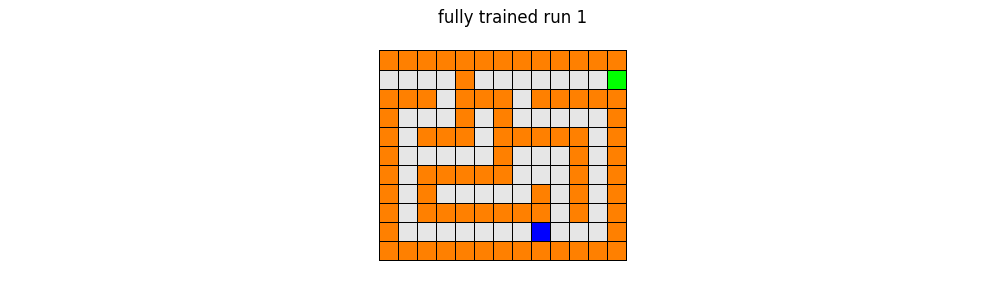
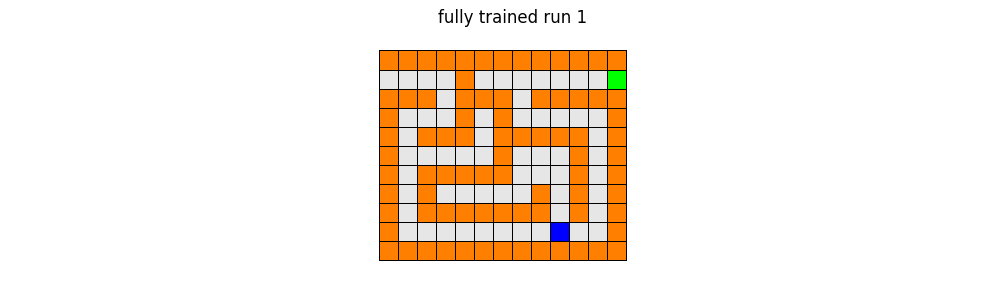
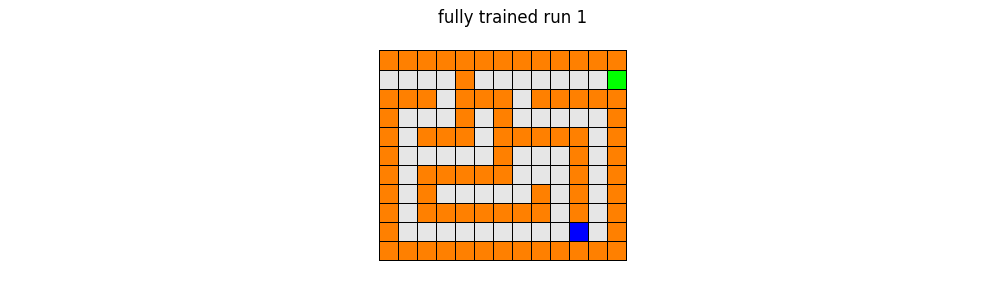
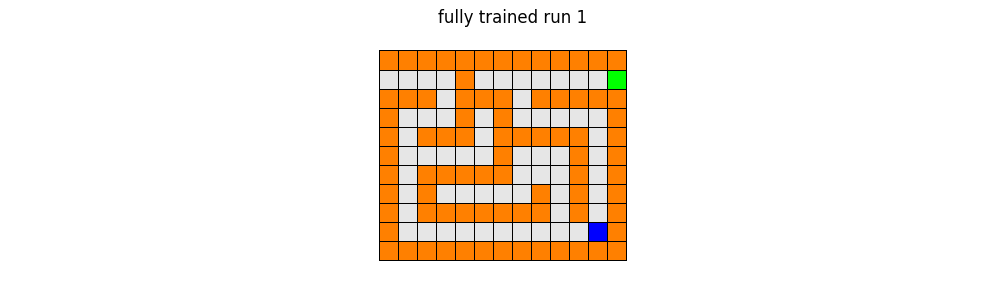
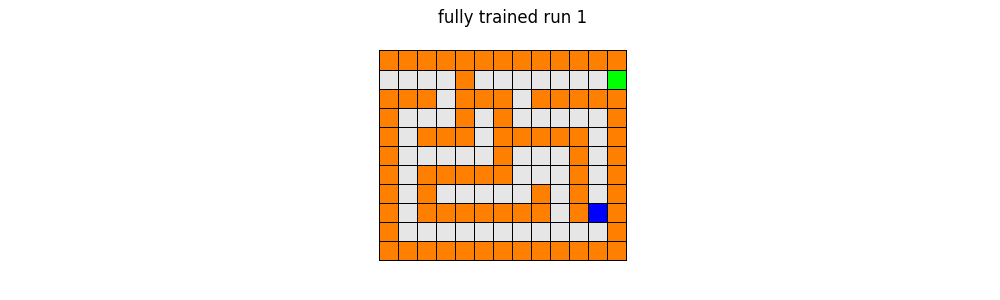
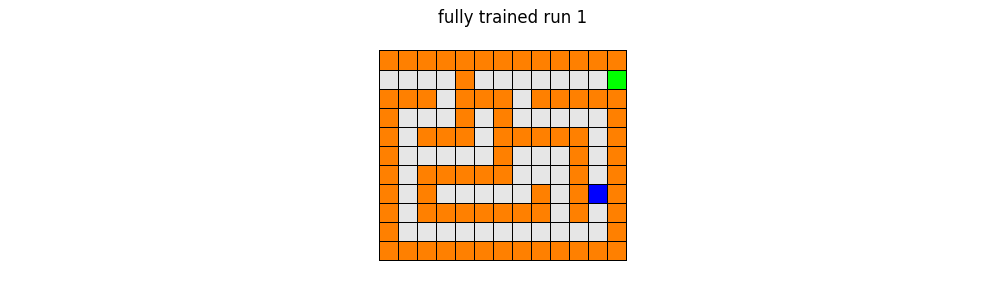
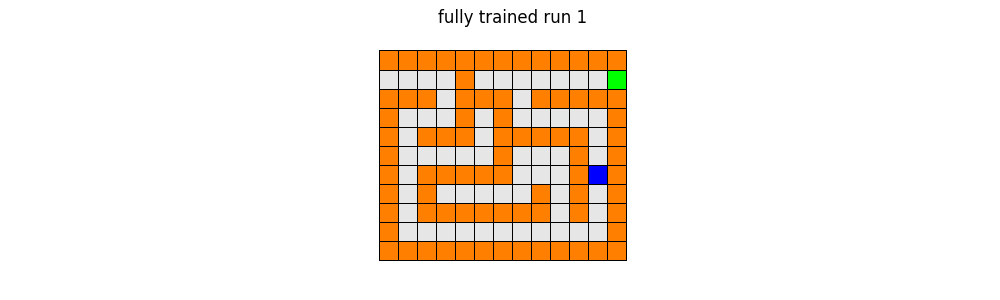
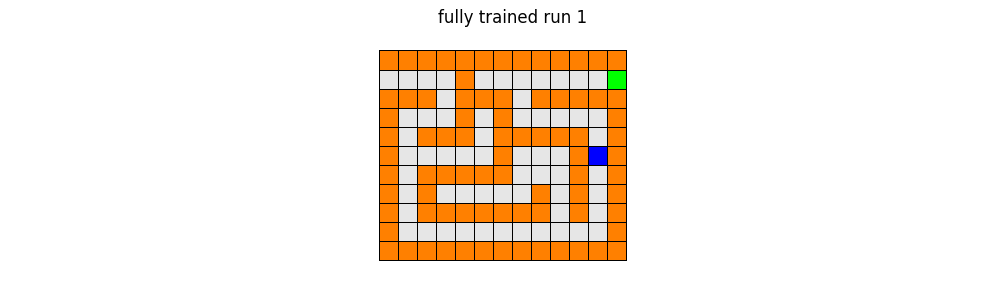
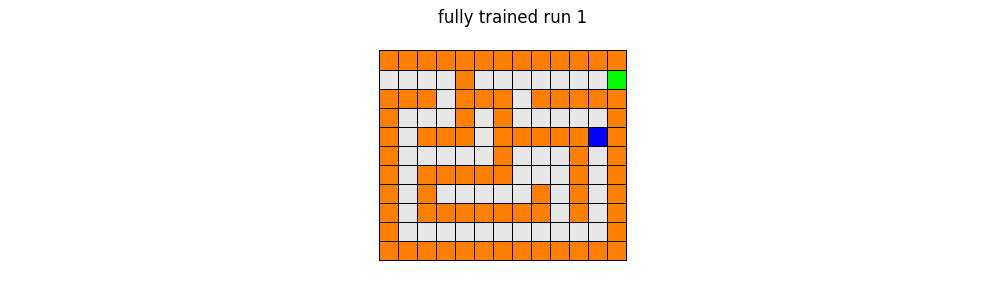
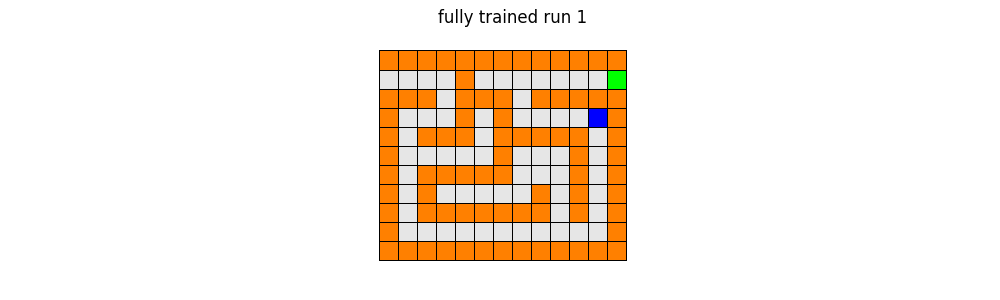
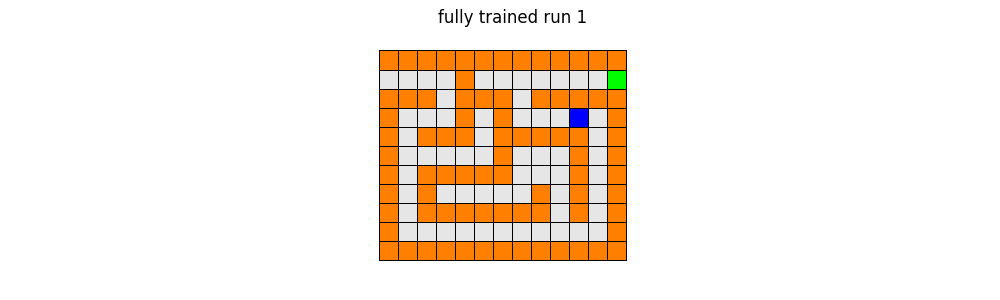
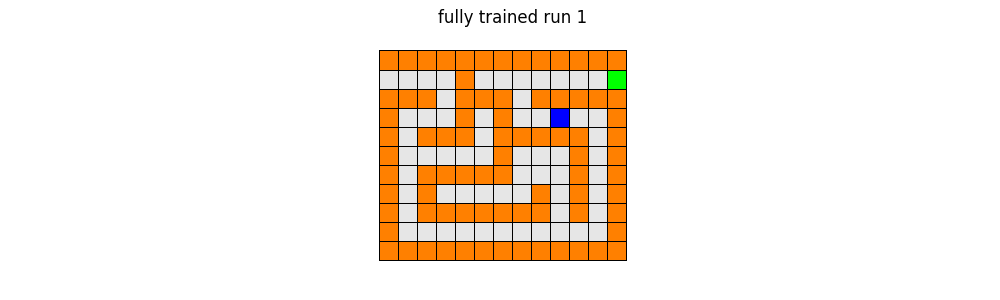
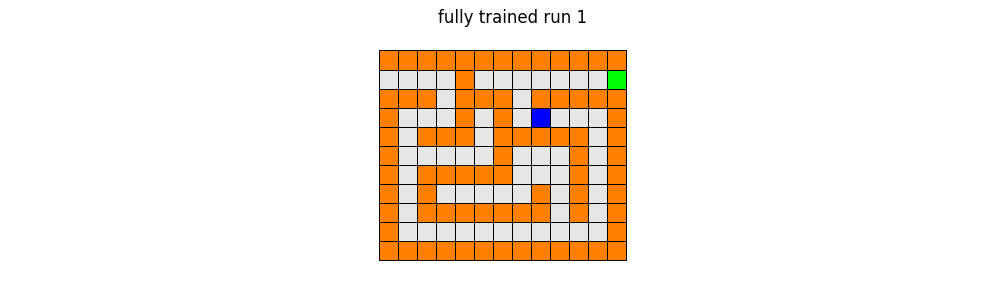
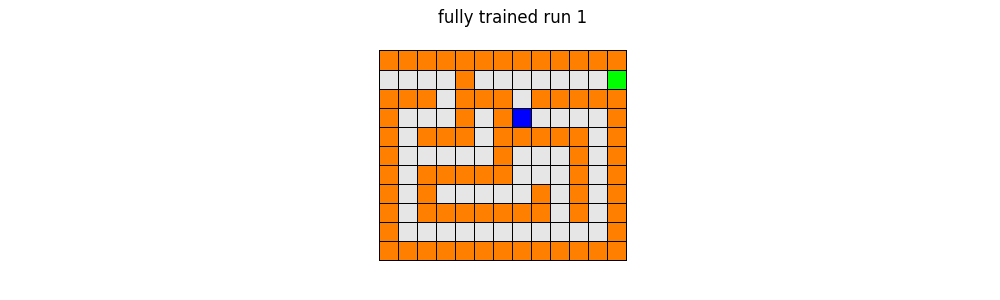
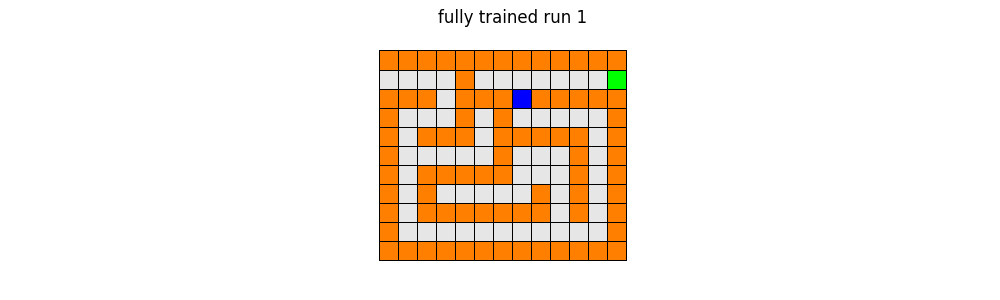
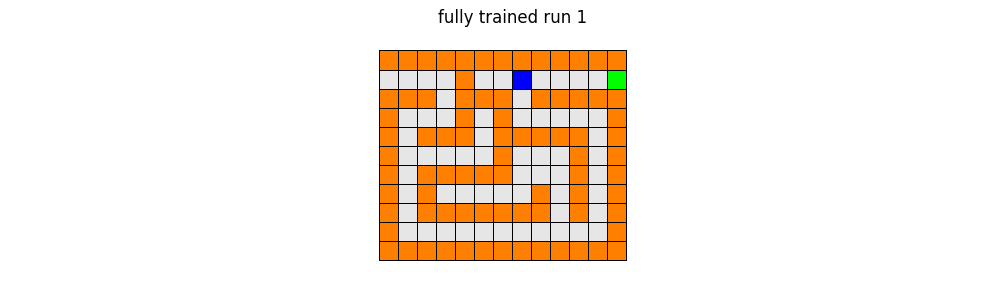
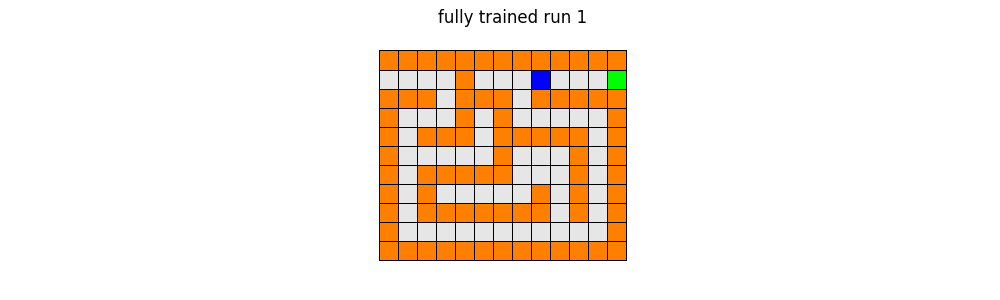
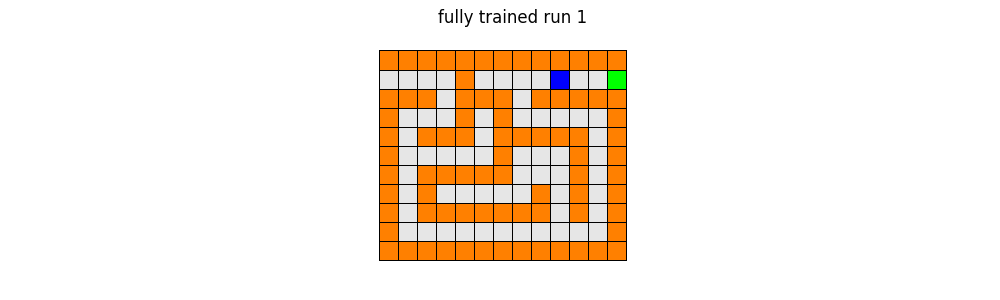
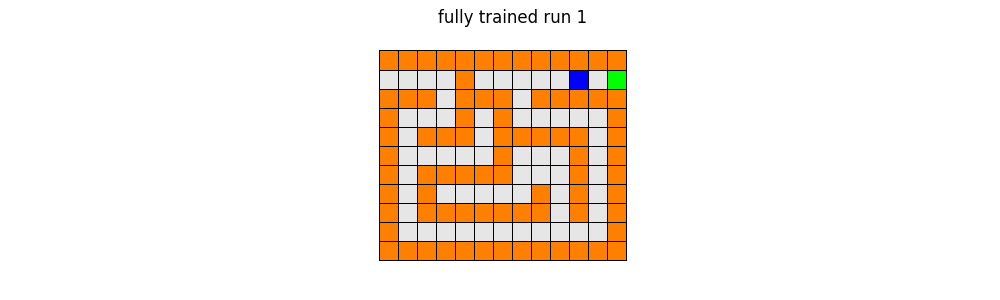
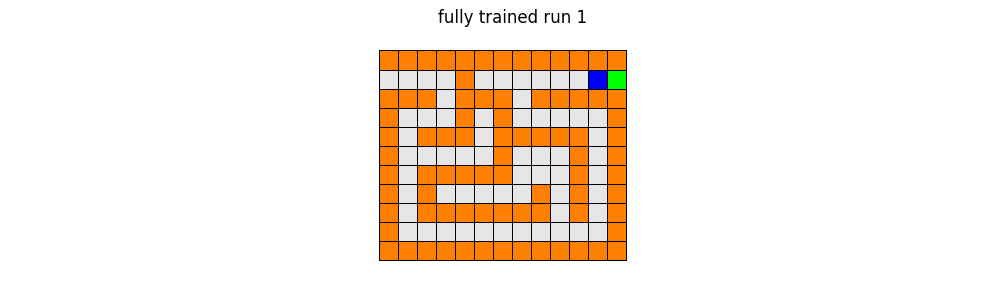
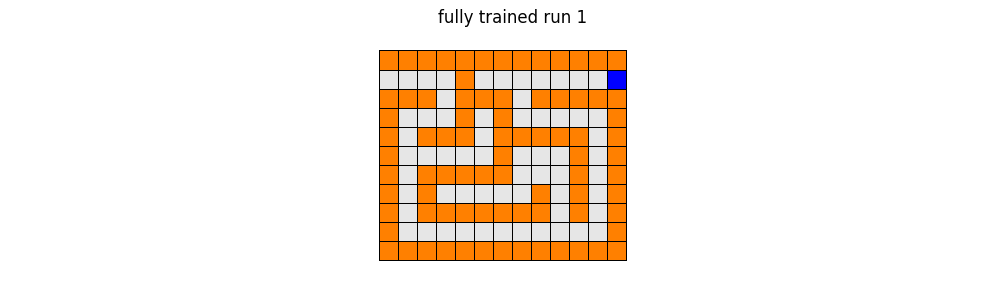

In [10]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

# animate a fully trained agent 
locs = [[9,0]]
animator.animate_validation_runs(gridworld = small_maze,learner = test,starting_locations = locs)

To view this function type **small_maze.animate_trained_run??**  In the a Python cell and activate.

Notice how the agent typically takes the shortest route to the goal while avoiding the hazards.  Try changing the initial position to see how the trained agent performs in general!

## 3.3  Evaluating performance and parameter tuning

How can we check the performance of our trained agent?  For a problem like gridworld, chess, or game AI we have a range of starting positions for our agent and we want the learned agent to be profecient in accomplishing its goal from any starting position.  To test the agetn's proficiency we can then run a set of **validation episodes** where each episode begins at a different starting position and the agent transitions using the optimal policy function. 

> **Running a series of validation episodes using the optimal policy function allows us to gauge the effectiveness of our trained agent, i.e., how well the Q function has been learned.**


### Parameter tuning

We have a number of parameters to choose for the basic Q-learning function.  These include

- The number of maximum steps per episode of training 

- The number of training episodes of simulation

- Gamma: the short-term / long-term tradeoff parameter

Each of these parameters can heavily influence the performance of our trained agent.  On one end of the spectrum - if the maximum number of steps per training episode is not set high enough the agent may never reach the goal state.  With a problem like gridworld - where there is only one such state - this would be disastrous as the system (and Q) would never learn how to reach a goal.  On the other hand, setting the number of steps too large can make training take extremely long.

A similar story can be said for the number of training episodes - too small and the Q matrix will not be learned correctly, and too long results in much wasted time and computation.  

Gamma - as well - can in theory be tuned optimally as well, and an incorrect setting can result in significant performance drops.

>**So how do we set these parameters?  Usually by trial and error.** 

Because a small problem like the gridworld example we saw above has a small number of states, we can get away with a relatively small value for steps and training episodes.  But typically we set both to a large number - as large as possible given time and computational constraints.  Running short trials and checking the validation reward curve (as shown in the previous section) can be a quick and useful but rough way to tune these parameters.

Employing a set of validation episodes can also help tune parameters like e.g., the short-term / long-term tradoeff parameter gamma.  Calculating the average reward on a set of validation episodes at the completion of each training episode can help us see how a particular parameter setting affects the effeciency and speed of training.

## Example - gridworld maze

Remember we want the agent to learn how to most effectively reach the goal starting from any position, not just the one shown above.  To get a better sense of this we can animate several validation runs at once using the same function used when illustrating a single run previously.


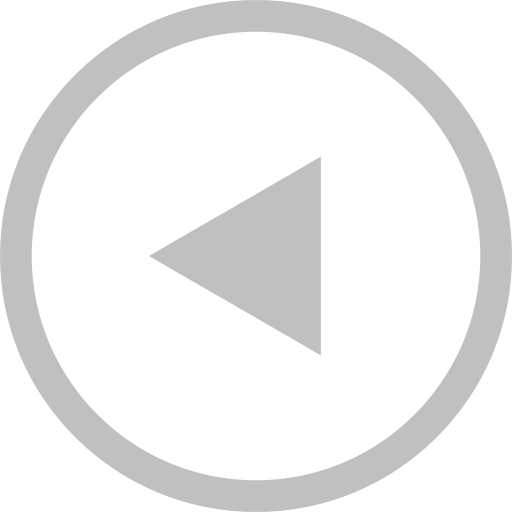
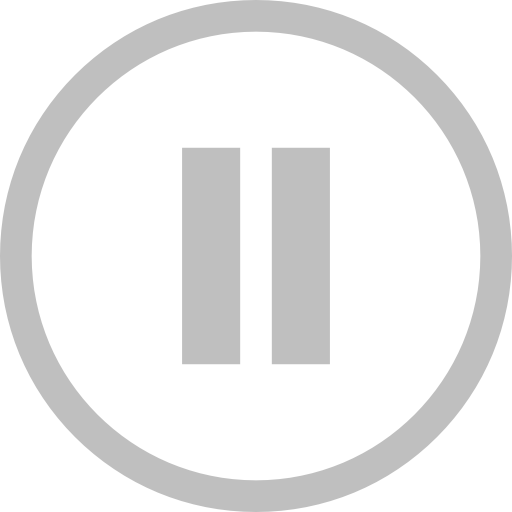
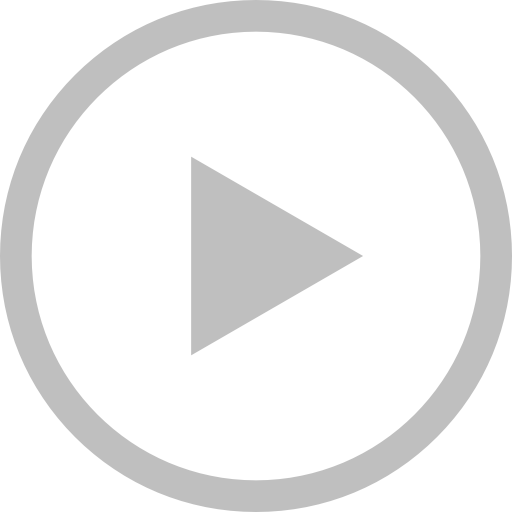
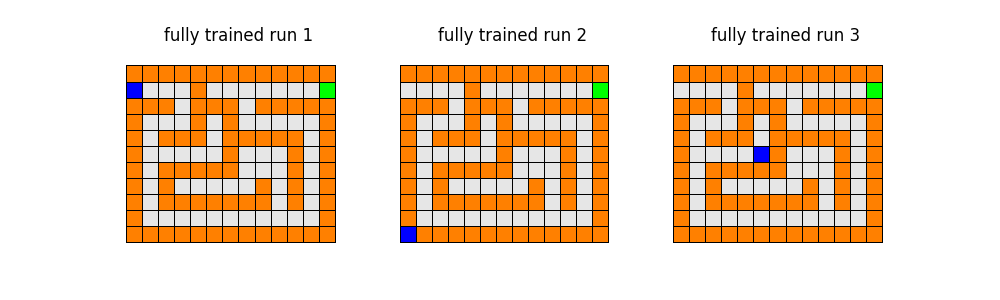
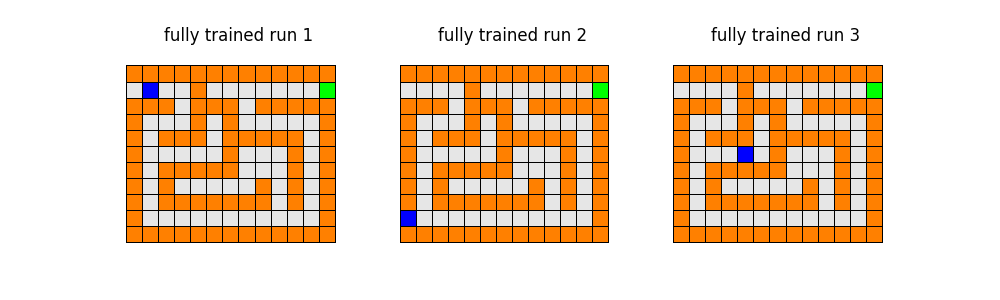
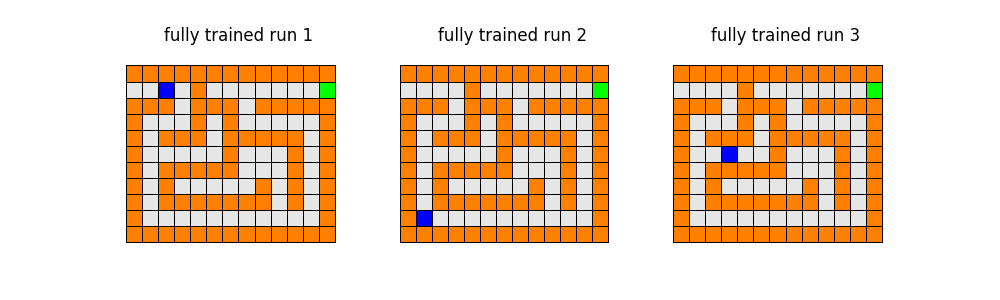
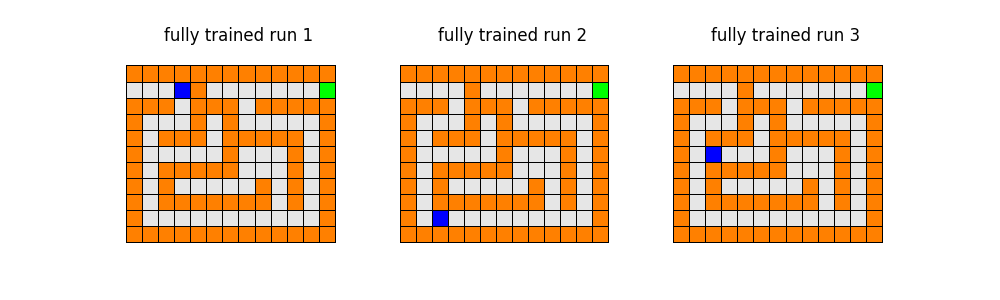
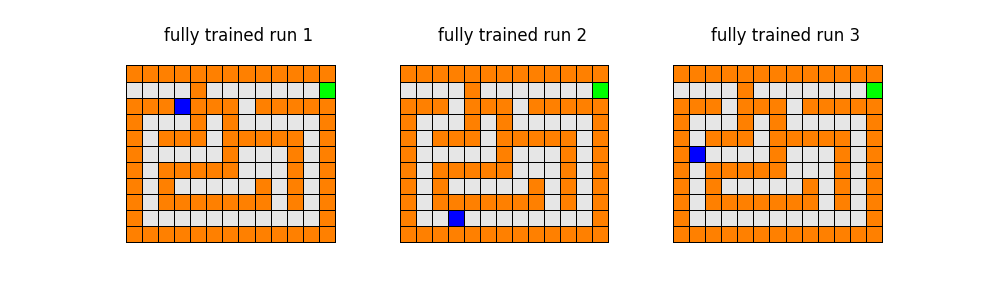
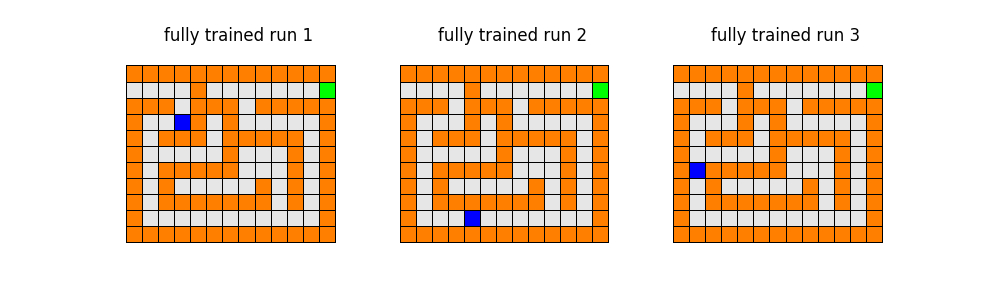
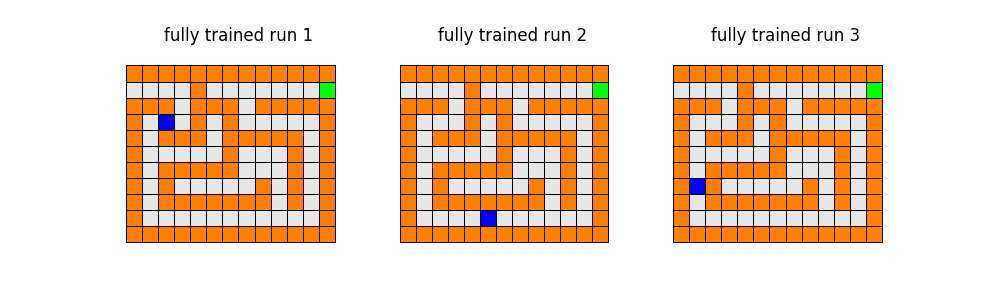
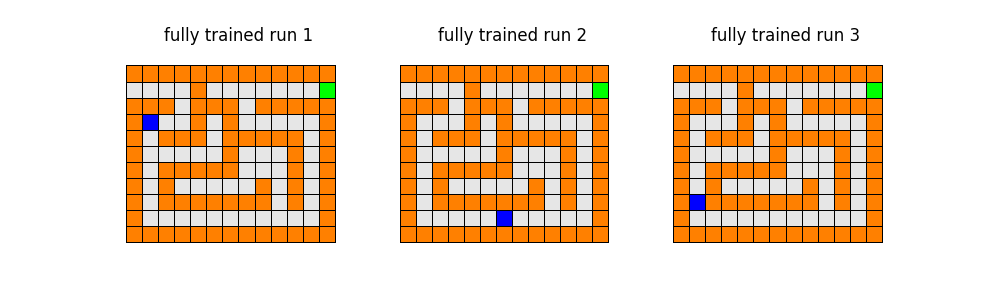
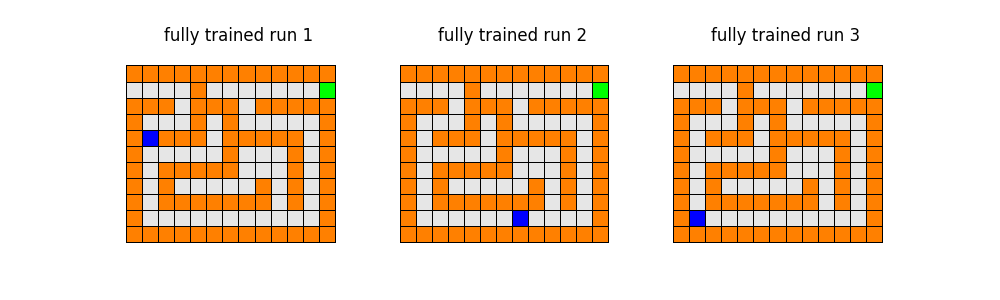
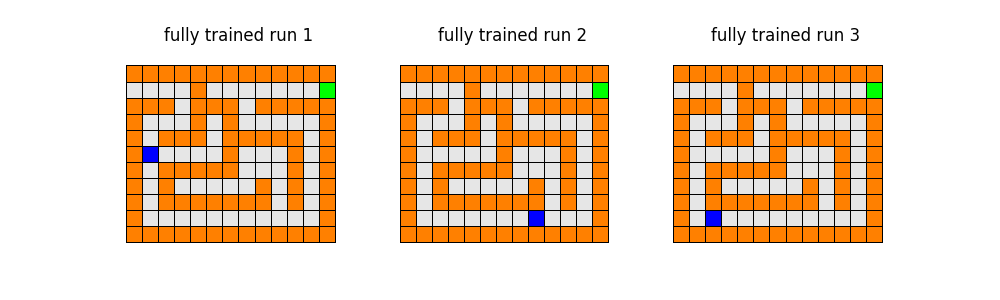
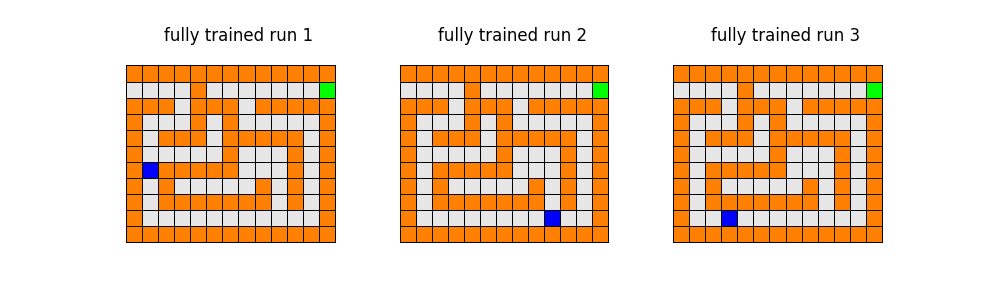
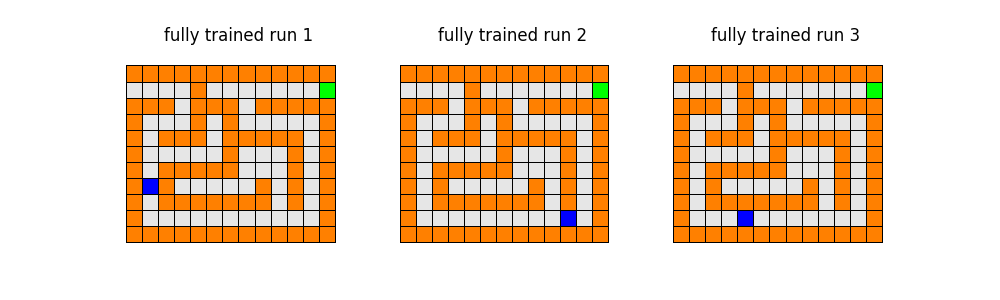
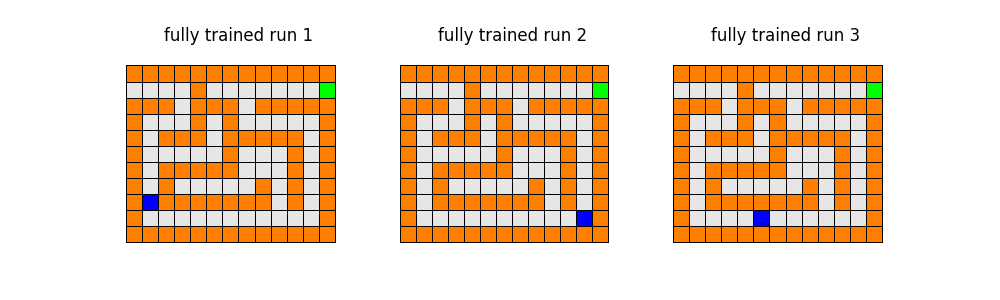
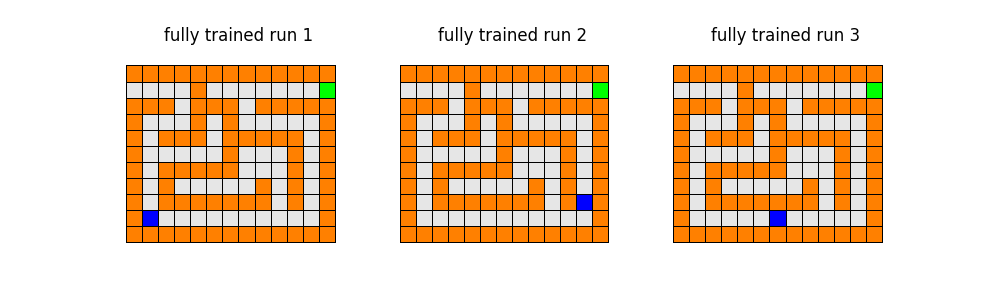
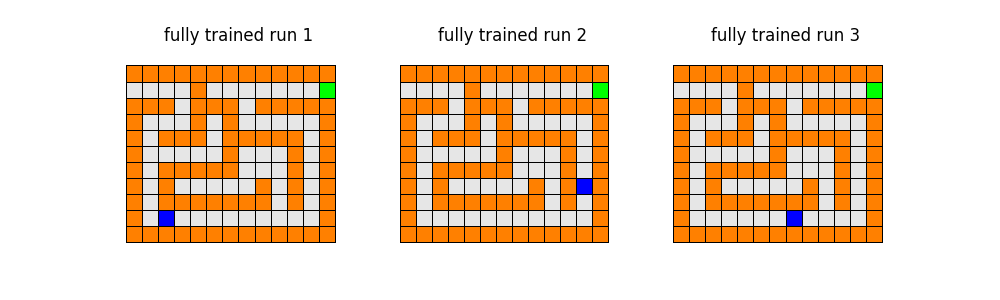
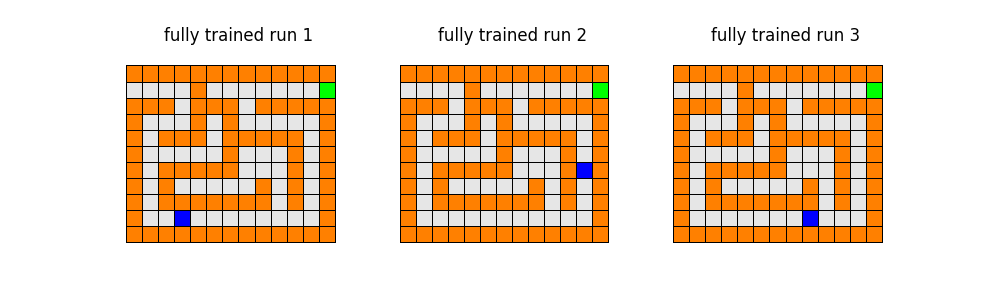
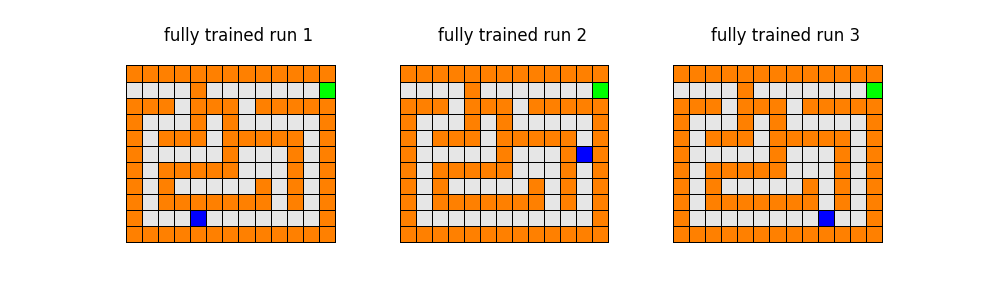
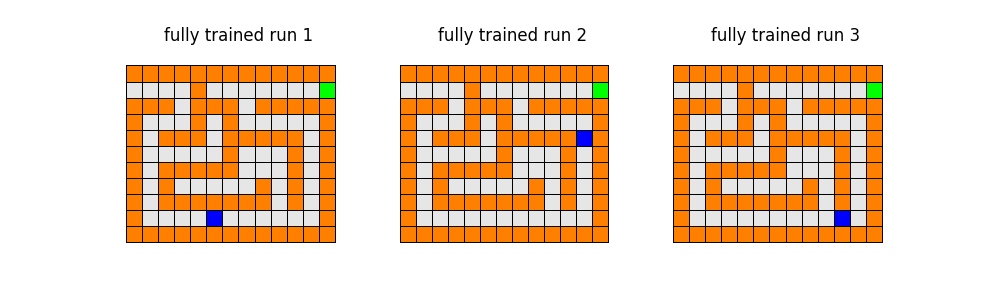
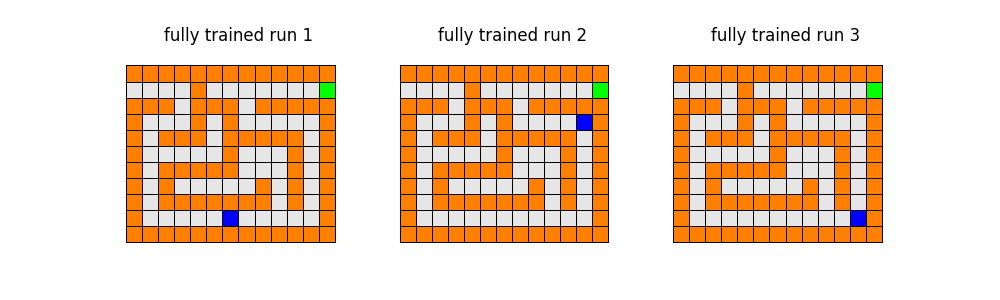
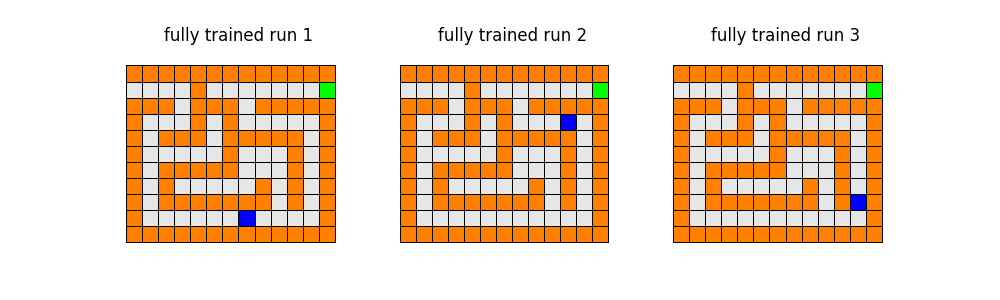
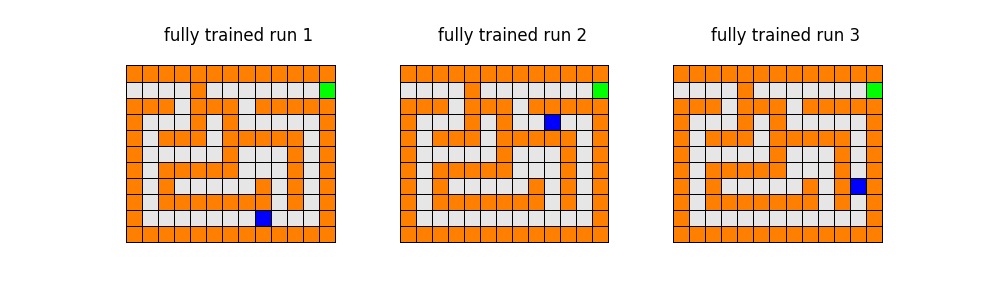
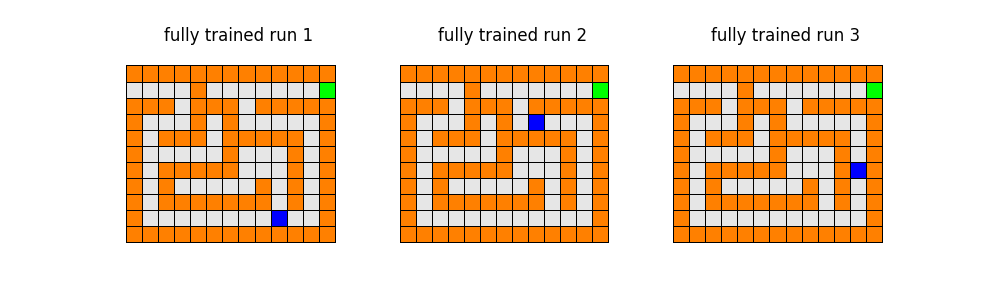
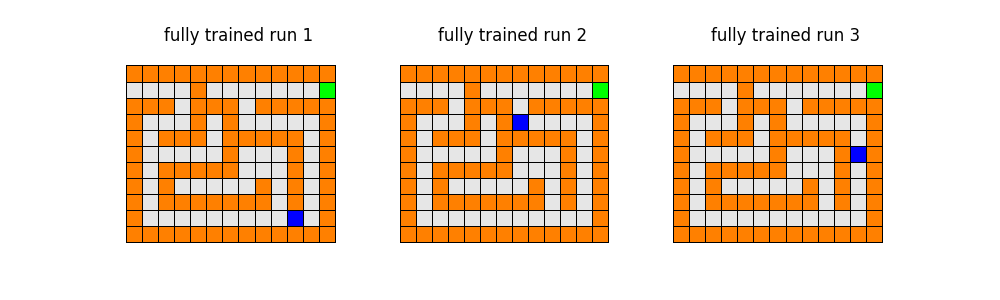
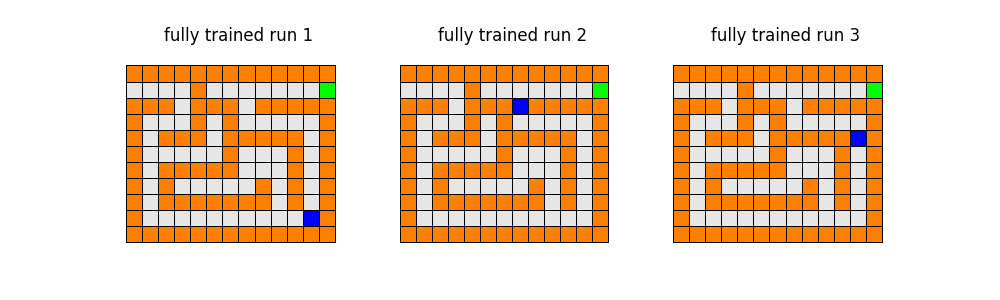
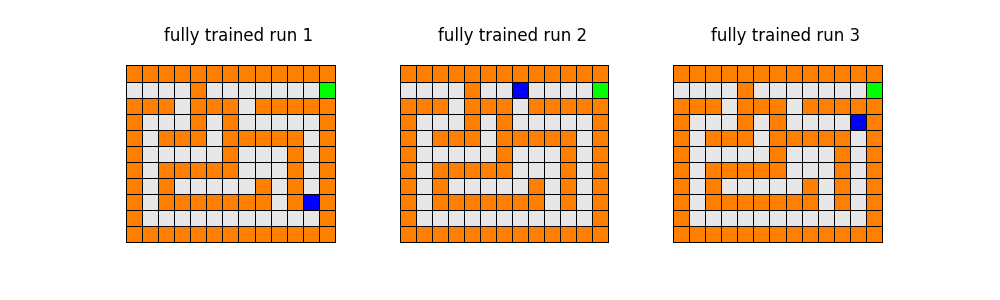
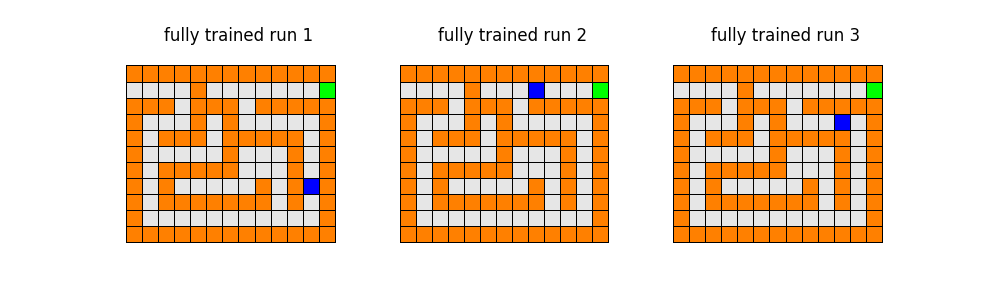
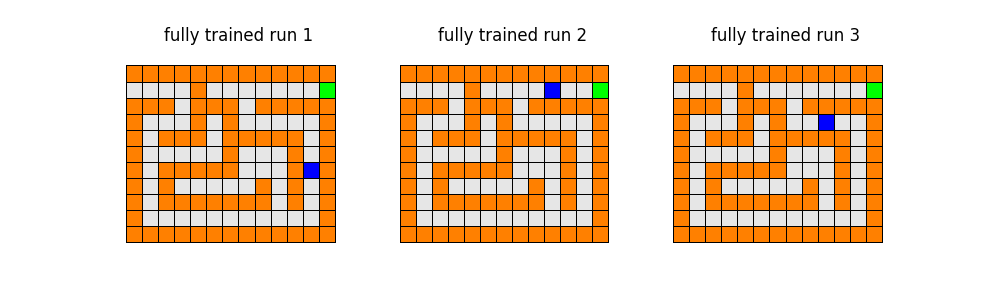
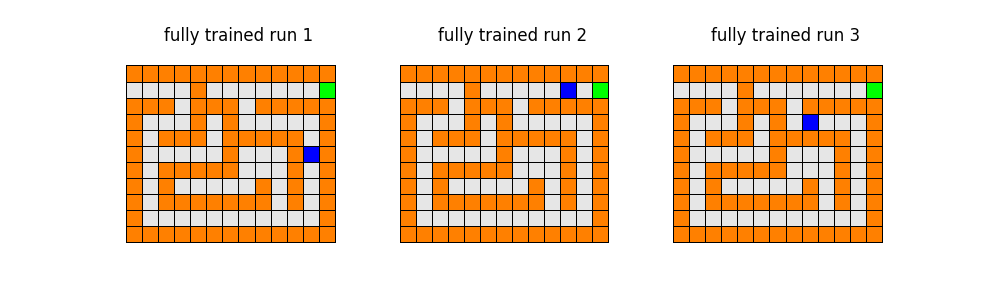
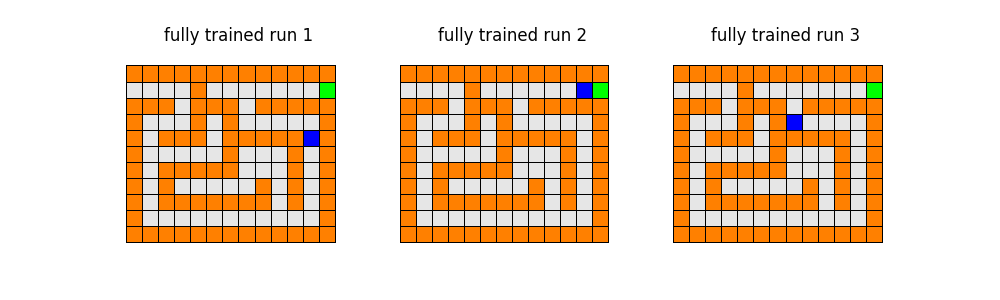
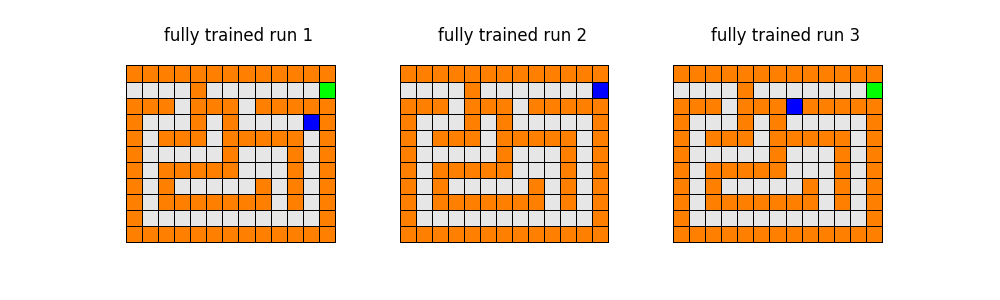
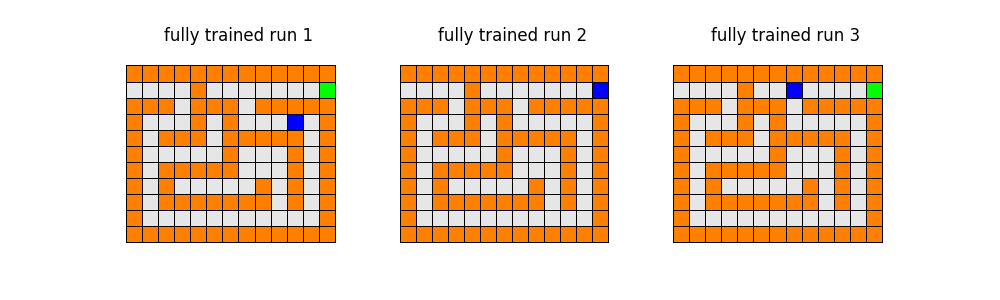
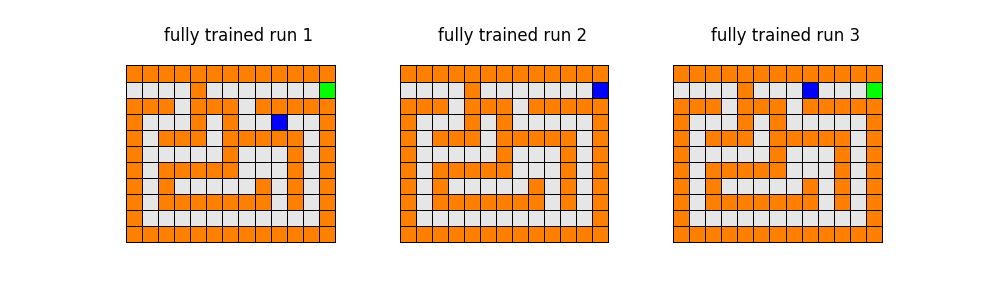
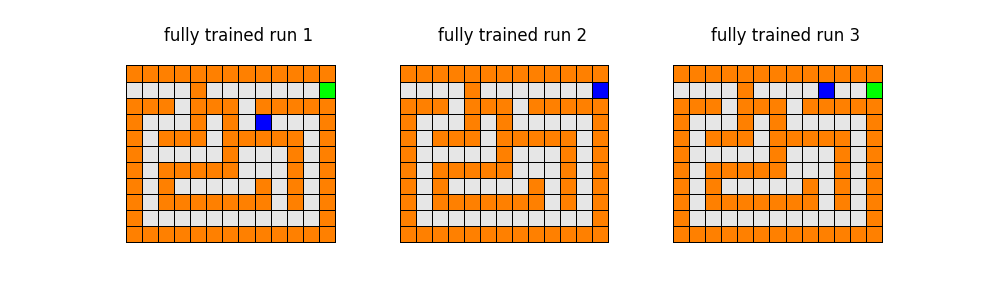
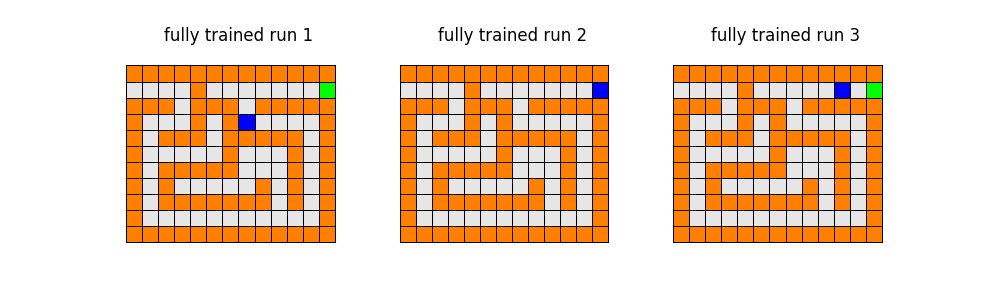
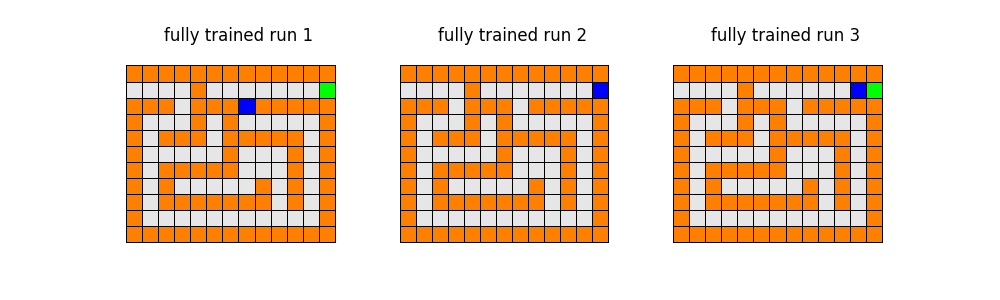
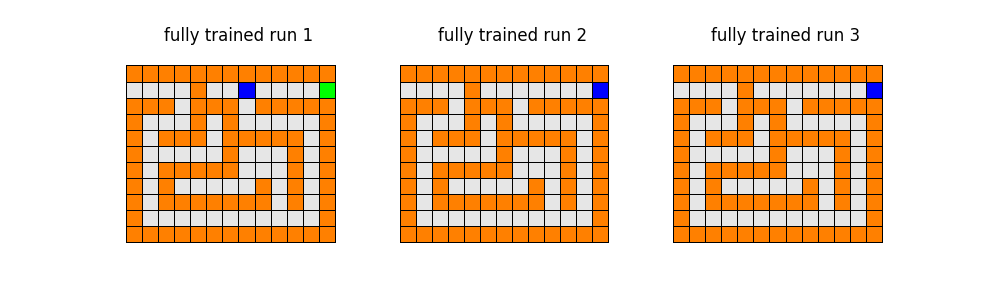
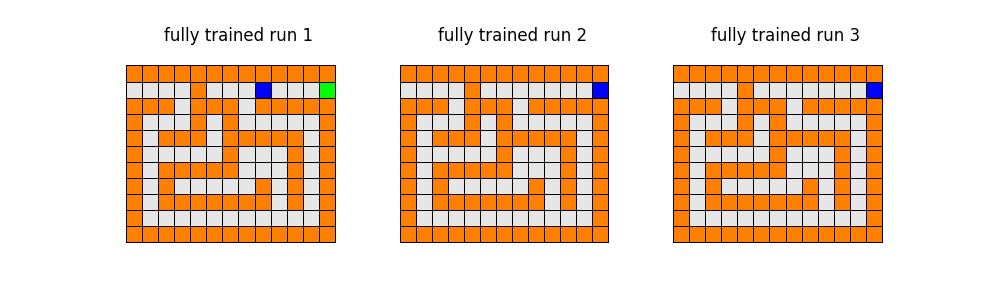
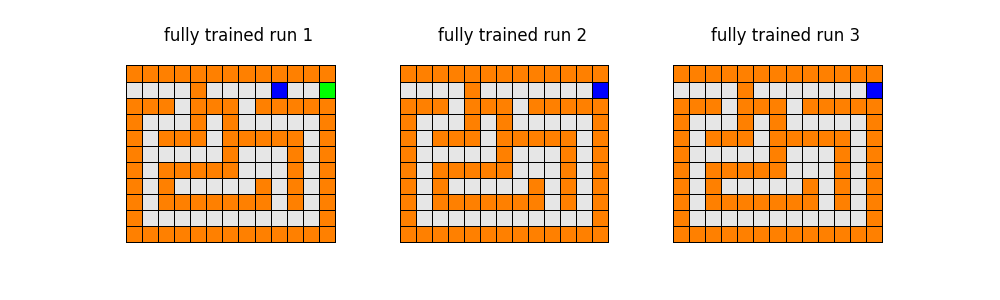
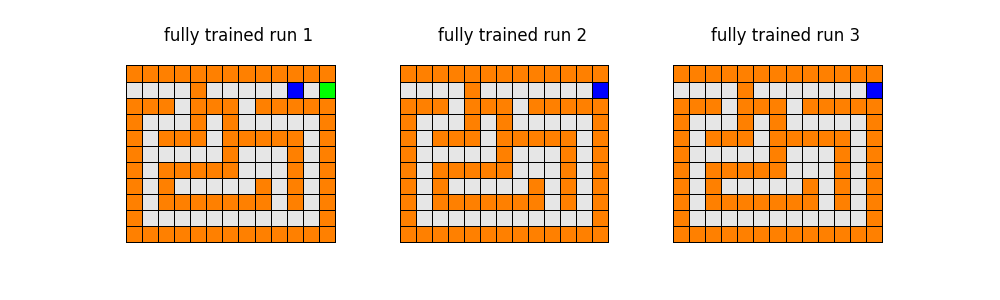
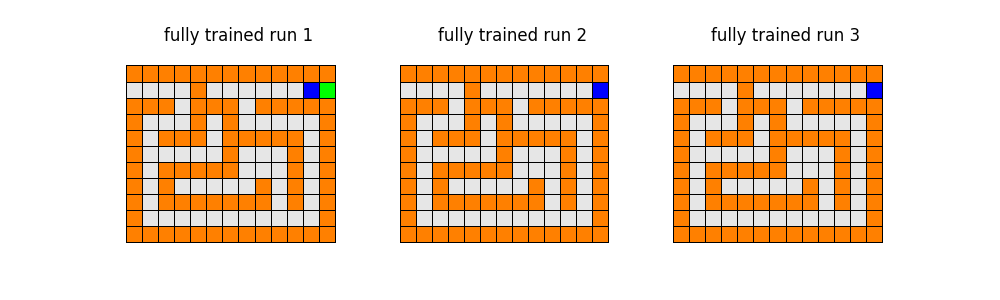
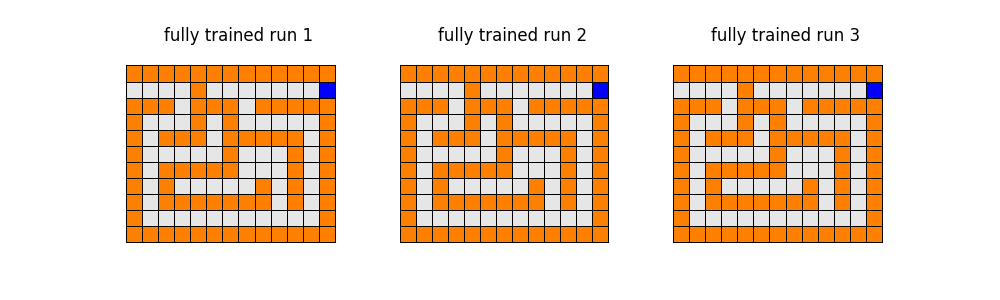

In [11]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

# animate a fully trained agent 
locs = [[9,0],[0,0],[5,5]]
animator.animate_validation_runs(gridworld = small_maze,learner = test,starting_locations = locs)

Generalizing - we can summarize the performance of the trained agent on this gridworld by running a number of these sorts of validation episodes - starting at a different location on the grid each time - and checking to make sure the *average* of the rewards is small.

Taking this concept one step further, we can get a sense of how quickly our agent is learning by running a set of fixed validation episodes at each episode of training.  That is, after each training episode we test run a set of validation episodes using the current Q function.

In the next Python cell we run 100 training episodes where at each we run the same 50 validation episodes to track performance.

(SIDE-NOTE: For specific problems like gridworld we could compute the reward of the true shortest path from each cell to the goal, and then compare each to the corresponding reward achieved by using the optimal policy.  The closer these two values match over the entire grid the better our algorithm performs.  But this sort of validation does not work in general, as we don't have knowledge of the optimal choices, but we can at least compute episodes of Q learning, or various RL algorithms, by computing the average reward over a series of test experiments.)

In [15]:
### rerun q-learner with validation at each training episode ###
# import q-learning module
from gridworld_lib import gridworld_qlearn

# create an instance of the q-learner
qlearner = gridworld_qlearn.learner(gridworld = small_maze,action_method = 'random')

# run q-learning
qlearner.train(verbose = True,validate = True)

training episode 50 of 500 complete
training episode 100 of 500 complete
training episode 150 of 500 complete
training episode 200 of 500 complete
training episode 250 of 500 complete
training episode 300 of 500 complete
training episode 350 of 500 complete
training episode 400 of 500 complete
training episode 450 of 500 complete
training episode 500 of 500 complete
q-learning algorithm complete


Lets plot the resulting median reward of validation calculated at each training episode.

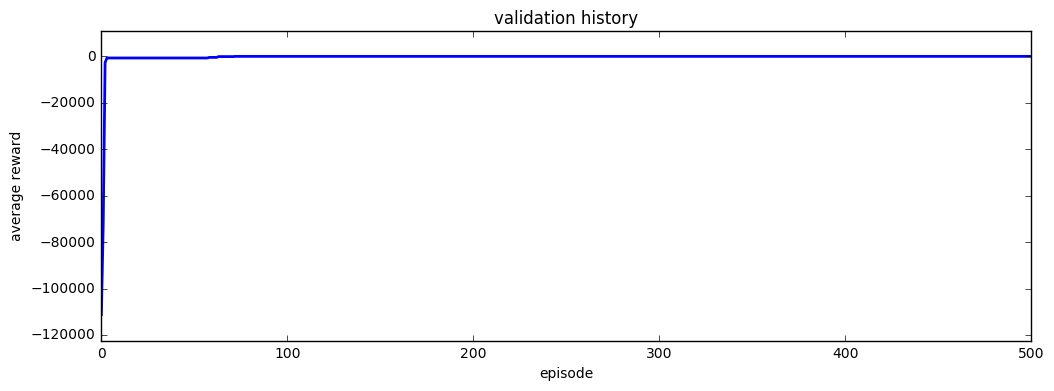

In [16]:
### print out average validation reward - computed at each training episode
# grab series
import matplotlib.pyplot as plt
series = qlearner.validation_reward

# initialize figure
fig = plt.figure(figsize = (12,4))

# plot each reward history
plt.plot(series,color = 'b',linewidth = 2)

# clean up panel
ymin = min(series)
ymax = max(series)
ygap = abs((ymax - ymin)/float(10))
plt.ylim([ymin - ygap,ygap])
plt.xlabel('episode')
plt.ylabel('average reward')
plt.title('validation history')

In this case it looks like the average validation reward increases rapidly over the first 100 or so training episodes, and increases gradually afterwards.  Of course we want to set the parameters of our Q-Learning algorithm optimally so that this average reward gets as large as possible and increases as rapidly as possible.

## 3.4  Representing the Q function as a 2-dimensional matrix*

While mathematically the input to $Q(s,a)$ can have many dimensions, being pairs of raw states and actions, the way we compute it via *Bellman's equation* and store it on a computer is via a 2-dimensional matrix representation.  

Remember we denote all the realized states as $S=\left\{ \sigma_{1},\sigma_{2},...,\sigma_{N}\right\} $, and likewise the set of all possible actions $ A=\left\{ \alpha_{1},\alpha_{2},...,\alpha_{M}\right\} $, then we represent $Q$ on a computer as the $N \times M$ matrix


$Q=\left[\begin{array}{cccc}
Q\left(\sigma_{0},\alpha_{0}\right) & Q\left(\sigma_{0},\alpha_{1}\right) & \cdots & Q\left(\sigma_{0},\alpha_{M}\right)\\
Q\left(\sigma_{1},\alpha_{0}\right) & \ddots &  & Q\left(\sigma_{1},\alpha_{1}\right)\\
\vdots &  & \ddots & \vdots\\
Q\left(\sigma_{N},\alpha_{0}\right) &  &  & Q\left(\sigma_{N},\alpha_{M}\right)
\end{array}\right]$

In other words, we represent $Q$ as a matrix indexed by all possible actions along its columns and all possible states along its rows.

In the next Python cell you can see the final Q matrix learned via the Q-learning algorithm for grid world.  The vertical axis is indexed by state location (e.g., the top left square is 00, the bottom right is 34) while the top labels are indexed by the available actions. 

### Example - gridworld maze

We can view the Q function matrix for the gridworld maze - which is a (width of gridworld x height of gridworld) by 4 matrix.

In [17]:
import pandas as pd

# print out Q matrix
df = pd.DataFrame(qlearner.Q,columns=['up','down','left','right'], index=small_maze.states)
print df.round(3)   

            up     down     left    right
0,0   -363.192 -203.990 -363.192 -203.990
0,1   -203.990   -4.988 -363.192 -203.988
0,2   -203.988   -4.985 -203.990 -203.985
0,3   -203.985   -4.981 -203.988 -203.981
0,4   -203.981   -4.976 -203.985 -203.976
0,5   -203.976   -4.970 -203.981 -203.970
0,6   -203.970   -4.963 -203.976 -203.963
0,7   -203.963   -4.954 -203.970 -203.954
0,8   -203.954   -4.942 -203.963 -203.942
0,9   -203.942   -4.928 -203.954 -203.928
0,10  -203.928   -4.910 -203.942 -203.910
0,11  -203.910   -4.887 -203.928 -363.128
0,12  -363.128 -203.910 -203.910 -363.128
1,0   -363.192 -203.992 -203.990   -4.988
1,1   -203.990   -4.990 -203.990   -4.985
1,2   -203.988 -203.988   -4.988   -4.981
1,3   -203.985 -203.985   -4.985   -4.976
1,4   -203.981 -203.981   -4.981   -4.970
1,5   -203.976 -203.976   -4.976   -4.963
1,6   -203.970 -203.970   -4.970   -4.954
1,7   -203.963 -203.963   -4.963   -4.942
1,8   -203.954 -203.954   -4.954   -4.928
1,9   -203.942   -4.942   -4.942  

Notice how hazard states tend to have much larger total negative rewards than non-hazards!

# Summary

In this notebook we discussed the basic principles involved in Reinforcement Learning, the components involved in a Reinforcement problem, common notation and jargon for these components, as well as a basic version of the Q-Learning algorithm.

In the notebooks that follow we will extend this discussion and touch on items such as

- common enhancements for the basic Q-Learning scheme discussed here


- a discussion of the role of features in Reinforcement Learning and how they impact a learner's ability to generalize


- why and how common function approximators such as deep neural networks are integrated into the Reinforcement framework


- additional implementations of Reinforcement Learning applied to control and game AI problems


and more!

<a id='bib_cell'></a>

## Notes and bibliography

[0] Harmon, Mance E., and Stephanie S. Harmon. Reinforcement Learning: A Tutorial. No. WL-TR-97-1028. WRIGHT LAB WRIGHT-PATTERSON AFB OH, 1997

[1]  There are many algorithms specifically designed to solve just this task - the most popular being [Dijkstra’s and A\* algorithms](http://www.redblobgames.com/pathfinding/a-star/introduction.html).  However the more flexible RL framework too provides great results.

[2] Lai, Matthew. "Giraffe: Using deep reinforcement learning to play chess." arXiv preprint arXiv:1509.01549 (2015).
APA	

[3]  Mnih, Volodymyr, et al. "Playing atari with deep reinforcement learning." arXiv preprint arXiv:1312.5602 (2013).
    
[4]  Image taken from http://ai.berkeley.edu/project_overview.html

[5] Watkins, Christopher JCH, and Peter Dayan. "Q-learning." Machine learning 8.3-4 (1992): 279-292.

[6]  Image taken from https://gym.openai.com/